# Introduction and Imports:

In [124]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import plotly.express as px
import warnings

In [125]:
# import dataset
train = pd.read_csv('./widsdatathon2022/train.csv')
test = pd.read_csv('./widsdatathon2022/test.csv')

In [126]:
# viewing top rows of data of train
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


### Filling out missing values:

In [127]:
def preprocess_data(data):
  for col in data.columns:
    if col not in ['State_Factor', 'building_class', 'facility_type']:
      data[col] = data[col].fillna(data[col].median())

### Dropping min and max columns:

In [128]:
train.drop(['january_min_temp', 'february_min_temp', 'march_min_temp', 'april_min_temp',
       'may_min_temp', 'june_min_temp', 'july_min_temp', 'august_min_temp', 'september_min_temp',
       'october_min_temp', 'november_min_temp','december_min_temp'], axis=1, inplace=True)

In [129]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,january_max_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,68,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,50.5,68,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


In [130]:
train.drop(['january_max_temp', 'february_max_temp', 'march_max_temp', 'april_max_temp',
       'may_max_temp', 'june_max_temp', 'july_max_temp', 'august_max_temp', 'september_max_temp',
       'october_max_temp', 'november_max_temp','december_max_temp'], axis=1, inplace=True)

In [131]:
train.head()

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,50.5,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,50.5,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,50.5,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


## Checking out trend again:

C:\Users\ASUS\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


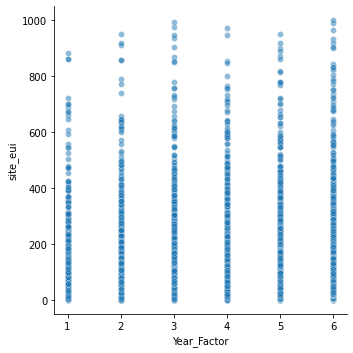

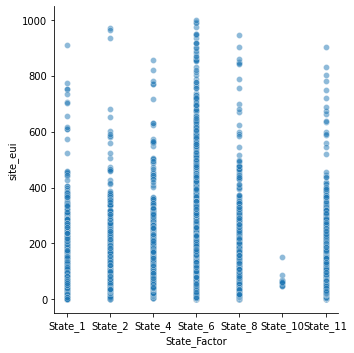

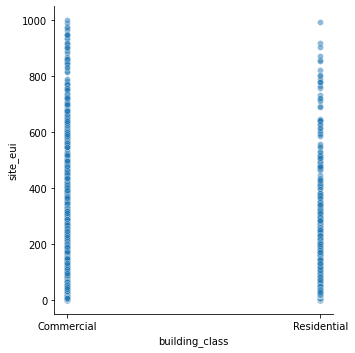

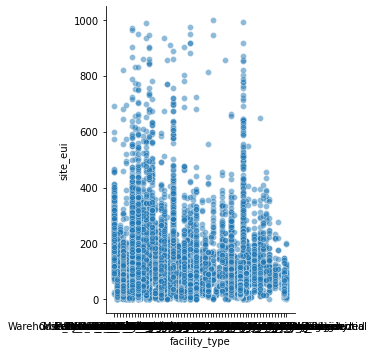

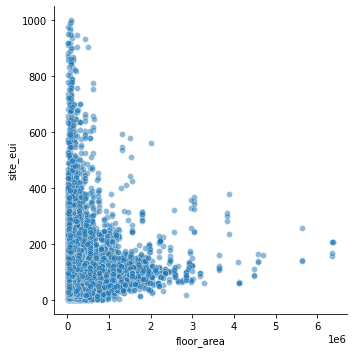

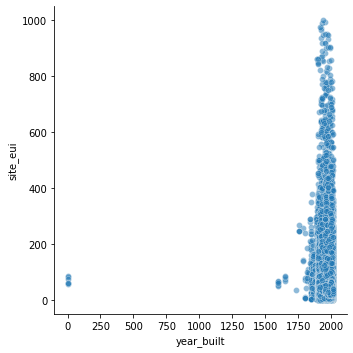

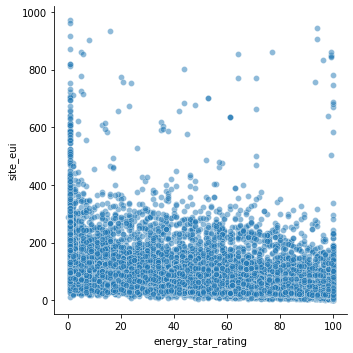

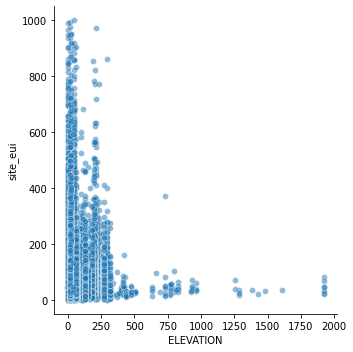

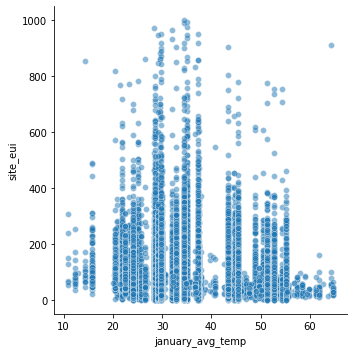

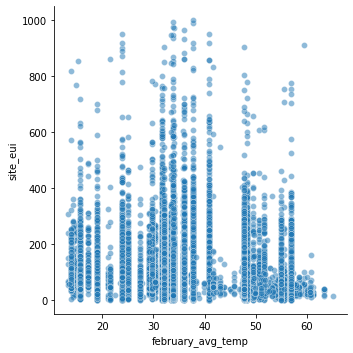

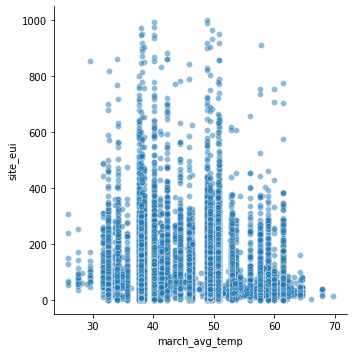

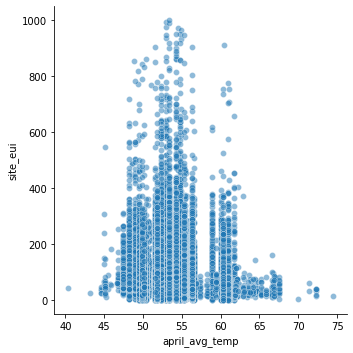

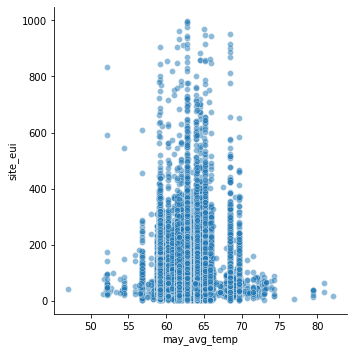

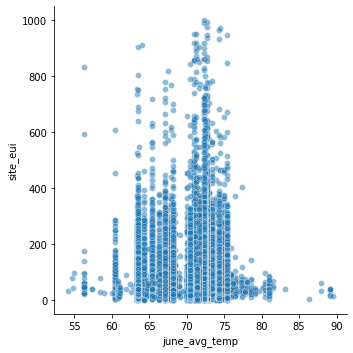

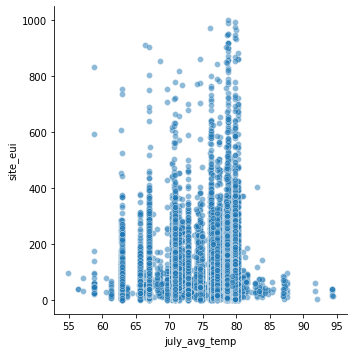

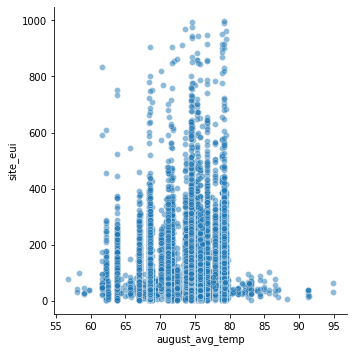

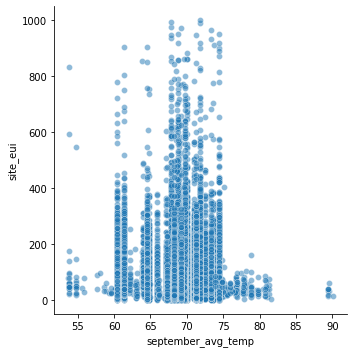

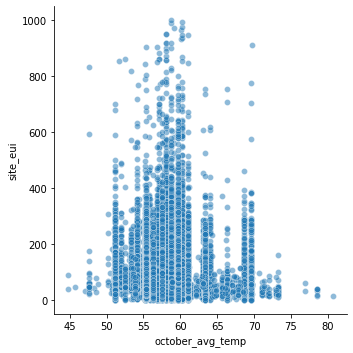

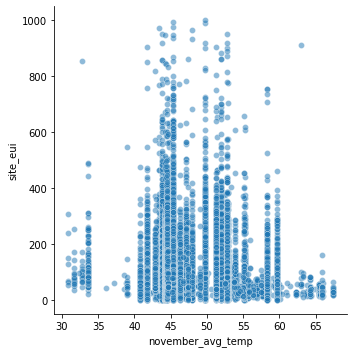

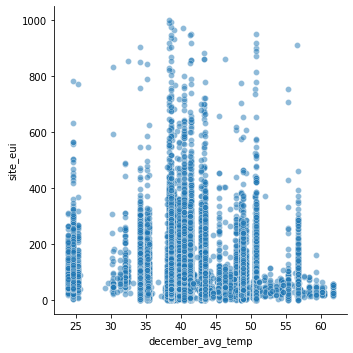

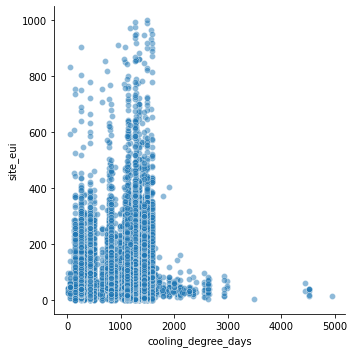

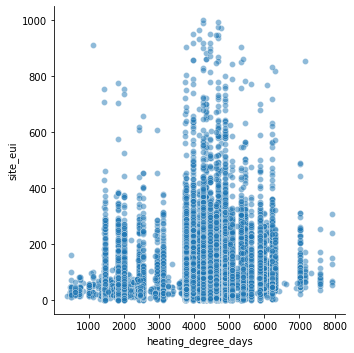

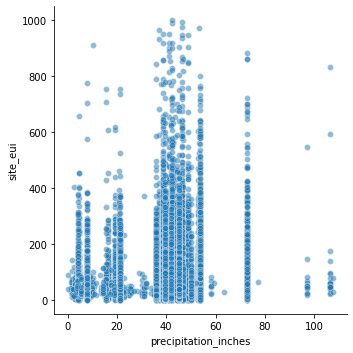

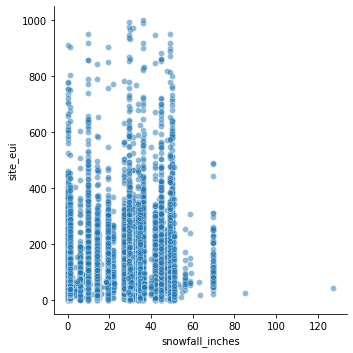

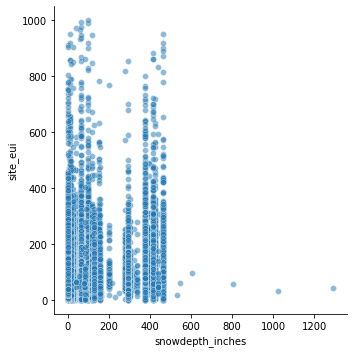

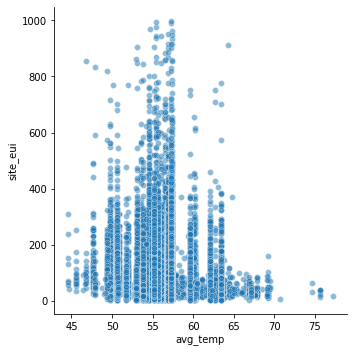

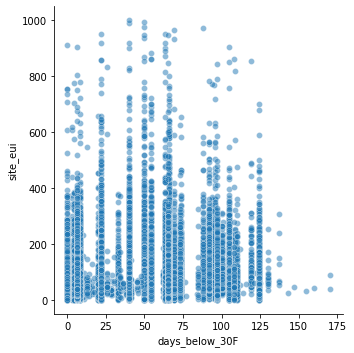

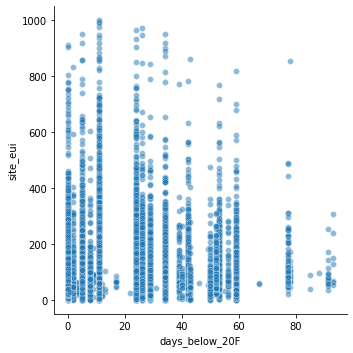

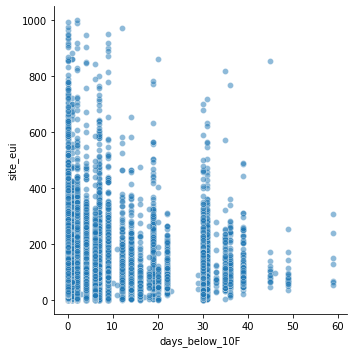

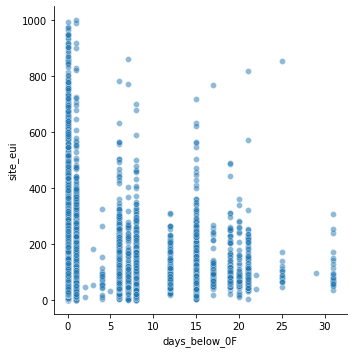

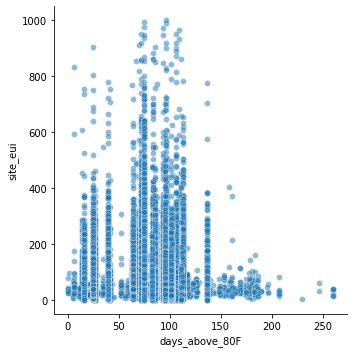

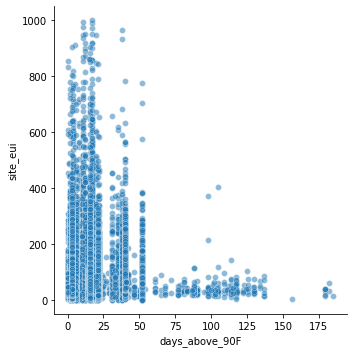

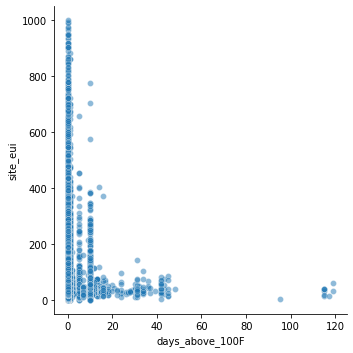

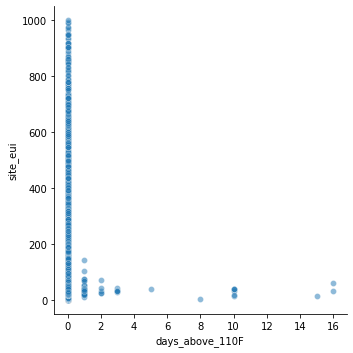

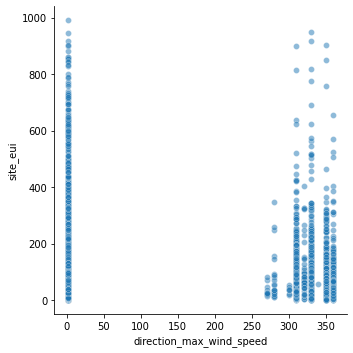

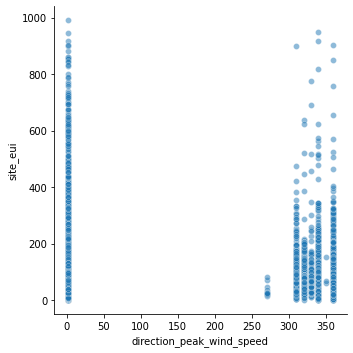

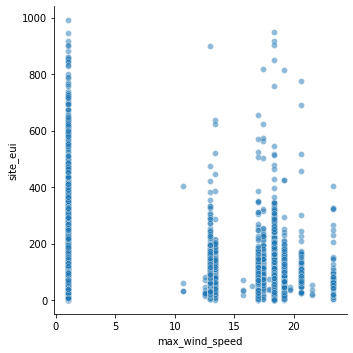

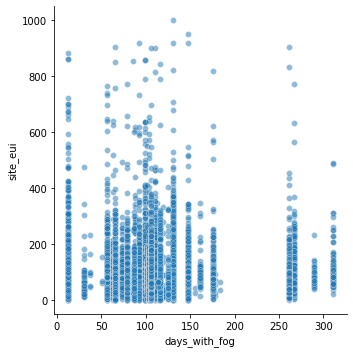

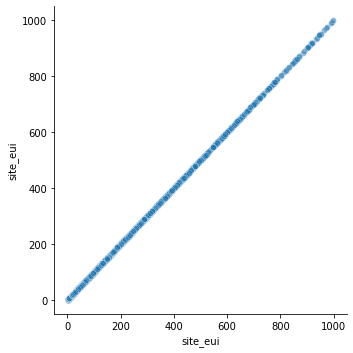

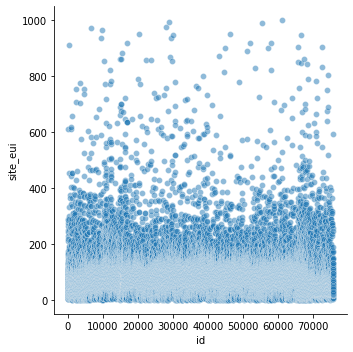

In [9]:
#looping through each column for visuali 
for (columnName, columnData) in train.iteritems():
    sns.relplot(data = train, x = columnName, y = 'site_eui', sizes=(10, 200), alpha = 0.5)

## Changing non numeric data to the numeric one:

### Changing the state_factor column:

In [132]:
from sklearn.preprocessing import OrdinalEncoder

In [133]:
enc = OrdinalEncoder()

### Transforming state-Factor and building_class:

In [134]:
# Deducing total categories and their names
print(train['building_class'].unique())
print(type(train['building_class'].unique()))

['Commercial' 'Residential']
<class 'numpy.ndarray'>


In [135]:
# Deducing total categories and their names
print(train['State_Factor'].unique())
print(type(train['State_Factor'].unique()))

['State_1' 'State_2' 'State_4' 'State_6' 'State_8' 'State_10' 'State_11']
<class 'numpy.ndarray'>


In [136]:
train['State_Factor'] = enc.fit_transform(train['State_Factor'].to_numpy().reshape(-1, 1))
train['building_class'] = enc.fit_transform(train['building_class'].to_numpy().reshape(-1, 1))
train['facility_type'] = enc.fit_transform(train['facility_type'].to_numpy().reshape(-1, 1))

In [137]:
encoded_data = train
encoded_data.sample(10)

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
23526,2,5.0,1.0,27.0,153978.0,1929.0,NaN,3.4,37.322581,40.879310,...,72,17,0,0,1.0,1.0,1.0,79.0,68.110587,23526
68319,6,6.0,1.0,27.0,64872.0,1991.0,52.0,3.0,29.709677,34.051724,...,102,16,0,0,1.0,1.0,1.0,116.0,60.480374,68319
33467,4,5.0,1.0,27.0,58560.0,1951.0,99.0,42.7,28.596774,31.625000,...,75,4,0,0,1.0,1.0,1.0,NaN,69.312350,33467
4535,5,0.0,0.0,21.0,204392.0,0.0,76.0,9.1,51.387097,56.803571,...,136,52,10,0,NaN,NaN,NaN,NaN,59.503653,4535
45835,5,5.0,1.0,27.0,77300.0,1950.0,57.0,15.2,29.854839,23.946429,...,106,12,0,0,NaN,NaN,NaN,NaN,128.876004,45835
51177,5,5.0,1.0,27.0,68997.0,1920.0,NaN,15.2,29.854839,23.946429,...,106,12,0,0,NaN,NaN,NaN,NaN,140.696336,51177
72934,6,2.0,1.0,1.0,40025.0,2002.0,67.0,57.3,43.451613,47.672414,...,25,3,0,0,1.0,1.0,1.0,261.0,39.086216,72934
73166,6,2.0,0.0,32.0,86483.0,1981.0,56.0,26.5,43.451613,47.672414,...,25,3,0,0,NaN,NaN,NaN,NaN,73.356792,73166
50859,5,5.0,1.0,27.0,50115.0,1931.0,91.0,21.3,29.854839,23.946429,...,106,12,0,0,NaN,NaN,NaN,NaN,46.682164,50859
27467,3,5.0,0.0,32.0,139780.0,1900.0,38.0,25.6,35.080645,33.910714,...,75,11,0,0,1.0,1.0,1.0,93.0,128.860782,27467


### One-hot-encoding the facility_type column (NOT CONSIDERED LATER)

In [138]:
# # Deducing total categories and their names
# print(train['facility_type'].unique())
# print(type(train['facility_type'].unique()))

In [139]:
# print(len(train['facility_type'].unique()))

In [140]:
# encoded_data = pd.get_dummies(train, columns = ['facility_type'])
# encoded_data

### Dropping the last column: (NOT CONSIDERED LATER)

In [141]:
# encoded_data.drop(['facility_type_Warehouse_Uncategorized'], axis=1, inplace=True)
# encoded_data

## Handeling missing values:

In [142]:
encoded_data.columns[encoded_data.isnull().any()]

Index(['year_built', 'energy_star_rating', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog'],
      dtype='object')

In [143]:
from sklearn.impute import SimpleImputer

def missing_value_handler(df, column, strategy="median"):
    preprocessor = SimpleImputer(strategy = strategy, missing_values=np.nan)
    preprocessor = preprocessor.fit(df[[column]])
    df[column] = preprocessor.transform(df[[column]])

In [144]:
missing_value_handler(encoded_data, column='year_built')

In [145]:
encoded_data['energy_star_rating'].describe()

count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
25%         40.000000
50%         67.000000
75%         85.000000
max        100.000000
Name: energy_star_rating, dtype: float64

In [146]:
missing_value_handler(encoded_data, column='energy_star_rating', strategy="mean")

In [147]:
encoded_data['direction_max_wind_speed'].describe()

count    34675.000000
mean        66.552675
std        131.147834
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        360.000000
Name: direction_max_wind_speed, dtype: float64

In [148]:
missing_value_handler(encoded_data, column='direction_max_wind_speed', strategy="median")

In [149]:
encoded_data['direction_peak_wind_speed'].describe()

count    33946.000000
mean        62.779974
std        130.308106
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        360.000000
Name: direction_peak_wind_speed, dtype: float64

In [150]:
# peak and max are similar columns
encoded_data.drop(['direction_peak_wind_speed'], axis=1, inplace=True)

In [151]:
encoded_data['max_wind_speed'].describe()

count    34675.000000
mean         4.190601
std          6.458789
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         23.300000
Name: max_wind_speed, dtype: float64

In [152]:
missing_value_handler(encoded_data, column='max_wind_speed', strategy="median")

In [153]:
encoded_data['days_with_fog'].mode()

0    131.0
dtype: float64

In [154]:
missing_value_handler(encoded_data, column='days_with_fog', strategy="most_frequent")

# Outlier removal:

### Calculating Z-Score for each columns:

In [155]:
z_score = pd.DataFrame()

In [156]:
for col in encoded_data.columns:
    col_zscore = col + "_zscore"
    z_score[col_zscore] = (encoded_data[col] - encoded_data[col].mean())/encoded_data[col].std(ddof=0)

In [157]:
z_score.head()

,Year_Factor_zscore,State_Factor_zscore,building_class_zscore,facility_type_zscore,floor_area_zscore,year_built_zscore,energy_star_rating_zscore,ELEVATION_zscore,january_avg_temp_zscore,february_avg_temp_zscore,...,days_below_0F_zscore,days_above_80F_zscore,days_above_90F_zscore,days_above_100F_zscore,days_above_110F_zscore,direction_max_wind_speed_zscore,max_wind_speed_zscore,days_with_fog_zscore,site_eui_zscore,id_zscore
0,-2.28876,-2.735028,-1.163089,-1.110481,-0.424272,-0.280725,-2.170027,-0.611748,2.314092,1.698778,...,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.314077,0.257072,2.851221,-1.732028
1,-2.28876,-2.735028,-1.163089,2.496116,0.437535,0.074448,-0.695842,-0.621640,2.314092,1.698778,...,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.314077,-3.281746,-0.962742,-1.731982
2,-2.28876,-2.735028,-1.163089,1.895016,0.461940,-0.034836,1.558795,-0.621640,2.314092,1.698778,...,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.314077,-3.281746,-0.993753,-1.731936
3,-2.28876,-2.735028,-1.163089,-1.711580,-0.448240,0.757472,-0.652483,-0.621640,2.314092,1.698778,...,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.314077,-3.281746,-0.586692,-1.731891
4,-2.28876,-2.735028,-1.163089,2.581987,-0.404999,0.894077,1.688870,-0.611748,2.314092,1.698778,...,-0.302936,-2.717656,-1.284612,-0.124112,-0.017181,-0.317352,-0.314077,0.257072,-1.350704,-1.731845


In [158]:
for index, col_names in enumerate(encoded_data):
    print(f'Index: {index}, Name: {col_names}')

Index: 0, Name: Year_Factor
Index: 1, Name: State_Factor
Index: 2, Name: building_class
Index: 3, Name: facility_type
Index: 4, Name: floor_area
Index: 5, Name: year_built
Index: 6, Name: energy_star_rating
Index: 7, Name: ELEVATION
Index: 8, Name: january_avg_temp
Index: 9, Name: february_avg_temp
Index: 10, Name: march_avg_temp
Index: 11, Name: april_avg_temp
Index: 12, Name: may_avg_temp
Index: 13, Name: june_avg_temp
Index: 14, Name: july_avg_temp
Index: 15, Name: august_avg_temp
Index: 16, Name: september_avg_temp
Index: 17, Name: october_avg_temp
Index: 18, Name: november_avg_temp
Index: 19, Name: december_avg_temp
Index: 20, Name: cooling_degree_days
Index: 21, Name: heating_degree_days
Index: 22, Name: precipitation_inches
Index: 23, Name: snowfall_inches
Index: 24, Name: snowdepth_inches
Index: 25, Name: avg_temp
Index: 26, Name: days_below_30F
Index: 27, Name: days_below_20F
Index: 28, Name: days_below_10F
Index: 29, Name: days_below_0F
Index: 30, Name: days_above_80F
Index: 

In [159]:
encoded_data.set_index('id')

,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_avg_temp,february_avg_temp,...,days_below_10F,days_below_0F,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,max_wind_speed,days_with_fog,site_eui
id,,,,,,,,,,,,,,,,,,,,,
0,1,0.0,0.0,13.0,61242.0,1942.0,11.000000,2.4,50.500000,50.589286,...,0,0,14,0,0,0,1.0,1.0,131.0,248.682615
1,1,0.0,0.0,55.0,274000.0,1955.0,45.000000,1.8,50.500000,50.589286,...,0,0,14,0,0,0,1.0,1.0,12.0,26.500150
2,1,0.0,0.0,48.0,280025.0,1951.0,97.000000,1.8,50.500000,50.589286,...,0,0,14,0,0,0,1.0,1.0,12.0,24.693619
3,1,0.0,0.0,6.0,55325.0,1980.0,46.000000,1.8,50.500000,50.589286,...,0,0,14,0,0,0,1.0,1.0,12.0,48.406926
4,1,0.0,0.0,56.0,66000.0,1985.0,100.000000,2.4,50.500000,50.589286,...,0,0,14,0,0,0,1.0,1.0,131.0,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,2.0,0.0,32.0,20410.0,1995.0,8.000000,36.6,43.451613,47.672414,...,0,0,25,3,0,0,1.0,1.0,131.0,132.918411
75753,6,2.0,1.0,1.0,40489.0,1910.0,98.000000,36.6,43.451613,47.672414,...,0,0,25,3,0,0,1.0,1.0,131.0,39.483672
75754,6,2.0,0.0,2.0,28072.0,1917.0,61.048605,36.6,36.612903,41.637931,...,0,0,6,0,0,0,1.0,1.0,131.0,48.404398


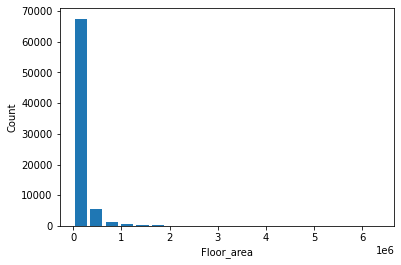

In [160]:
plt.hist(encoded_data.floor_area, bins=20, rwidth=0.8)
plt.xlabel('Floor_area')
plt.ylabel('Count')
plt.show()

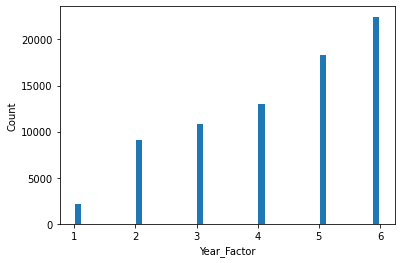

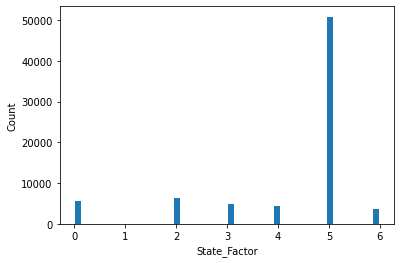

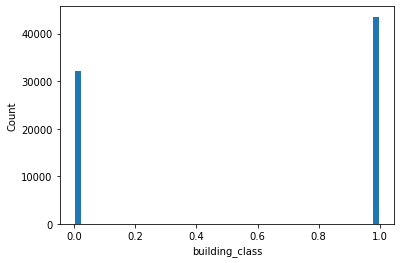

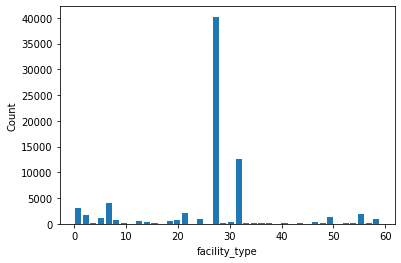

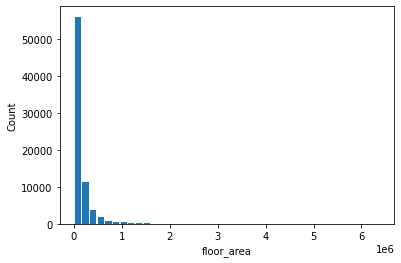

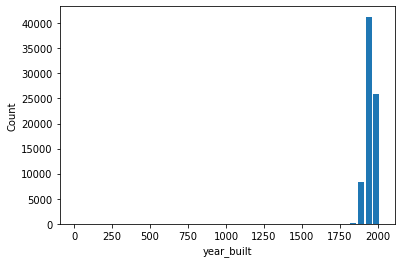

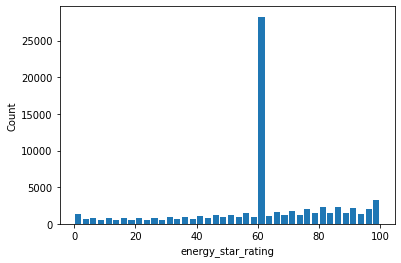

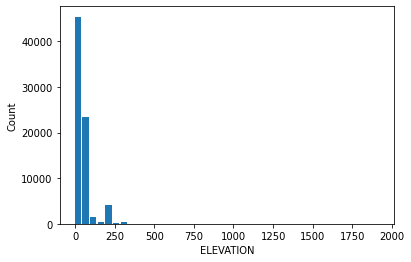

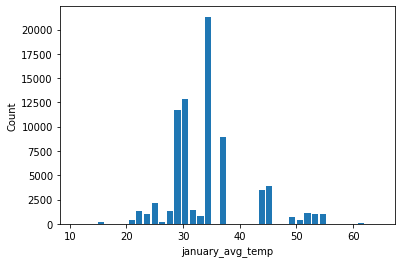

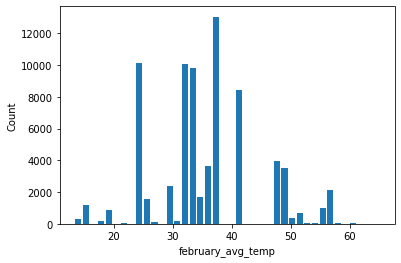

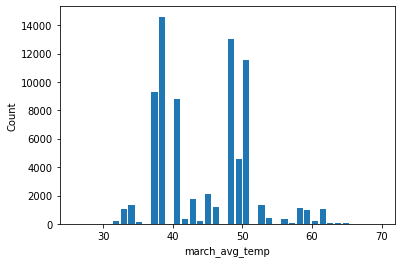

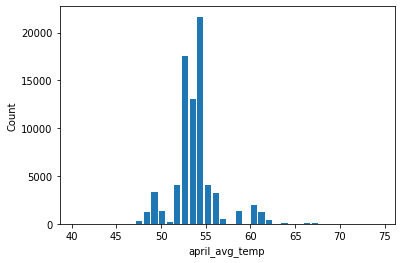

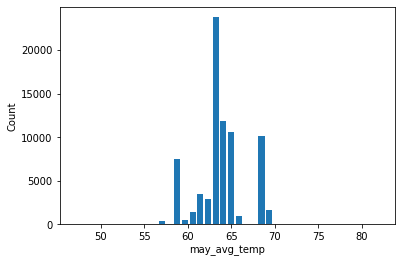

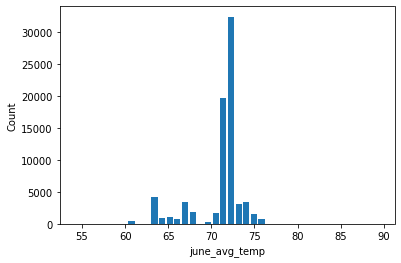

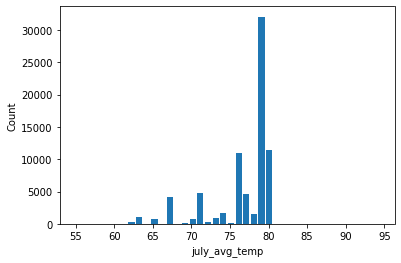

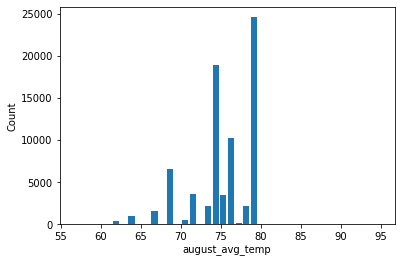

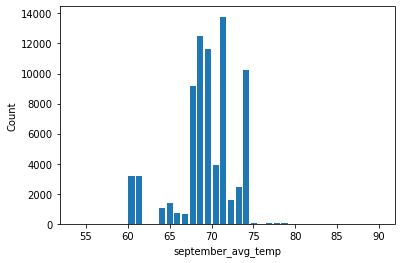

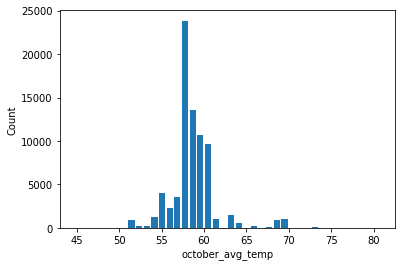

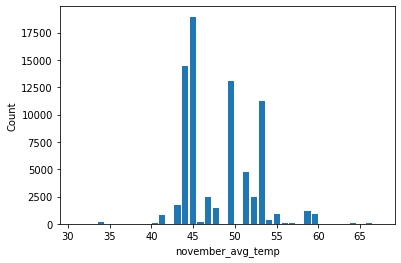

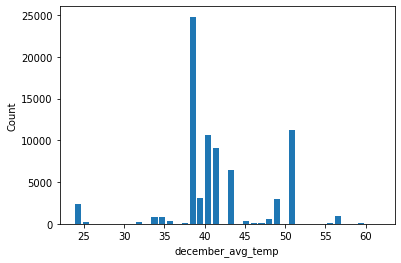

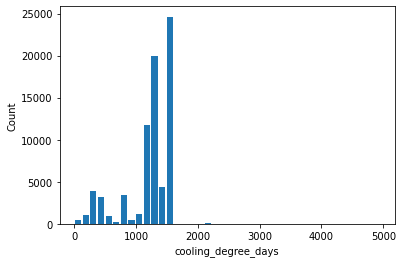

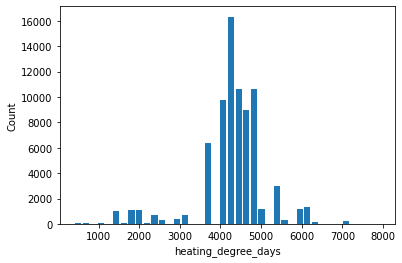

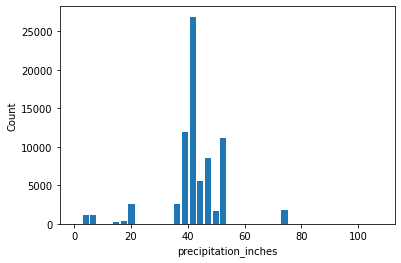

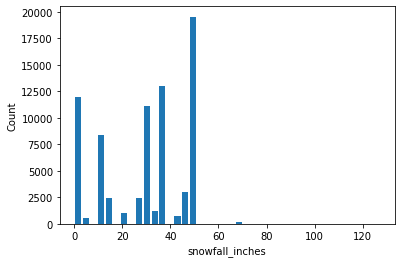

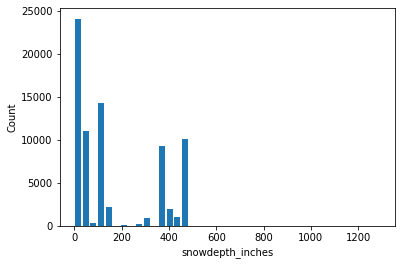

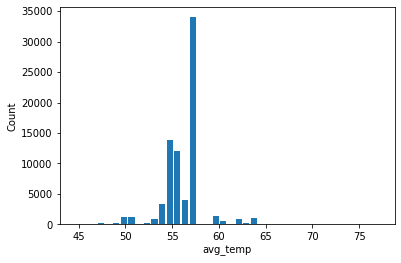

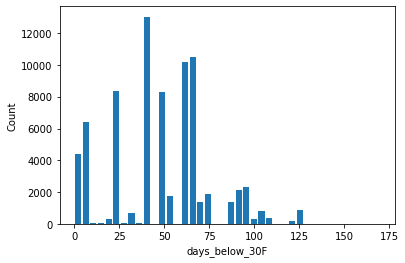

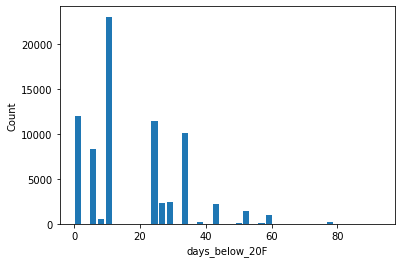

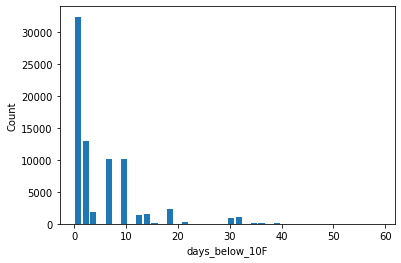

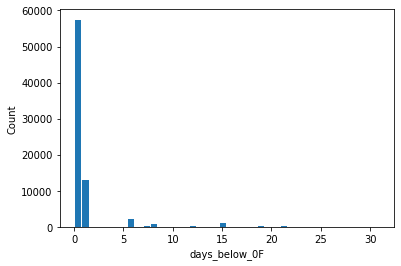

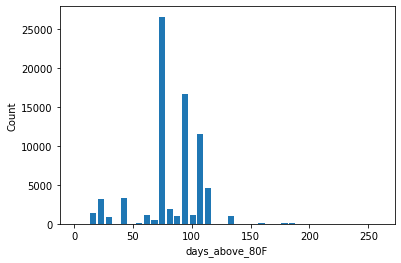

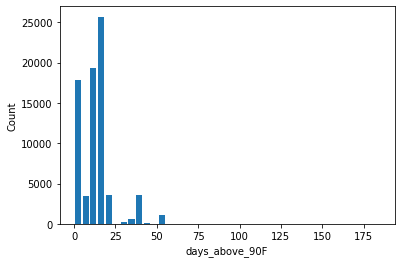

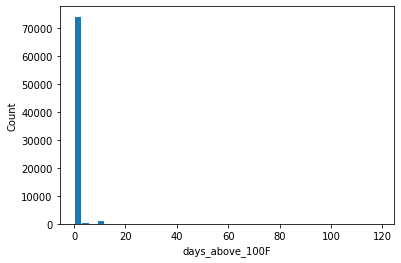

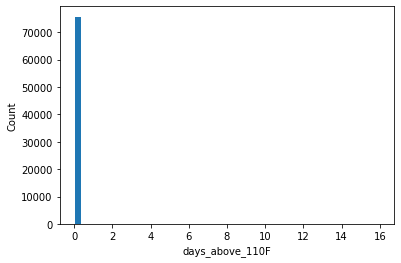

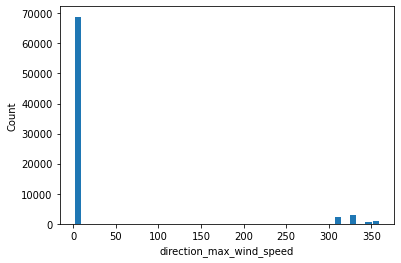

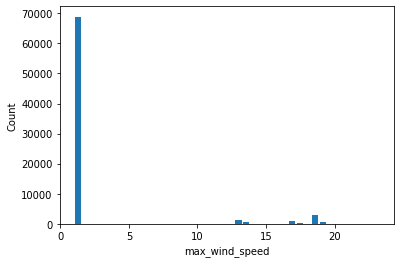

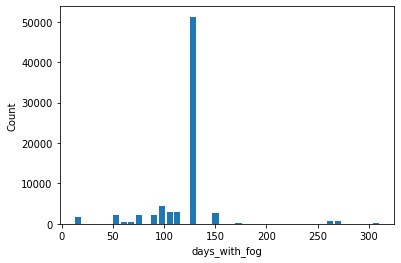

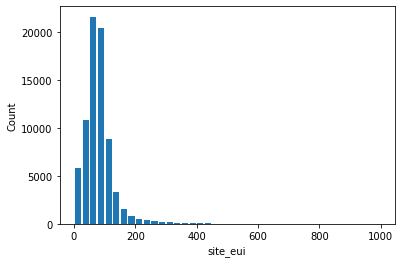

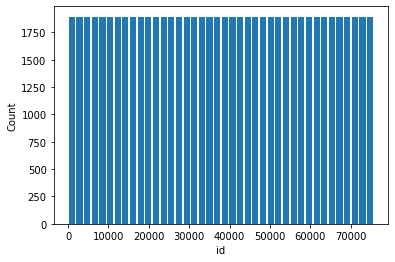

In [94]:
#looping through each column to see the nature of the distribution 
for cols in encoded_data.columns:
    plt.hist(encoded_data[cols], bins=40, rwidth=0.8)
    plt.xlabel(f'{cols}')
    plt.ylabel('Count')
    plt.show()

# Making the Artificial Neural Network:

In [161]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
import tensorflow as tf
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [162]:
train_data_y = encoded_data.site_eui
train_data_X = encoded_data.drop('site_eui', axis=1)

In [163]:
# Normalizing dataset for neural network:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_data_x = scaler.fit_transform(train_data_X)

In [164]:
train_data_x

array([[-2.2887604 , -2.73502847, -1.16308853, ..., -0.31407729,
         0.25707164, -1.73202794],
       [-2.2887604 , -2.73502847, -1.16308853, ..., -0.31407729,
        -3.28174607, -1.73198222],
       [-2.2887604 , -2.73502847, -1.16308853, ..., -0.31407729,
        -3.28174607, -1.73193649],
       ...,
       [ 1.10929044, -1.4443112 , -1.16308853, ..., -0.31407729,
         0.25707164,  1.73193649],
       [ 1.10929044, -1.4443112 , -1.16308853, ..., -0.31407729,
         0.25707164,  1.73198222],
       [ 1.10929044, -1.4443112 ,  0.85977978, ..., -0.31407729,
         0.25707164,  1.73202794]])

In [165]:
#split training data into train and held-out set
held_out, train = train_data_x[:22000], train_data_x[22000:]
held_out_target, target = train_data_y[:22000], train_data_y[22000:]

In [166]:
NN_model = Sequential()

In [171]:
#input layer
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train.shape[1], activation='relu'))
#hidden layers
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu', kernel_regularizer='l2'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu', kernel_regularizer='l2'))
NN_model.add(Dense(128, kernel_initializer='normal',activation='relu', kernel_regularizer='l2'))
#output layers
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [172]:
#MAE, MSE
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

NN_model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
print(K.eval(NN_model.optimizer.lr))
NN_model.summary()

0.01
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 128)               4992      
_________________________________________________________________
dense_31 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
_________________________________________________________________
dense_35 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_36 (Dense)             (None, 256)         

In [169]:
checkpoint_name = '{epoch:03d}--{val_loss:.5f}.hdf5' 
# early_stop = EarlyStopping(monitor='val_loss', patience=100)
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [170]:
NN_model.fit(train, target, epochs=5, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/5
1344/1344 [==============================] - 13s 9ms/step - loss: 2374.0945 - mean_squared_error: 2374.0945 - val_loss: 4794.0293 - val_mean_squared_error: 4794.0293

Epoch 00001: val_loss improved from inf to 4794.02930, saving model to 001--4794.02930.hdf5
Epoch 2/5
1344/1344 [==============================] - 11s 8ms/step - loss: 2146.7251 - mean_squared_error: 2146.7251 - val_loss: 8598.4600 - val_mean_squared_error: 8598.4600

Epoch 00002: val_loss did not improve from 4794.02930
Epoch 3/5
1344/1344 [==============================] - 11s 8ms/step - loss: 2116.0002 - mean_squared_error: 2116.0002 - val_loss: 14996.0703 - val_mean_squared_error: 14996.0703

Epoch 00003: val_loss did not improve from 4794.02930
Epoch 4/5
1344/1344 [==============================] - 11s 8ms/step - loss: 2092.4651 - mean_squared_error: 2092.4651 - val_loss: 7137.0117 - val_mean_squared_error: 7137.0117

Epoch 00004: val_loss did not improve from 4794.02930
Epoch 5/5
1344/1344 [===============

# Scaning Hyper-parameters:

In [174]:
# !pip install talos

In [190]:

def site_eui_prediction_model(x_train, y_train, x_val, y_val, params):
    
    # building the model:
    model = Sequential()
    model.add(Dense(128, input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer='normal'    
                   ))
    model.add(Dropout(params['dropout']))
    
    # testing the number of layers and shapes too:
    hidden_layers(model, params, 1)
    
    # Top layer:
    model.add(Dense(1, activation=params['last_activation'],
                   kernel_initializer='normal'))
    
    model.compile(loss=params['losses'],
                    # Adding the regulizer normalization function from Talos
                    optimizer=params['optimizer'](lr=lr_normalizer(params['lr'], params['optimizer'])),
                    metrics=['acc', fmeasure]
                 )
    
    history=model.fit(x_train, y_train,
                     validation_data=[x_val, y_val],
                     batch_size=params['batch_size'],
                     epochs=params['epochs'],
                     verbose=0)
    
    return history, model
    

In [191]:
# Defining the parameter sets:
p = {'lr': (0.8, 1.2, 3),
     'first_neuron':[4, 8, 16, 32, 64],
     'hidden_layers':[0, 1, 2],
     'batch_size': (1000, 2000, 5000),
     'epochs': [50, 100, 150],
     'dropout': (0, 0.2, 3),
     'weight_regulizer':[None],
     'emb_output_dims': [None],
     'shape':['brick','long_funnel'],
     'optimizer': ['Adam', 'Nadam'],
     'losses': ['mean_squared_error'],
     'activation':['relu', 'elu'],
     'last_activation': ['linear']}

In [192]:
# Running the Scan:
import talos

t = talos.Scan(x=train,
               y=target,
               model=site_eui_prediction_model,
               params=p,
               experiment_name='Site_EUI_prediction',
              )

KeyError: '[2648, 2132, 7041, 20501, 20227, 9139, 13101, 9055, 13132, 11348, 13063, 3827, 3887, 8701, 680, 4393, 3731, 18428, 2971, 472, 14068, 10999, 9431, 19715, 9822, 11119, 9745, 21916, 15186, 12063, 6971, 18362, 6906, 21490, 12633, 8189, 10632, 19587, 18414, 634, 16174, 10610, 572, 19190, 5364, 19671, 20960, 9315, 14653, 5080, 20655, 9585, 19173, 6304, 5338, 17406, 15363, 1692, 124, 7674, 9178, 14066, 13821, 18225, 11805, 4513, 13924, 10535, 7568, 7305, 4782, 6370, 21809, 21179, 19824, 18989, 13481, 1707, 15573, 18777, 14722, 486, 2558, 16283, 13090, 4799, 3027, 18464, 7271, 11637, 12708, 21517, 20531, 11780, 21850, 20300, 17863, 9392, 8154, 8564, 3744, 358, 479, 15422, 14118, 11156, 335, 20143, 12737, 6889, 6155, 12534, 11702, 7094, 5185, 8797, 16094, 6935, 6737, 20131, 14347, 21579, 11786, 3855, 14724, 20523, 11960, 17907, 6284, 14254, 19031, 3771, 20910, 3476, 313, 18830, 13122, 16651, 5423, 5445, 9176, 18820, 6120, 18578, 20007, 14761, 11514, 12198, 18446, 12539, 8934, 9094, 6918, 3781, 10939, 17536, 19267, 15205, 16538, 1054, 11856, 8608, 13017, 5594, 14595, 20698, 4790, 7085, 589, 16117, 5896, 21972, 20699, 16236, 11620, 6326, 7439, 10152, 18595, 10861, 12505, 8599, 10553, 10580, 6000, 8923, 12411, 14325, 12460, 8592, 12809, 14363, 6545, 19098, 4338, 4241, 9583, 10945, 21420, 522, 16534, 10107, 15666, 836, 18652, 15445, 15997, 19639, 13976, 17014, 16919, 6530, 13292, 5910, 17326, 856, 8664, 14771, 17416, 13346, 19941, 13528, 13809, 67, 9820, 11604, 18597, 15904, 20078, 17533, 7132, 2075, 18723, 21747, 9095, 18403, 21631, 15589, 14741, 14786, 20724, 2889, 19682, 17378, 10982, 14373, 17320, 9484, 19471, 15814, 21681, 15123, 19372, 7874, 19547, 6576, 12096, 1363, 15962, 14872, 6755, 8882, 9834, 6039, 12143, 15165, 15176, 1859, 19197, 1763, 9169, 6633, 7895, 8543, 20079, 5086, 13284, 17967, 11716, 20207, 16730, 19169, 13409, 14740, 16462, 3901, 13355, 9932, 3206, 16005, 18643, 19330, 9664, 3943, 16528, 6969, 20965, 4986, 21514, 13504, 12766, 9689, 4119, 13064, 20937, 2917, 4263, 17493, 12178, 5267, 20031, 20934, 6189, 8575, 17475, 12323, 780, 4522, 6276, 5609, 13168, 445, 19392, 610, 3273, 3719, 19816, 2757, 3565, 1379, 9466, 18088, 11480, 7586, 9259, 1790, 6895, 2726, 10659, 340, 17295, 11674, 9105, 20380, 9571, 4814, 19773, 13998, 11302, 17047, 11254, 20435, 15981, 3163, 1604, 21771, 4591, 12652, 103, 17216, 21667, 8752, 14052, 2674, 17804, 18126, 11855, 12772, 12693, 14272, 239, 19231, 7067, 21663, 7622, 11736, 9396, 585, 8155, 450, 7959, 1260, 11077, 19121, 13587, 17550, 8671, 13811, 11110, 18569, 12584, 7892, 16028, 15697, 4126, 11258, 7134, 1623, 14131, 17139, 6749, 4881, 19616, 9475, 2820, 11016, 17844, 17309, 14976, 18151, 21234, 10640, 13147, 9725, 21590, 11624, 6620, 2346, 16226, 2749, 307, 3010, 17169, 11759, 15252, 7995, 5649, 3517, 16830, 16178, 11134, 6767, 14574, 19861, 15992, 2298, 1186, 16261, 15238, 21018, 11622, 17187, 8305, 2729, 295, 18941, 2202, 15029, 20423, 158, 8157, 7455, 15733, 8380, 3840, 6335, 16394, 19432, 21468, 4507, 1848, 20984, 18466, 18831, 21662, 10833, 18491, 21297, 9498, 1495, 21115, 12233, 11769, 2912, 19559, 13526, 15650, 19829, 9616, 4780, 3042, 2905, 773, 5000, 10234, 14627, 2566, 9447, 19436, 8026, 21146, 19352, 7330, 12910, 3836, 3563, 3533, 1062, 18829, 8792, 13348, 5108, 8089, 10297, 47, 5943, 12396, 1482, 17030, 13581, 20902, 7970, 19187, 1770, 8461, 10879, 8481, 11446, 13075, 14431, 21708, 9593, 4937, 20174, 10459, 14600, 7537, 15378, 3687, 17078, 15338, 4992, 8765, 16037, 8834, 5488, 18375, 10500, 14957, 16101, 14042, 2908, 13000, 1556, 5011, 15070, 16911, 12001, 6792, 15586, 21254, 1335, 1802, 2781, 18764, 5816, 9307, 17090, 16720, 581, 11774, 1805, 17218, 13539, 21176, 1777, 17983, 21089, 18369, 6742, 7579, 12751, 18700, 8968, 17957, 1982, 5412, 2909, 14425, 8414, 5883, 6920, 3355, 11199, 15097, 4394, 1797, 1733, 21594, 5533, 12679, 18807, 6661, 12216, 5318, 4685, 14454, 2799, 4448, 19328, 14241, 4094, 11817, 11965, 4304, 18674, 7580, 9901, 136, 21923, 3763, 12377, 10892, 19632, 457, 12456, 849, 14925, 8252, 2429, 20985, 4318, 3885, 14863, 13855, 17265, 17564, 15811, 6291, 4680, 11165, 7793, 20812, 12790, 10177, 5918, 12140, 2224, 9440, 4812, 244, 8326, 20117, 10121, 9792, 16632, 5738, 18115, 21403, 11219, 4032, 14638, 11832, 1918, 16265, 298, 17674, 20892, 943, 1395, 17675, 11293, 19304, 10608, 20619, 4194, 7783, 11376, 10299, 10548, 3766, 20832, 17297, 13398, 11452, 20455, 19758, 18196, 9648, 17281, 1202, 4071, 5056, 18640, 15032, 1697, 5767, 5203, 11191, 9643, 14452, 721, 1952, 21643, 3300, 17883, 3019, 15106, 21445, 2944, 20112, 10396, 18861, 14186, 4778, 19365, 6949, 951, 11051, 10262, 7044, 9185, 9121, 4131, 3189, 15152, 13125, 7251, 18668, 9969, 16090, 19856, 9232, 9433, 15050, 1967, 9813, 13914, 65, 1751, 10043, 17746, 8200, 6929, 12546, 3463, 4699, 20572, 7207, 18244, 12052, 8110, 12268, 18114, 14029, 20, 19537, 344, 12274, 8092, 11148, 7716, 16133, 125, 15971, 10243, 19166, 9362, 16041, 7328, 15404, 19278, 6174, 13928, 17285, 15584, 4869, 6187, 21787, 21004, 5560, 2381, 3974, 11651, 15208, 7641, 8361, 109, 6017, 3909, 17446, 19727, 8815, 8097, 15555, 20782, 15120, 432, 19695, 15940, 12440, 13327, 9103, 10983, 328, 11135, 2931, 15216, 1343, 3629, 17200, 17998, 14309, 6850, 519, 5639, 4440, 18607, 9126, 18655, 7623, 15808, 762, 6324, 11591, 2655, 14035, 4219, 18329, 12762, 17989, 9253, 13538, 15710, 859, 9959, 13360, 16947, 4923, 13520, 15388, 19812, 18693, 17400, 14994, 21456, 7298, 18538, 2193, 19617, 2681, 4104, 7747, 12738, 3528, 9401, 669, 13221, 7149, 1209, 8138, 18901, 9212, 3372, 15524, 7869, 12985, 10442, 1081, 696, 9422, 8464, 8573, 9403, 6382, 12619, 15061, 10920, 9801, 9338, 1591, 14389, 16700, 3369, 19805, 21049, 12760, 252, 3231, 1320, 2903, 1317, 20824, 1662, 12800, 21106, 12431, 10812, 17825, 4619, 11975, 1720, 727, 21540, 600, 19700, 9255, 16290, 20980, 11058, 4419, 2686, 4329, 1773, 4048, 14660, 12943, 7989, 7395, 18266, 14007, 10362, 10032, 11967, 1955, 4719, 10422, 9391, 18736, 3573, 13254, 18303, 3564, 21386, 10239, 20765, 9064, 15461, 14983, 14266, 4623, 1631, 5797, 5740, 13864, 3968, 5725, 15297, 7691, 16285, 10624, 3186, 1001, 13456, 11326, 6308, 6890, 2146, 5947, 4597, 2708, 11286, 20432, 21226, 7188, 20159, 7839, 19373, 11523, 3153, 347, 5879, 20102, 5683, 19789, 16348, 10190, 16171, 20323, 4388, 1256, 21266, 21114, 14986, 19523, 19886, 4915, 10527, 13007, 15340, 7849, 4728, 1323, 20008, 11698, 6970, 4087, 481, 19975, 17585, 13038, 4973, 17552, 4540, 5478, 7505, 7698, 12902, 20213, 814, 13224, 11846, 3733, 2735, 1742, 16292, 9306, 5450, 11063, 7951, 21581, 15016, 15151, 3846, 9530, 15931, 11339, 14449, 864, 5847, 189, 4785, 4401, 21959, 4654, 14451, 3655, 19277, 14155, 5840, 17106, 18765, 15298, 2605, 8428, 20157, 16633, 9999, 19025, 21465, 9360, 17796, 1023, 17345, 19794, 20405, 11001, 18798, 6132, 16821, 20344, 19560, 21389, 9153, 14696, 8721, 679, 3820, 18041, 10528, 14422, 3160, 17787, 9279, 12912, 6214, 8459, 20725, 13933, 14378, 9876, 14512, 16773, 2221, 5023, 2684, 7155, 8333, 16868, 20303, 18165, 15798, 17017, 4843, 20748, 18520, 5093, 6140, 1652, 11743, 18896, 9751, 13665, 13382, 13754, 18009, 15320, 619, 283, 16744, 11685, 5333, 18958, 2284, 1037, 18775, 11770, 7982, 18314, 6330, 3734, 15657, 13232, 13293, 9891, 21067, 11655, 1737, 17159, 4693, 21792, 2095, 11420, 1969, 7619, 16869, 314, 3330, 12676, 11525, 19604, 11917, 4720, 9632, 7715, 10265, 13378, 16062, 21958, 12253, 20054, 18473, 13656, 6115, 12002, 3257, 10649, 2746, 7006, 15968, 9821, 4593, 2195, 16109, 6128, 11697, 3074, 21183, 4143, 9929, 14703, 7947, 18284, 8501, 14090, 3728, 13099, 8711, 2249, 20976, 18117, 3380, 3456, 21152, 14982, 21419, 312, 1689, 20002, 10787, 18756, 511, 21317, 10519, 17842, 13314, 9697, 4076, 5974, 12453, 7119, 15965, 18521, 2680, 6998, 7465, 9951, 5119, 6406, 18691, 20489, 5602, 17629, 15862, 18553, 1764, 17067, 11155, 19444, 6002, 6914, 18748, 10122, 8119, 4584, 15724, 1424, 20958, 15285, 9303, 18193, 8622, 8218, 17691, 5475, 15987, 2188, 15949, 12667, 21873, 21135, 1468, 17852, 15025, 21414, 18566, 2756, 2600, 12173, 968, 1530, 13710, 3605, 726, 4180, 11122, 4539, 18666, 970, 12448, 18602, 19869, 10740, 20935, 18049, 6376, 20936, 19258, 5286, 11157, 12428, 18326, 3597, 8139, 18783, 2210, 11625, 4743, 15690, 11203, 8576, 1855, 18780, 9514, 17002, 8357, 6965, 12862, 14492, 6224, 12909, 1941, 13307, 37, 9416, 546, 9344, 4370, 11615, 4914, 902, 7884, 8108, 10086, 21189, 12225, 10081, 20802, 1974, 14545, 14552, 12447, 7187, 6609, 1141, 3038, 4107, 1047, 11367, 10203, 8435, 6964, 7063, 15072, 500, 12857, 6054, 4467, 10992, 16931, 12659, 6764, 2403, 308, 20470, 4237, 19220, 15572, 9838, 18629, 6714, 21519, 4214, 19749, 10054, 5074, 10022, 21664, 7493, 9287, 18549, 16920, 9662, 5775, 6244, 12585, 18227, 17484, 1664, 1873, 1248, 18318, 1117, 12821, 9327, 11195, 7447, 9364, 8955, 4546, 11074, 5508, 12171, 7604, 160, 18721, 11867, 11731, 20708, 10612, 19996, 19409, 8613, 19117, 11671, 21977, 7077, 15736, 16855, 2459, 4891, 17183, 14, 7642, 1178, 8349, 5287, 18814, 9, 9490, 1716, 15259, 2203, 11008, 14317, 6707, 10766, 2954, 3098, 13791, 13963, 2910, 18931, 4809, 2214, 4389, 11338, 20465, 10023, 6919, 1606, 12070, 4864, 5992, 9920, 8079, 16954, 9899, 3676, 8207, 7075, 8974, 20278, 6716, 5039, 6124, 14913, 4579, 15457, 8223, 3346, 8751, 2422, 10188, 11139, 15707, 7008, 13460, 408, 2631, 13951, 19648, 20040, 294, 16065, 13281, 7403, 16368, 21217, 21193, 20719, 5708, 6679, 13509, 2998, 4438, 5997, 7034, 21304, 11859, 1312, 21185, 464, 16970, 13034, 3701, 5072, 4189, 8616, 7016, 8153, 19720, 14189, 21466, 11489, 17933, 6550, 3070, 20526, 16479, 2633, 17379, 20826, 17881, 4218, 912, 2542, 16250, 17589, 20733, 15407, 9881, 5274, 3615, 6967, 19039, 3285, 5807, 1327, 21913, 15522, 7712, 1682, 10616, 16508, 6866, 16981, 7307, 1258, 9273, 21202, 16711, 6897, 13950, 17671, 3556, 17334, 15485, 17353, 4533, 15919, 9378, 17173, 19566, 14805, 720, 8581, 14926, 19535, 16190, 5537, 9704, 1254, 17456, 264, 6287, 17625, 16854, 4262, 8890, 11460, 16922, 4511, 6974, 21888, 11306, 21513, 11463, 944, 16504, 4051, 10853, 7602, 8916, 871, 18166, 13111, 14213, 17944, 567, 354, 20490, 15195, 7248, 4644, 7929, 11342, 11772, 13807, 4321, 13915, 14173, 1221, 18663, 10040, 5210, 2999, 7054, 1812, 2058, 11680, 525, 672, 20299, 17375, 11699, 13508, 9531, 12816, 18735, 4328, 16155, 14448, 13153, 16417, 14463, 21123, 15565, 3344, 11011, 10047, 4726, 2692, 9935, 6724, 19389, 1893, 1085, 2859, 17742, 1425, 19963, 15023, 10807, 4564, 2816, 10227, 2181, 5258, 18821, 11434, 3792, 13272, 15793, 20761, 19809, 9946, 12638, 87, 18316, 11758, 18273, 7333, 6588, 3570, 13044, 17042, 6482, 15136, 677, 21012, 16973, 13443, 10013, 6510, 9737, 11005, 10278, 2988, 11737, 11239, 16925, 18438, 12540, 12835, 12987, 13367, 392, 20566, 10271, 6883, 13997, 8821, 1217, 5292, 11243, 19418, 12597, 4749, 6136, 11328, 6300, 82, 6093, 3214, 20857, 15059, 3108, 5593, 20673, 16378, 3869, 19485, 16281, 17136, 10795, 10670, 19494, 11497, 9644, 18431, 8103, 3026, 17199, 9352, 12792, 5692, 20635, 3893, 17975, 12410, 16939, 15148, 16131, 14592, 13962, 841, 13236, 20561, 20871, 12149, 6227, 6184, 10295, 10699, 20777, 10473, 7543, 7843, 7269, 4972, 15594, 7523, 6961, 18793, 18842, 18137, 3409, 6606, 14496, 6940, 3595, 2309, 18450, 20827, 21694, 17867, 6994, 17041, 16242, 7985, 1721, 16352, 7483, 18902, 16257, 8702, 8278, 16277, 6365, 18026, 13233, 6822, 13749, 18188, 1307, 4168, 20564, 17244, 20123, 15283, 4118, 6986, 19119, 16806, 17294, 10064, 10628, 7092, 174, 21081, 17961, 15010, 18516, 18412, 10419, 6500, 9582, 382, 11511, 10156, 166, 16343, 13671, 6067, 13895, 8474, 7102, 3337, 7630, 2047, 6723, 27, 3364, 4634, 16757, 7905, 13700, 16012, 17149, 3739, 18527, 6390, 20410, 8174, 1477, 11228, 10754, 5255, 13411, 19075, 16480, 4339, 5935, 21037, 13683, 20084, 2885, 15156, 4400, 21569, 16620, 14544, 17721, 6082, 3481, 20921, 6178, 9970, 19291, 12263, 2651, 19386, 751, 8140, 2247, 9427, 4736, 21524, 19122, 11961, 19525, 21331, 5209, 6694, 20663, 16822, 8949, 5391, 6501, 2662, 15332, 10636, 6546, 1566, 16613, 19607, 11220, 14238, 10508, 793, 1306, 19603, 20413, 19107, 6818, 3986, 6797, 17073, 8040, 9746, 17543, 4332, 11160, 14497, 19358, 1151, 18584, 11989, 21609, 5339, 1541, 10301, 19108, 7670, 10395, 5263, 24, 17792, 6389, 20374, 13407, 20642, 7509, 1170, 20155, 18082, 5539, 493, 3870, 2418, 15513, 9518, 12595, 9342, 98, 17679, 17349, 16755, 6207, 697, 6086, 11687, 6861, 21988, 882, 3784, 21960, 13246, 7746, 12891, 16247, 5360, 17786, 172, 15416, 2844, 10050, 14216, 8788, 3065, 6306, 18822, 6708, 10592, 12244, 6632, 16555, 690, 10090, 11577, 12820, 5301, 19971, 12532, 13171, 2208, 10182, 3165, 16796, 21002, 9602, 13485, 3664, 7930, 13079, 10124, 1816, 13690, 6245, 487, 459, 5136, 21139, 16743, 456, 8322, 4537, 20550, 6766, 6663, 19703, 17835, 3905, 2906, 19582, 18847, 19112, 10007, 13823, 8387, 11298, 14694, 7331, 18612, 1771, 10434, 7733, 4808, 6346, 13040, 20646, 2865, 21460, 3365, 15024, 12577, 12072, 11903, 12572, 2515, 2131, 1382, 14237, 10276, 13662, 17542, 12185, 4378, 575, 8832, 10366, 15147, 6469, 18845, 20706, 20216, 7249, 9868, 14204, 20454, 16898, 1298, 20209, 15816, 3598, 4367, 6327, 19883, 15933, 16086, 15671, 5176, 4275, 7211, 12472, 9828, 18729, 8330, 13469, 19413, 3267, 11754, 17524, 15914, 16839, 10835, 1030, 700, 15622, 15078, 5630, 4017, 18579, 14215, 3150, 3632, 15280, 15055, 19067, 13330, 7145, 13493, 4548, 11807, 6202, 11445, 17918, 7407, 11301, 14153, 3977, 19698, 5256, 8754, 5930, 15815, 13387, 4053, 6930, 8899, 20220, 6258, 2038, 21361, 12077, 8561, 11801, 20670, 2560, 4193, 614, 19252, 21240, 16674, 8168, 5549, 10240, 21159, 580, 21879, 7265, 9049, 18455, 19901, 7742, 21398, 11318, 5904, 7923, 3520, 4795, 7300, 20967, 21167, 13208, 16942, 21035, 2475, 13649, 11890, 8396, 6578, 14227, 14465, 2556, 6529, 8104, 7449, 20653, 8688, 18641, 6305, 8877, 14230, 10225, 21164, 18421, 13778, 9179, 16137, 10696, 18106, 16864, 4315, 7019, 13991, 13459, 9084, 7945, 8022, 6110, 7337, 20565, 13008, 5428, 12176, 3500, 12340, 13441, 4492, 1949, 13311, 18940, 18296, 16493, 17555, 4224, 4848, 8602, 15435, 9479, 11919, 20991, 21306, 17498, 16629, 20612, 2533, 18325, 3851, 14747, 16237, 17991, 15312, 6463, 6489, 7405, 19024, 20189, 17176, 862, 19683, 138, 20714, 18908, 2700, 2477, 14892, 9195, 10941, 10212, 16677, 20463, 1084, 14284, 4383, 15409, 17672, 8041, 14069, 18679, 7834, 20639, 12761, 31, 2830, 18268, 15656, 12221, 3111, 3752, 8658, 13002, 18801, 1800, 13338, 2725, 14470, 19468, 7749, 20371, 14849, 18890, 19118, 10411, 12018, 7685, 15319, 7885, 7273, 19752, 695, 18984, 1548, 10453, 3236, 21670, 18502, 17810, 3136, 13372, 16195, 3340, 15250, 19213, 10777, 1418, 21632, 18737, 16058, 20549, 1624, 1206, 21554, 6980, 20726, 14231, 12967, 6200, 8982, 20928, 5059, 20397, 326, 3309, 14156, 21198, 15076, 16803, 15891, 3635, 18740, 231, 20010, 2719, 10331, 16602, 14158, 9090, 19374, 11283, 2922, 16002, 17799, 14111, 18429, 17007, 4271, 10249, 17587, 20307, 12386, 10604, 6217, 3716, 12293, 7230, 19430, 20945, 21281, 14715, 5395, 7106, 5407, 5325, 1608, 21253, 18056, 17012, 2056, 1176, 3791, 16668, 15300, 7529, 8244, 17902, 21121, 4380, 4004, 17408, 17482, 9706, 4944, 6460, 8028, 15859, 2555, 14172, 17549, 8675, 2156, 8210, 6158, 3363, 8891, 7392, 2262, 20437, 6164, 8098, 17976, 8978, 17287, 13062, 17034, 13788, 18047, 4000, 16609, 6956, 8247, 15651, 8775, 3003, 18097, 10448, 4285, 18146, 3261, 13194, 16447, 3455, 3661, 12980, 18561, 20597, 14128, 7833, 21175, 5188, 18301, 34, 368, 20885, 20600, 16736, 21023, 14410, 21821, 10178, 13397, 19796, 1642, 6587, 11066, 2217, 9998, 2723, 763, 7281, 4768, 3159, 512, 17195, 16258, 13937, 7542, 13840, 16223, 7192, 21537, 18933, 18708, 6873, 20865, 3294, 8488, 21244, 20376, 4100, 5390, 15763, 20167, 1168, 6096, 2485, 7391, 21337, 11619, 9393, 20887, 7374, 17096, 15219, 4228, 9773, 17156, 17694, 9488, 20513, 16145, 15737, 3963, 4206, 3269, 17565, 11395, 8494, 16665, 7780, 6525, 8438, 13588, 7857, 6112, 19037, 20879, 8229, 13491, 15161, 9274, 1314, 9078, 12485, 13892, 11639, 15420, 9018, 6156, 13245, 7049, 2739, 21356, 12429, 8315, 2123, 21559, 11483, 3689, 7003, 20939, 11599, 20333, 13797, 10038, 20644, 12830, 1811, 8566, 8443, 4761, 4472, 17890, 3391, 2537, 19079, 8484, 6728, 12076, 4026, 20063, 3173, 8696, 6252, 15052, 7379, 21439, 107, 7059, 16404, 10189, 19965, 5099, 13031, 19081, 8713, 15905, 6311, 3860, 3725, 1479, 19841, 7530, 1467, 3157, 13925, 19000, 13514, 8234, 18214, 15062, 4210, 12240, 6842, 2065, 15048, 5132, 16150, 6570, 14672, 20829, 11275, 570, 2769, 18857, 11710, 8986, 18874, 3227, 5004, 1114, 7292, 18910, 16011, 8846, 12499, 16503, 3574, 2227, 14869, 133, 3151, 2344, 20025, 9735, 7485, 10392, 20478, 15266, 6446, 6903, 18703, 1731, 2512, 8075, 10819, 5479, 9889, 13606, 6638, 12561, 15193, 10011, 8178, 4027, 1005, 12009, 5184, 563, 17310, 405, 9592, 19441, 999, 9930, 6089, 19116, 20800, 1877, 7024, 230, 10915, 8291, 9312, 21094, 1332, 21968, 587, 12681, 21333, 7396, 7811, 7560, 4075, 5769, 19345, 13334, 2963, 5871, 18264, 11356, 3256, 20327, 16450, 7410, 19672, 3513, 9803, 21477, 2807, 7899, 2949, 2139, 20468, 8165, 6353, 3345, 6771, 995, 18363, 11352, 20356, 1827, 11948, 20304, 3566, 5674, 6540, 4184, 21055, 16537, 21402, 12639, 1252, 3392, 5579, 6547, 8777, 8896, 17146, 494, 10685, 8109, 805, 20051, 2534, 20795, 20854, 13559, 3873, 9931, 15680, 15591, 6602, 20589, 16529, 1275, 796, 8329, 13832, 21278, 2539, 3373, 18878, 12544, 15985, 9805, 327, 2565, 14843, 17558, 2652, 2689, 3684, 15550, 13945, 6211, 15376, 9862, 561, 21474, 9728, 4421, 13276, 21064, 15488, 14356, 4366, 7753, 12744, 16781, 19401, 21075, 13020, 19387, 5665, 1464, 6195, 14348, 21289, 3607, 15714, 11571, 6820, 7014, 4054, 14707, 19894, 19189, 13770, 16042, 3489, 9208, 6858, 4585, 13682, 12990, 19411, 2189, 13271, 6347, 1513, 16638, 14898, 12861, 5662, 15625, 2730, 21578, 16824, 11371, 12587, 14206, 187, 17557, 8981, 20925, 10357, 10020, 17434, 15064, 19771, 18201, 3356, 10903, 13048, 21796, 14991, 591, 19701, 9771, 17376, 17925, 2841, 12344, 1266, 16559, 21309, 21359, 13297, 12019, 13393, 2474, 3617, 5744, 7142, 6122, 17931, 10532, 16221, 13227, 675, 19982, 19318, 2783, 17986, 16317, 15177, 8653, 19992, 21499, 11507, 20141, 14582, 8944, 2017, 40, 18042, 9180, 19899, 4614, 10253, 3398, 21325, 5242, 685, 6317, 13037, 13698, 19735, 9925, 5485, 8549, 15068, 21600, 1490, 8694, 7170, 1512, 17459, 834, 2683, 11994, 3184, 13560, 18153, 598, 3927, 19622, 14240, 20551, 14990, 4647, 20366, 12732, 8195, 7372, 7260, 16836, 470, 4055, 16342, 21214, 6188, 4497, 2620, 15693, 21798, 2148, 3668, 4796, 8604, 9630, 20487, 19551, 18030, 890, 180, 19475, 366, 18616, 6474, 19467, 20496, 398, 10965, 1817, 19675, 1411, 17292, 19316, 3814, 19175, 16750, 7781, 14623, 20966, 5819, 7322, 7975, 18838, 15434, 3740, 10975, 11644, 17164, 1220, 19500, 16938, 9236, 7212, 19115, 5058, 13061, 3432, 7100, 18779, 13151, 8818, 4302, 1212, 2584, 3829, 2603, 13745, 15126, 4816, 7605, 14732, 1371, 2440, 1710, 12614, 7723, 20554, 5635, 3131, 1391, 12650, 8504, 7144, 12979, 6772, 13015, 560, 4922, 13380, 6917, 20316, 19706, 18131, 19581, 11295, 21261, 1027, 833, 1573, 14598, 650, 4019, 20906, 5559, 3634, 20667, 604, 9984, 2078, 15296, 21069, 8524, 5198, 17873, 8293, 15179, 17827, 19211, 12728, 6902, 4183, 11264, 4382, 13138, 16845, 10705, 4097, 9452, 9261, 20313, 19742, 12133, 4945, 916, 20641, 13365, 16809, 3465, 16811, 13722, 18022, 13842, 2024, 9846, 3649, 4220, 19852, 20080, 9124, 16974, 7808, 5888, 9251, 3295, 15099, 6395, 7994, 320, 9667, 6286, 16717, 11015, 4289, 188, 8741, 9071, 1148, 18625, 8587, 18970, 4255, 18747, 13830, 11018, 5363, 21848, 5456, 8201, 19429, 14947, 20499, 15295, 3255, 11391, 4578, 9468, 6768, 6921, 3265, 348, 3317, 18623, 4254, 16861, 15583, 778, 2311, 9719, 12819, 13644, 10012, 21846, 4080, 18935, 12179, 2482, 17682, 4892, 6084, 20757, 12668, 19177, 4786, 20940, 3085, 19057, 11510, 12717, 9584, 12895, 148, 13944, 19793, 16536, 13585, 5617, 11840, 12665, 6087, 5429, 1964, 11862, 3326, 7699, 7420, 12161, 11052, 18778, 10857, 11555, 18992, 4424, 13646, 16522, 8228, 16443, 1617, 12092, 7108, 16319, 15725, 7841, 2713, 12908, 20139, 18529, 10881, 12378, 19172, 16495, 21463, 847, 8601, 12391, 8164, 20524, 5647, 14065, 19892, 18877, 260, 1289, 14100, 6201, 11364, 21086, 16256, 6665, 322, 18459, 6952, 5044, 11078, 4235, 18391, 6726, 21865, 14477, 12305, 9187, 20364, 19306, 5500, 20609, 21332, 10183, 16179, 1857, 9811, 14611, 9544, 17994, 20483, 14397, 10468, 16589, 14277, 10613, 8895, 4925, 6591, 903, 15421, 20000, 16553, 17442, 7846, 785, 21602, 21215, 21942, 6658, 21415, 13476, 419, 13658, 11700, 1108, 16893, 3419, 19298, 14498, 5734, 12879, 11222, 8547, 11205, 16438, 7285, 21668, 913, 9836, 10530, 19170, 19245, 2111, 17561, 20103, 1630, 21940, 17886, 1519, 15911, 12840, 15191, 2629, 12024, 612, 5082, 9294, 2572, 13120, 9002, 6116, 14022, 11964, 20310, 21551, 16376, 11197, 12445, 20630, 6104, 7621, 4526, 4182, 4943, 15131, 10481, 16624, 10928, 15942, 13436, 5477, 7603, 14475, 10120, 2143, 19799, 16324, 11496, 8820, 3987, 10510, 11310, 938, 21267, 19721, 12713, 705, 5239, 14084, 15234, 9205, 454, 13891, 18222, 18711, 4692, 11502, 16293, 9539, 17713, 9694, 3258, 2425, 13056, 9687, 14536, 14405, 4294, 7587, 18632, 11152, 12294, 800, 18155, 17081, 20853, 21492, 7478, 13734, 11955, 15169, 5029, 13681, 19495, 1107, 14130, 20727, 2089, 8749, 3559, 17775, 299, 17426, 1966, 17214, 3633, 7566, 7624, 15355, 7987, 1409, 4825, 1730, 16509, 17889, 18395, 11745, 13627, 21933, 1638, 11019, 14444, 3681, 21404, 20581, 18289, 18581, 7957, 18454, 6051, 2186, 18132, 2039, 16110, 17409, 10109, 16163, 5230, 3619, 15533, 15385, 21826, 11952, 17735, 9247, 6803, 21724, 13575, 13965, 6787, 14050, 14031, 3761, 18212, 955, 16264, 10764, 13675, 18744, 1154, 12047, 14577, 1070, 18824, 14590, 18522, 17394, 215, 2437, 11057, 8936, 10969, 2423, 15545, 21875, 21268, 15124, 11027, 9015, 12361, 4049, 9522, 14033, 21621, 10629, 19002, 20339, 448, 10654, 8674, 16388, 4371, 9257, 19388, 6802, 13058, 12212, 14725, 20224, 12040, 11815, 2503, 17652, 11877, 16545, 9439, 10738, 11627, 8477, 19359, 12961, 18005, 12078, 14773, 2599, 12865, 113, 21547, 4195, 17901, 5415, 17032, 5715, 11711, 20252, 7311, 12814, 3616, 17277, 16777, 17734, 9714, 15759, 2307, 6809, 17474, 19378, 7618, 16627, 1569, 12301, 8227, 556, 20676, 1990, 908, 17207, 10163, 21811, 3710, 16301, 12131, 2987, 17621, 1735, 20476, 8871, 2870, 21482, 1663, 6465, 20447, 2149, 21480, 4187, 6234, 12600, 4691, 3000, 5678, 18062, 3241, 10745, 9852, 646, 20946, 15383, 6157, 10664, 8698, 5506, 7467, 20197, 12122, 5893, 21893, 15824, 2366, 21709, 20481, 18913, 4204, 21301, 6219, 15774, 6946, 10968, 16871, 8080, 14394, 1917, 967, 852, 1416, 14210, 17875, 693, 787, 20172, 1339, 8558, 10863, 14692, 14485, 17572, 8782, 17614, 3148, 17160, 17659, 19586, 499, 21793, 12579, 4714, 16780, 8848, 2824, 12025, 18891, 5403, 13466, 10449, 14374, 8171, 16746, 18517, 11294, 11911, 7091, 19972, 11288, 21250, 9559, 12193, 8267, 2650, 14975, 8352, 11439, 20989, 14605, 10876, 13871, 139, 13296, 16369, 18574, 10954, 5294, 13862, 13287, 13416, 1782, 14618, 6484, 2826, 6028, 15569, 10317, 19949, 4711, 3496, 21162, 13826, 13982, 4556, 9194, 15670, 18066, 2968, 1656, 18091, 6073, 4501, 13959, 20044, 10019, 249, 2334, 17054, 8925, 20127, 10635, 11386, 18197, 17829, 19325, 3483, 4947, 20517, 5316, 20519, 18037, 4162, 4120, 729, 21607, 7645, 18440, 10005, 7076, 142, 5534, 11713, 19212, 13006, 5495, 5265, 4463, 21348, 15173, 11259, 15364, 14340, 14415, 6055, 19224, 3248, 12202, 21109, 7968, 19679, 1911, 15786, 2450, 11473, 6424, 4957, 15502, 16013, 21640, 19833, 21970, 3920, 8530, 16646, 8546, 5824, 8718, 21484, 2066, 6264, 11611, 21157, 5002, 21241, 12044, 578, 4437, 14142, 21586, 10424, 20387, 13657, 1162, 13394, 5768, 13661, 9537, 14680, 15213, 17211, 11290, 5530, 16052, 3439, 12352, 21533, 12194, 20754, 3596, 16153, 20186, 10791, 20195, 4607, 1378, 10645, 921, 292, 14989, 5503, 10118, 2105, 622, 14092, 12395, 20998, 13551, 9588, 11064, 21515, 748, 15974, 3691, 2855, 15486, 20362, 20013, 5584, 5897, 4349, 12918, 2587, 16295, 19654, 15257, 5326, 9033, 20075, 1916, 12925, 16733, 12295, 9290, 16958, 16652, 21003, 9875, 8181, 19737, 3845, 19299, 15267, 18170, 3411, 9265, 18788, 19424, 7438, 13309, 9435, 1552, 8919, 7971, 21619, 18085, 3471, 224, 3828, 9477, 6473, 17955, 11494, 8318, 13352, 6628, 11192, 21346, 6511, 11884, 11175, 14097, 3216, 7728, 16828, 12379, 12093, 2857, 7714, 7378, 9549, 1998, 19336, 13395, 20049, 10563, 21833, 8206, 409, 2506, 9077, 4486, 17127, 14739, 16692, 12394, 15492, 19379, 4345, 15637, 8386, 10447, 6053, 9575, 14135, 19404, 17450, 20851, 15999, 17687, 20385, 15542, 16843, 2278, 573, 19561, 5385, 11282, 7491, 4179, 16310, 5933, 5856, 17590, 173, 412, 6653, 11738, 10066, 3221, 10216, 11789, 7876, 6514, 10465, 9512, 1386, 3516, 15125, 4108, 15738, 3675, 21509, 7838, 16282, 3883, 3665, 8289, 21799, 11309, 17964, 18839, 7157, 5101, 6536, 8828, 10369, 18019, 155, 5431, 6350, 652, 15046, 2529, 11662, 10360, 18971, 7672, 11285, 467, 6722, 12155, 7198, 10381, 20269, 12259, 19572, 21507, 11358, 10378, 10722, 15943, 20472, 2851, 9926, 5091, 10901, 8163, 21766, 17201, 20015, 16635, 10633, 12421, 7844, 7450, 3021, 6923, 935, 4583, 12483, 18163, 8514, 20449, 3323, 10619, 16183, 1577, 21572, 9158, 4490, 16484, 19343, 19194, 20166, 16009, 1875, 20616, 16040, 20672, 10306, 14329, 20353, 16782, 18174, 14017, 2828, 20398, 3442, 7681, 19792, 15648, 4653, 15897, 13156, 9590, 18094, 19449, 11844, 12956, 9495, 13094, 22, 6108, 3410, 20591, 407, 5618, 17006, 14265, 2876, 17210, 15937, 6769, 10117, 4928, 2290, 7217, 14903, 18039, 10825, 17573, 14871, 18447, 19473, 14560, 15273, 9683, 19983, 6380, 3891, 14568, 16978, 3102, 20900, 13046, 10623, 3581, 3333, 704, 867, 12189, 11431, 4313, 10912, 6874, 17155, 7809, 16483, 12451, 21874, 7591, 12491, 2767, 19781, 4046, 14387, 9774, 5102, 6135, 453, 2104, 5976, 16441, 12518, 3628, 21074, 19062, 7297, 21908, 17878, 17981, 20395, 16138, 9042, 17269, 17074, 11333, 2074, 21565, 12126, 19227, 20997, 11886, 11503, 16325, 3586, 6377, 8499, 15079, 11690, 10520, 8106, 1419, 2852, 8630, 6206, 2789, 73, 7105, 11646, 17415, 7648, 21570, 4835, 18239, 2390, 19744, 9299, 11244, 4952, 5180, 1458, 3603, 11341, 21116, 16543, 3587, 21305, 4874, 2345, 15534, 9483, 16694, 21666, 20588, 15920, 19854, 3879, 1055, 2397, 4859, 2001, 2253, 13594, 2957, 1280, 16045, 11241, 17567, 11461, 12088, 1885, 16612, 21054, 17005, 21127, 17934, 5697, 17642, 18463, 16951, 14910, 10547, 12644, 14177, 10184, 1077, 21962, 6976, 10056, 15458, 11412, 16851, 11540, 10252, 5785, 11536, 21701, 3498, 3577, 5156, 6704, 21177, 17701, 17226, 21926, 16949, 20442, 948, 19216, 11923, 18800, 2147, 17537, 5927, 11760, 12248, 19602, 16124, 14940, 11563, 15497, 4455, 14835, 16928, 19440, 6794, 6166, 19021, 9872, 4077, 12706, 20434, 15610, 14144, 7028, 11751, 13577, 18310, 1351, 5805, 12242, 18785, 8947, 3274, 19613, 21639, 1994, 13121, 5517, 20957, 21005, 1760, 14138, 18787, 794, 14339, 15996, 8111, 4130, 11841, 5037, 1957, 12209, 13312, 4422, 7528, 401, 8540, 3911, 4683, 16485, 11153, 18637, 15515, 15379, 18955, 8423, 9025, 15907, 19828, 20444, 3625, 4365, 14807, 16500, 16713, 14663, 3575, 3862, 3473, 5804, 9548, 8856, 6611, 21842, 2997, 14073, 6092, 9040, 6381, 19192, 637, 8277, 10559, 18305, 10650, 1092, 2006, 19968, 4491, 18321, 9442, 13051, 8629, 21120, 19157, 11766, 261, 20690, 7775, 9113, 16354, 5583, 2348, 10202, 9171, 643, 4504, 14820, 12191, 9744, 17673, 8840, 12678, 5158, 11879, 13792, 2028, 15848, 17452, 638, 20158, 17348, 9065, 13033, 5244, 21163, 3293, 20260, 3535, 12735, 145, 1585, 11732, 13844, 6014, 4477, 19800, 21149, 16362, 18058, 11656, 12091, 18671, 749, 13396, 5212, 9600, 20701, 7167, 517, 13130, 101, 897, 11605, 10839, 6825, 13761, 17593, 150, 18608, 2337, 20497, 18444, 21451, 20128, 15003, 18317, 6589, 20963, 5815, 3551, 19879, 21473, 5278, 4028, 8929, 20611, 17140, 19951, 12443, 20784, 13750, 7707, 2709, 20656, 13100, 5260, 10880, 3291, 2994, 6319, 3900, 574, 6021, 14857, 6076, 19104, 6414, 11845, 10356, 750, 18338, 16862, 14501, 16658, 6250, 14062, 21204, 1978, 12975, 21841, 13817, 10911, 11164, 20918, 96, 9238, 9510, 2159, 16844, 11307, 17703, 12375, 9727, 16604, 14713, 13845, 5748, 8077, 2563, 14418, 904, 11334, 9032, 6146, 13635, 6601, 17516, 791, 6371, 6420, 10746, 20855, 5736, 11683, 12974, 7572, 2710, 11539, 5564, 21247, 15616, 21286, 15951, 20191, 13919, 12486, 3478, 6223, 20064, 9598, 6979, 13794, 16279, 10112, 1094, 19731, 14222, 1384, 1083, 6795, 15979, 4479, 7226, 16154, 21890, 21574, 655, 5330, 9006, 2037, 8192, 1167, 12846, 19628, 10025, 14527, 3167, 20820, 21479, 5440, 10849, 11515, 2513, 19865, 7316, 13266, 489, 8037, 13059, 13347, 21030, 219, 20119, 11887, 18898, 18687, 364, 889, 10947, 10091, 10660, 11104, 7236, 7477, 1064, 18346, 14310, 12215, 4854, 19516, 20361, 11933, 20161, 13765, 17248, 5459, 1372, 9586, 4679, 5379, 14702, 771, 5199, 5124, 18252, 8862, 17500, 10531, 13686, 1046, 10948, 5821, 2230, 8924, 20343, 6847, 17982, 3561, 15262, 7164, 17760, 2564, 6183, 10280, 12123, 11542, 19910, 7908, 10824, 986, 11189, 7384, 6126, 6034, 216, 4439, 16095, 14711, 16430, 4721, 16870, 9621, 20978, 4830, 19764, 1437, 6179, 12074, 18211, 18274, 21396, 5589, 3394, 1634, 18418, 20014, 2407, 7553, 13336, 14408, 2758, 3155, 21452, 13029, 4240, 7657, 3878, 3700, 15664, 16251, 243, 3532, 9613, 9837, 11204, 10181, 20277, 9473, 18152, 13451, 15595, 346, 18757, 2071, 19435, 16099, 4659, 108, 6215, 4567, 274, 17296, 9878, 17147, 11788, 18856, 5025, 17256, 7239, 12422, 1633, 1434, 17132, 20729, 13725, 19878, 9226, 19907, 3215, 18786, 6361, 4939, 21310, 10060, 9967, 6973, 38, 9849, 20620, 21092, 6229, 684, 18961, 5018, 12725, 8478, 11963, 5853, 2884, 8780, 6344, 9736, 19229, 16737, 4566, 12086, 3277, 16695, 3144, 6444, 2995, 19787, 8586, 17308, 9333, 16802, 14082, 2718, 10909, 11550, 19647, 14609, 12094, 2660, 8993, 18224, 11718, 17420, 15681, 1440, 9038, 2413, 17232, 12721, 14282, 13972, 19946, 8167, 16050, 14166, 10837, 21039, 4802, 1020, 15932, 6626, 3275, 13406, 949, 7953, 16684, 11071, 21493, 11847, 20234, 17299, 12264, 17575, 1615, 7886, 3636, 6829, 20108, 16914, 19147, 14013, 5367, 1050, 21438, 13818, 7109, 7766, 17767, 10575, 11918, 14283, 6568, 4831, 17528, 16184, 16402, 21870, 9823, 19244, 20901, 15691, 8447, 8385, 14245, 16776, 1626, 15424, 3209, 17879, 3949, 5655, 19483, 16166, 4085, 14576, 3994, 1718, 1942, 21031, 15535, 14509, 16361, 15138, 6688, 15455, 1203, 12277, 10380, 16813, 11552, 18452, 7633, 1567, 10902, 15000, 20070, 6044, 17576, 5810, 20897, 17603, 5702, 1708, 20627, 6127, 19045, 10114, 14464, 11902, 11889, 9829, 4057, 16837, 2737, 9870, 14407, 7319, 5297, 21137, 11592, 1510, 13728, 7240, 19125, 2002, 8670, 21376, 20894, 4821, 11870, 17436, 3387, 15532, 48, 5877, 11187, 17903, 1475, 4630, 19934, 6492, 19054, 5688, 9525, 21444, 68, 1443, 16945, 3694, 10784, 5397, 8031, 20999, 2858, 5826, 4020, 20988, 1976, 18135, 16448, 13889, 11997, 2016, 5729, 2232, 10656, 17097, 7457, 8306, 17449, 15272, 18497, 11262, 21411, 5142, 20177, 11634, 11368, 10639, 20856, 10860, 13673, 15026, 5223, 19254, 7599, 21156, 19361, 3962, 14267, 14382, 19286, 2797, 6033, 20188, 2008, 15715, 8595, 3104, 7046, 8331, 7310, 892, 18594, 1858, 19919, 5200, 11520, 16007, 2364, 13423, 17990, 10155, 6323, 21529, 21649, 10462, 810, 1292, 8888, 20956, 17684, 19539, 21284, 11668, 14104, 8310, 1093, 16815, 7409, 5916, 10676, 19047, 1779, 12060, 7973, 17560, 18067, 6557, 3331, 5574, 914, 11980, 8905, 17896, 437, 19870, 8567, 18377, 19415, 17570, 19154, 19985, 342, 6240, 10558, 15008, 1438, 3048, 21951, 19939, 12739, 13727, 7663, 11904, 11384, 11089, 16863, 2945, 13085, 11720, 2470, 1138, 8528, 18591, 12235, 385, 3558, 1554, 2543, 1188, 11336, 3089, 15395, 19875, 18090, 17805, 17145, 8288, 16673, 7665, 14359, 12673, 3769, 11667, 11529, 5309, 10337, 3418, 17087, 5081, 17259, 4550, 3967, 1453, 16173, 19498, 2907, 19326, 10291, 11633, 17870, 2333, 14203, 5794, 21212, 13711, 15063, 4411, 14555, 7921, 19527, 10789, 17319, 17695, 16092, 16715, 15128, 3318, 13492, 337, 12455, 5448, 899, 11900, 4473, 2894, 4081, 8979, 3453, 20602, 19193, 17039, 11224, 15060, 12522, 13834, 12142, 19120, 4169, 19390, 19034, 3541, 21560, 17239, 846, 19274, 9668, 13057, 8404, 1968, 4961, 11721, 5247, 13084, 16071, 8051, 9996, 4818, 93, 6824, 11820, 20953, 1717, 4569, 19858, 3133, 2760, 8739, 15339, 21618, 5627, 10539, 1625, 1999, 1864, 18554, 16520, 11381, 12480, 21150, 20359, 939, 19630, 19338, 19477, 16228, 9941, 8222, 12769, 8716, 17283, 7382, 14459, 14567, 13883, 5694, 12824, 18008, 17619, 12329, 1856, 15846, 14462, 19769, 18542, 3749, 1985, 18465, 5925, 3041, 8961, 18560, 6257, 10134, 668, 20681, 16331, 10497, 9188, 18781, 9341, 13107, 10251, 1116, 18615, 4899, 20618, 4312, 18646, 17545, 562, 6849, 21276, 6194, 9623, 12770, 11939, 10985, 19522, 3539, 2126, 12515, 12765, 14070, 3191, 11850, 6681, 6840, 2491, 12324, 709, 1086, 1962, 9517, 6143, 19145, 3811, 15239, 11812, 6519, 6702, 5129, 2476, 14658, 217, 15092, 11670, 7615, 1052, 12574, 18086, 1673, 17048, 10581, 18650, 11920, 9046, 14481, 20869, 10416, 19457, 7920, 17126, 3760, 21283, 11357, 7541, 17157, 3738, 2567, 236, 9349, 13907, 10848, 6984, 15630, 20969, 11600, 9782, 18050, 11868, 4884, 9014, 6740, 7095, 14471, 15094, 8180, 1067, 12331, 2330, 18841, 4211, 20296, 11910, 5446, 16542, 17562, 3106, 16393, 1972, 19243, 3202, 6553, 7686, 11151, 14629, 17059, 20238, 11061, 7218, 11128, 10408, 15701, 14450, 11, 5890, 8205, 4716, 11106, 19082, 15353, 20689, 647, 21769, 2840, 7690, 641, 7916, 7473, 3014, 9334, 5659, 639, 7490, 14525, 7074, 4920, 1486, 19656, 6613, 15769, 19614, 15855, 20026, 7171, 8726, 942, 21767, 17535, 14270, 15263, 18003, 2659, 813, 12482, 11136, 35, 8203, 19093, 374, 7737, 197, 7974, 9701, 21399, 2924, 15554, 5492, 7112, 13193, 10185, 9532, 17668, 18407, 15623, 7373, 14167, 9675, 14409, 15917, 13472, 1576, 17559, 1542, 21742, 10961, 17339, 7774, 18319, 13755, 6527, 21887, 20580, 12302, 7819, 4756, 19610, 20445, 15054, 15986, 21561, 18358, 21863, 11444, 7815, 21922, 9658, 4917, 17737, 8128, 18093, 15088, 2738, 4465, 15269, 3717, 14015, 3434, 11031, 7295, 4323, 2550, 11140, 3953, 10037, 5279, 7233, 7358, 15580, 1841, 10951, 9942, 18164, 9770, 9034, 4514, 18235, 8851, 17114, 10671, 682, 20498, 3764, 12898, 15133, 5116, 16254, 16790, 10477, 4877, 7548, 7364, 13356, 15660, 6583, 18746, 13599, 14606, 7689, 15115, 3416, 3205, 19810, 11858, 1806, 7727, 5603, 7125, 8843, 10049, 3491, 9281, 13172, 2023, 1744, 8778, 2576, 17467, 16997, 2602, 10934, 5863, 16966, 8290, 1357, 17511, 10407, 20746, 7201, 19474, 16795, 6555, 8368, 6942, 7984, 21312, 6246, 10814, 4481, 10311, 85, 16425, 18784, 10088, 10582, 12290, 5737, 1322, 3685, 20321, 1863, 12763, 15553, 11226, 14762, 9152, 17466, 14330, 13744, 7639, 20073, 8241, 4381, 8190, 20530, 13231, 5332, 9285, 21606, 20992, 4029, 10753, 15603, 18384, 9629, 5938, 13077, 18995, 11324, 12720, 13815, 13743, 835, 20622, 17923, 9519, 21009, 21919, 7638, 7662, 17243, 13432, 12028, 17095, 656, 16807, 14848, 18987, 20758, 21302, 4645, 18282, 5232, 122, 7948, 1095, 12573, 10561, 3714, 19597, 2005, 20134, 19069, 14633, 5040, 20932, 12642, 5616, 11575, 21832, 12960, 7671, 4395, 2102, 18804, 9275, 12795, 14575, 12523, 11279, 17025, 3278, 7419, 8526, 5742, 20668, 8149, 5860, 5811, 14263, 18148, 702, 15037, 9463, 4872, 9793, 16059, 13362, 12907, 14855, 2238, 7852, 4520, 11938, 14513, 14613, 10130, 349, 3546, 3492, 19933, 237, 1227, 20841, 10244, 19141, 11785, 11081, 16103, 11070, 360, 19524, 3448, 6251, 13548, 17851, 18331, 1399, 14307, 16532, 16457, 18690, 12104, 2176, 3437, 21365, 4342, 5695, 466, 21368, 15851, 7280, 19739, 13948, 9723, 11521, 11585, 14288, 3279, 440, 8209, 20097, 13434, 7130, 18068, 2468, 10218, 15223, 626, 13285, 1422, 17117, 7304, 8263, 13703, 16923, 19871, 17771, 8255, 21442, 20521, 12154, 11773, 6203, 18327, 18965, 16664, 740, 179, 5392, 19997, 11237, 17215, 1983, 15935, 16340, 7912, 12022, 1436, 8339, 18001, 14490, 16020, 21105, 3193, 21800, 1775, 3972, 15411, 7574, 7366, 21133, 11137, 15614, 1646, 10467, 4651, 3201, 19399, 21735, 17015, 3158, 1788, 5054, 485, 16365, 21603, 3613, 3270, 234, 7946, 11598, 4023, 839, 4981, 2775, 14010, 11883, 7446, 12516, 3753, 12764, 5585, 12250, 819, 17858, 4611, 515, 16029, 12594, 11409, 9759, 200, 7453, 19785, 4311, 18014, 12513, 18220, 4827, 21679, 5281, 16466, 14365, 1965, 12224, 9825, 15222, 4856, 16233, 64, 10388, 4608, 13354, 12205, 1277, 14643, 13890, 10379, 1122, 11250, 5073, 5499, 9938, 14290, 14971, 20711, 15749, 5449, 19583, 16297, 5254, 14318, 3934, 11665, 7492, 1152, 16814, 1940, 1060, 4870, 10279, 16607, 10024, 19843, 3438, 43, 11060, 19497, 13779, 5721, 7229, 3593, 21882, 16106, 21797, 6004, 6334, 9686, 2637, 13634, 6062, 4773, 13003, 10129, 503, 18339, 1913, 15021, 11017, 17608, 1110, 16597, 20314, 17828, 13701, 12605, 119, 2299, 1126, 689, 14766, 17644, 5839, 3314, 16426, 973, 13503, 14882, 10431, 8903, 7575, 3225, 10464, 16749, 14018, 15211, 17051, 15203, 17052, 3730, 8465, 15689, 12612, 6339, 823, 19150, 12217, 2867, 3053, 1166, 1246, 1296, 9883, 7425, 4616, 16075, 14297, 20201, 12303, 11261, 16024, 10703, 21238, 16169, 5177, 15311, 16064, 13183, 3204, 18916, 13595, 3931, 19422, 17909, 15668, 17788, 4838, 12132, 2207, 7055, 16696, 2514, 9965, 19768, 10197, 17166, 15251, 2611, 6088, 8677, 11366, 3538, 6988, 13190, 14909, 19046, 2682, 13949, 4958, 1613, 552, 11082, 18471, 5793, 12342, 14067, 606, 16605, 5008, 19889, 20392, 11943, 18308, 13495, 15790, 6249, 6659, 21236, 17280, 21043, 15537, 3640, 18503, 3925, 13852, 12740, 15823, 3726, 3808, 1979, 3154, 1021, 8003, 319, 1374, 7341, 16902, 5161, 20987, 13010, 12860, 7175, 15744, 17984, 4402, 7956, 19660, 12, 13114, 3646, 12901, 13410, 17120, 13185, 14526, 3469, 10556, 4852, 5343, 1956, 4037, 2442, 718, 16268, 3708, 3515, 18078, 3461, 11147, 21697, 9461, 16198, 5601, 13613, 17458, 16618, 7887, 12556, 9222, 13650, 16681, 19759, 14615, 20687, 20415, 9896, 10454, 21585, 8872, 10402, 6888, 97, 20874, 2338, 13166, 15946, 12029, 13257, 9955, 1101, 11649, 18919, 11383, 18044, 1145, 9534, 2868, 8341, 11437, 20739, 19464, 6776, 14808, 8183, 19370, 17534, 20599, 20245, 21388, 19646, 1182, 1285, 14445, 5302, 14751, 15291, 18059, 4122, 2854, 16917, 16374, 5206, 11966, 21699, 6199, 6948, 10611, 3302, 21124, 12823, 14537, 10160, 15799, 1977, 1207, 310, 7262, 9066, 13480, 18547, 18143, 5216, 15015, 8984, 9874, 6412, 18344, 13489, 2811, 13604, 12218, 4334, 1778, 2461, 18672, 18256, 13399, 13519, 5154, 2108, 8233, 12336, 8952, 14426, 2151, 14057, 8250, 19670, 3271, 6813, 6972, 19846, 21739, 19590, 2134, 10308, 20950, 7655, 9685, 8758, 10588, 17658, 10006, 6285, 20555, 8597, 4573, 15539, 18242, 17627, 19519, 4863, 8548, 12400, 18485, 6038, 14963, 539, 11114, 21715, 19481, 18261, 4677, 4575, 18718, 19077, 8285, 16053, 20286, 20624, 1033, 1368, 17808, 20107, 57, 18707, 13880, 21979, 1704, 4755, 2103, 7501, 10229, 8328, 3146, 5269, 4938, 18572, 13333, 4615, 11429, 6746, 21657, 13290, 5483, 4141, 21636, 15672, 5912, 5396, 9677, 10441, 21229, 12727, 12220, 6161, 21587, 17807, 20411, 4815, 428, 21273, 8475, 11369, 19448, 3382, 21532, 275, 19531, 6450, 3183, 18876, 21881, 18234, 9450, 99, 21956, 21038, 8980, 9286, 1545, 19176, 8917, 2960, 7279, 4364, 1087, 13655, 149, 6453, 8301, 6975, 6676, 3834, 1801, 5388, 4245, 14970, 7632, 19196, 15874, 14954, 11586, 12687, 13936, 16112, 5730, 9569, 15214, 14614, 15277, 15362, 3553, 16449, 13747, 9799, 16022, 7913, 19863, 4035, 12183, 19443, 16017, 45, 10926, 3436, 15033, 9028, 10724, 21143, 9873, 18251, 9379, 14756, 8084, 14960, 6697, 5832, 20790, 11349, 3833, 11054, 10980, 8214, 13586, 3233, 2663, 20888, 7243, 3342, 10663, 11272, 7825, 14500, 21406, 9216, 11167, 13947, 425, 6953, 5452, 9198, 18762, 12048, 16213, 14300, 21765, 8281, 1102, 13803, 212, 21110, 7133, 21248, 20178, 13784, 1032, 10004, 192, 3525, 13618, 17563, 9576, 6280, 16298, 13600, 17076, 20256, 6013, 20414, 1563, 21104, 10723, 10598, 20164, 19446, 14298, 9136, 10410, 19888, 14269, 11305, 3490, 9796, 15833, 7335, 15717, 20412, 7338, 2200, 17521, 2871, 3793, 5577, 16840, 2935, 20629, 3534, 14652, 1061, 2794, 21695, 9168, 18754, 15731, 9070, 12071, 20206, 10476, 9347, 6368, 2636, 2847, 19900, 17689, 6182, 2981, 11819, 5937, 19804, 11056, 5141, 19493, 7596, 10557, 4833, 17036, 4967, 3229, 12589, 12950, 10074, 10576, 6333, 16873, 4297, 3997, 15899, 524, 14557, 16475, 21617, 8344, 14962, 8830, 21622, 16202, 11181, 15520, 5157, 7219, 17391, 547, 2317, 4470, 16211, 16400, 10217, 3656, 10167, 9885, 8052, 7906, 18999, 14862, 732, 16499, 7140, 19322, 9114, 13012, 21531, 8522, 8766, 20357, 11361, 7532, 6058, 19369, 19659, 10956, 13939, 9039, 16752, 115, 10817, 3208, 13810, 14430, 1804, 10989, 11314, 11630, 20762, 19315, 18928, 15617, 10092, 11779, 8371, 19536, 9547, 20730, 14520, 21713, 12815, 1472, 5231, 18250, 2848, 9100, 5322, 19266, 8213, 4618, 11747, 16731, 963, 7810, 21734, 20110, 5462, 21323, 17598, 3569, 458, 17184, 18949, 3981, 1156, 1200, 7504, 8027, 11672, 8729, 20994, 18402, 13534, 14884, 14126, 15287, 3260, 16622, 3835, 16061, 1924, 3984, 5645, 17251, 17213, 4855, 16224, 4074, 21936, 6100, 18095, 21996, 8796, 12398, 17646, 1866, 18962, 16727, 6830, 14854, 14438, 19724, 2966, 8402, 5790, 5545, 20844, 9004, 15953, 21991, 5313, 18467, 17648, 14856, 4678, 6698, 7258, 8656, 13005, 20603, 19782, 19398, 6388, 2866, 13273, 12926, 7097, 199, 870, 4940, 7730, 13108, 13533, 11505, 12257, 3252, 9368, 5755, 3039, 4227, 19499, 5007, 12502, 17831, 2495, 10469, 17407, 171, 12335, 7557, 9132, 13431, 15462, 8100, 3868, 2932, 13616, 15392, 2927, 8338, 15827, 15480, 285, 3341, 8270, 10972, 8822, 16395, 21257, 886, 17453, 769, 9026, 14566, 5381, 7818, 20808, 17013, 8226, 3479, 972, 9948, 17058, 6222, 21536, 10842, 16523, 4425, 8534, 12631, 16008, 20634, 4363, 630, 20494, 4819, 12653, 17343, 14656, 14281, 7726, 8436, 7785, 11878, 3706, 3031, 538, 20399, 3352, 18352, 808, 9061, 5830, 13325, 10565, 17288, 9666, 4750, 367, 12900, 7535, 9540, 21817, 21369, 5623, 12261, 19811, 21048, 10483, 19605, 20440, 14818, 8123, 19618, 13617, 379, 6277, 12469, 10710, 3705, 20448, 10847, 18768, 5977, 12356, 19860, 6196, 4200, 4276, 7993, 14150, 2162, 3584, 7351, 10637, 14411, 4594, 10420, 4152, 13640, 10261, 7299, 837, 527, 19205, 4544, 577, 1140, 5486, 8249, 19191, 14511, 13984, 8725, 7896, 5359, 11481, 13798, 19346, 19652, 5389, 14662, 19297, 9850, 15314, 12473, 12768, 4013, 5218, 14181, 13437, 16984, 18772, 5248, 11492, 10560, 21929, 19222, 9074, 1387, 11447, 1413, 18571, 6835, 10275, 4774, 15342, 2404, 3217, 14649, 3557, 20657, 7990, 3645, 19903, 4813, 16517, 19818, 3203, 8932, 16063, 7456, 541, 10146, 11930, 19351, 671, 857, 7435, 21762, 16901, 15991, 3859, 6985, 5906, 10375, 16458, 3008, 15144, 14085, 21965, 11508, 18887, 15095, 3222, 15718, 10755, 16038, 10307, 19790, 8654, 16921, 20920, 6678, 12027, 12059, 6010, 1750, 1293, 19964, 2218, 8914, 9612, 66, 1265, 13833, 7559, 4841, 12810, 16690, 14601, 4753, 13170, 15484, 4112, 3810, 15370, 20562, 875, 1493, 4640, 7460, 12972, 13113, 15879, 13843, 19292, 7600, 2676, 18988, 3482, 13537, 21878, 20280, 12299, 9355, 14583, 998, 9109, 15393, 1290, 12243, 11748, 13445, 10413, 10309, 16445, 19977, 15924, 6565, 14531, 5670, 14256, 15775, 4429, 9843, 8208, 1271, 13337, 20756, 17485, 21847, 16122, 17985, 13490, 8542, 14099, 16794, 5735, 21678, 15305, 1498, 5010, 14367, 9906, 4709, 1669, 6488, 5165, 5246, 6782, 8397, 10873, 10815, 4983, 446, 1785, 16507, 20109, 8384, 6397, 11712, 44, 8256, 7695, 876, 20507, 7110, 16416, 1822, 17427, 20834, 16702, 4538, 3450, 7562, 7443, 18823, 12021, 8390, 3457, 17487, 17107, 16882, 14360, 17267, 20279, 17922, 505, 17647, 1814, 21806, 21862, 3757, 14821, 946, 4673, 18696, 8689, 9221, 10389, 7958, 6838, 351, 12649, 15944, 20883, 6239, 21630, 11037, 21353, 17043, 13602, 18269, 2325, 12095, 906, 9709, 888, 2498, 15057, 2610, 6154, 11208, 10758, 17049, 5207, 14742, 3882, 36, 12165, 18474, 11477, 9036, 17370, 21336, 14628, 4373, 7445, 7415, 6443, 6760, 19795, 12053, 597, 433, 5858, 13458, 17063, 1160, 18983, 16767, 20776, 15093, 21860, 10193, 17906, 7127, 2400, 13563, 19105, 10233, 3729, 12947, 13860, 7318, 16136, 11517, 14180, 10642, 8470, 1150, 6720, 5825, 12365, 16808, 15427, 7234, 14081, 12348, 16360, 19142, 17651, 9535, 5813, 9118, 18727, 5300, 16055, 12273, 3522, 21866, 1377, 10942, 2301, 15730, 5555, 10855, 9219, 11472, 5406, 21704, 11351, 9191, 17667, 15517, 12796, 20283, 7677, 19966, 11932, 5620, 11232, 18096, 16999, 21101, 21080, 13150, 7996, 17123, 6882, 20369, 19908, 4820, 1402, 6927, 15880, 21999, 495, 23, 13688, 1449, 4669, 4639, 10313, 1687, 17859, 291, 12416, 2000, 11874, 8307, 9283, 6237, 14160, 1988, 4209, 9089, 18501, 17837, 18939, 17510, 16333, 4384, 10341, 15878, 17839, 5197, 4117, 16043, 4414, 19302, 1739, 13054, 17690, 9144, 6689, 3923, 4704, 10697, 8202, 1039, 3446, 20763, 20510, 16176, 2137, 3818, 11330, 8400, 15038, 6430, 10494, 8867, 3936, 12463, 12187, 14185, 8427, 2009, 4113, 12916, 18677, 14806, 20697, 11388, 19832, 7458, 19131, 13450, 5651, 20955, 2706, 12554, 9943, 13189, 8502, 3591, 4259, 5460, 5544, 9021, 20735, 11251, 17597, 14286, 8370, 6579, 13401, 13188, 13995, 15831, 20473, 2055, 21604, 5257, 20294, 595, 10684, 9394, 945, 10158, 5686, 2255, 13985, 5739, 1574, 13674, 7039, 9096, 3110, 8529, 8365, 16732, 14279, 15923, 16916, 6641, 9359, 991, 5641, 5922, 21746, 13112, 11816, 10009, 496, 5413, 11067, 7668, 17728, 9680, 17973, 18506, 11791, 11004, 8048, 14087, 16104, 11394, 2236, 4612, 16659, 13016, 8956, 18657, 17948, 9730, 5251, 12135, 15418, 14232, 20861, 4435, 16704, 2673, 7578, 13876, 20250, 10063, 15034, 686, 13109, 20355, 19631, 15441, 9589, 6387, 21360, 2225, 16431, 18020, 2898, 1465, 8491, 16778, 9454, 4563, 14083, 17231, 10042, 880, 469, 21140, 19249, 5723, 16623, 10626, 18260, 11562, 14639, 15117, 15882, 91, 12376, 5851, 9797, 16937, 6744, 21743, 19420, 15414, 13547, 17720, 16740, 5972, 16380, 19556, 21675, 3857, 11564, 9309, 18885, 16412, 651, 3703, 2185, 6379, 18487, 18336, 20235, 7245, 12733, 7964, 6636, 114, 8468, 21000, 15939, 6081, 5624, 17744, 7515, 15067, 10683, 15449, 12127, 18598, 20557, 11073, 1172, 8748, 12229, 16424, 9182, 5147, 5355, 10436, 6649, 17399, 13849, 12434, 19412, 13461, 6758, 19074, 738, 4409, 1921, 11885, 7294, 12498, 9385, 21303, 6259, 506, 3991, 10692, 7206, 7182, 14214, 20585, 21060, 21867, 6989, 1270, 4970, 21, 17240, 9800, 11607, 4737, 17704, 8348, 13694, 2634, 3090, 11750, 7713, 6730, 17868, 3408, 10781, 17050, 1736, 21634, 7735, 2412, 15371, 21334, 6043, 5319, 6167, 4069, 10893, 10829, 16885, 5957, 17178, 15478, 18134, 2241, 5621, 3095, 2046, 1159, 19158, 8941, 5189, 1370, 11875, 15771, 12705, 7519, 9749, 14529, 17133, 11350, 922, 3400, 9812, 13706, 5361, 21083, 10836, 9863, 7480, 8958, 19574, 8340, 10456, 7454, 3921, 438, 19565, 18864, 6684, 5439, 20867, 19421, 5532, 15540, 19201, 2574, 4681, 10045, 5315, 15247, 14948, 6936, 79, 6448, 10304, 8964, 14721, 10583, 15166, 17340, 9818, 18424, 2352, 15172, 19204, 21340, 9227, 14635, 3844, 17410, 6452, 6655, 7711, 21216, 11753, 16701, 14056, 16527, 15077, 5249, 8857, 14980, 18189, 3303, 12993, 16098, 21425, 16686, 19928, 2269, 7113, 1796, 16476, 20799, 10799, 16335, 4775, 3641, 10083, 7739, 5604, 20421, 14816, 10100, 19384, 5591, 11843, 18118, 21812, 80, 13886, 12580, 3116, 16134, 21803, 7734, 20962, 6056, 19853, 1824, 17121, 7938, 20104, 15229, 1225, 9775, 16339, 6672, 14278, 1232, 11033, 16842, 5052, 13241, 3812, 20249, 4226, 8868, 6121, 21745, 18871, 8188, 19101, 3138, 13793, 14550, 20540, 11179, 21597, 4625, 375, 424, 3023, 417, 15659, 17520, 8405, 18178, 14494, 21070, 17315, 7428, 8611, 19827, 20662, 11162, 15936, 20569, 2750, 20731, 7368, 15512, 17872, 3114, 10946, 14556, 5303, 1819, 3514, 9101, 5961, 14299, 11207, 21541, 317, 12188, 17661, 8686, 8511, 21184, 12373, 16377, 17499, 21575, 2714, 2609, 19041, 2717, 21894, 17503, 17011, 3430, 13304, 15437, 2171, 19507, 11340, 10104, 13011, 5323, 3244, 7012, 10801, 1860, 8260, 20913, 3063, 4684, 18755, 20995, 1331, 21521, 17630, 12936, 4710, 5948, 8010, 4536, 16363, 868, 3894, 14914, 3572, 11467, 20274, 17341, 20332, 3786, 10000, 11977, 14700, 10372, 7880, 4006, 14051, 12046, 13786, 1701, 19263, 12112, 12818, 1272, 4213, 21448, 8635, 7544, 9960, 7620, 2153, 11344, 13714, 18717, 18496, 9083, 8678, 12278, 8264, 1724, 20848, 21854, 21931, 18508, 11183, 2050, 20331, 16594, 6293, 14788, 12625, 19042, 15400, 6700, 21791, 17893, 14564, 272, 20264, 5174, 16188, 1901, 545, 16139, 6065, 7083, 1900, 13506, 20215, 11176, 18077, 7800, 20342, 976, 2318, 4734, 19691, 18219, 11028, 1872, 19980, 5422, 11928, 19937, 14918, 16482, 18101, 18357, 4246, 11068, 11653, 14016, 5984, 3423, 21976, 21802, 14670, 7522, 8988, 10488, 15768, 1582, 20474, 13134, 21354, 4674, 1235, 20951, 17246, 14553, 5518, 12789, 3679, 17937, 18952, 21669, 277, 19976, 6001, 3033, 10707, 16182, 20290, 14858, 19923, 3404, 620, 9323, 3072, 17592, 8631, 11839, 18079, 14769, 16280, 13570, 18374, 20881, 21584, 11116, 15361, 8282, 14946, 21932, 15969, 4248, 8662, 19728, 5220, 15303, 13942, 19984, 2980, 3592, 2895, 1920, 3475, 17633, 8619, 19909, 3066, 3790, 18929, 5852, 16725, 5130, 21401, 12403, 16296, 8679, 2443, 16742, 2392, 5030, 2353, 8073, 20525, 106, 16391, 10029, 7131, 19874, 2961, 18863, 6471, 16818, 19489, 15836, 15244, 10927, 21364, 12983, 10149, 18617, 15167, 19320, 16531, 6147, 19144, 17641, 20086, 3849, 13217, 9515, 16714, 15977, 3795, 5100, 20700, 8990, 3320, 4771, 1906, 21963, 3179, 10932, 1943, 2319, 19367, 1897, 20098, 7582, 7118, 17209, 10450, 3109, 14004, 426, 18917, 9076, 20752, 9964, 8705, 18546, 3804, 13497, 11225, 17496, 9724, 17618, 10269, 10957, 9817, 10856, 3488, 18460, 2562, 21053, 7406, 9566, 16698, 18462, 10242, 14924, 17620, 17347, 14354, 3397, 15805, 439, 18198, 2209, 7961, 4018, 10030, 12450, 10872, 19851, 1714, 257, 1590, 10621, 19897, 4942, 20661, 13222, 17329, 10336, 4784, 510, 4066, 1712, 21040, 18866, 21861, 2306, 11380, 7609, 20638, 13822, 15642, 2356, 16560, 18836, 6646, 13721, 1431, 21576, 2365, 14705, 7792, 16988, 3188, 8836, 14584, 9372, 3062, 6475, 3957, 4407, 3543, 10315, 15562, 4274, 17900, 10051, 8124, 19585, 2258, 7359, 20583, 4390, 20938, 18351, 2638, 21982, 5504, 14776, 13317, 14880, 5960, 3672, 8176, 7595, 19839, 9787, 19970, 18295, 755, 15886, 7004, 13137, 5763, 13195, 11038, 4418, 3197, 11193, 18038, 17205, 3988, 19508, 10504, 18921, 1729, 20914, 21008, 8692, 15301, 12283, 19845, 2434, 15647, 359, 21784, 6933, 12853, 5762, 2776, 5225, 14026, 4386, 3006, 18593, 550, 20182, 14143, 5605, 18265, 42, 5522, 742, 7556, 10914, 21165, 11105, 14020, 21434, 21788, 1571, 1847, 18586, 204, 21553, 11544, 8772, 21498, 443, 16585, 18348, 14603, 6503, 9295, 8933, 18213, 20650, 5959, 4358, 15073, 13288, 17551, 21776, 20390, 15132, 330, 11528, 2019, 7859, 14644, 16203, 12492, 21677, 17965, 18341, 15454, 3654, 3487, 15337, 16316, 14865, 1233, 11475, 8823, 9550, 11046, 8931, 1909, 6172, 8659, 13956, 20877, 18293, 4445, 21213, 9766, 7860, 8137, 2015, 6539, 7479, 16990, 9297, 17783, 21209, 4072, 15719, 20301, 18171, 14393, 18122, 13035, 14079, 15490, 9201, 7687, 11782, 17681, 5771, 15221, 20422, 20297, 19813, 10471, 4295, 19344, 13501, 13552, 9087, 19261, 1063, 4865, 7486, 7612, 11200, 6651, 3061, 18109, 13831, 14151, 8500, 19592, 1494, 10538, 20840, 4893, 18397, 20020, 9023, 10137, 21568, 2712, 14113, 4741, 12419, 8861, 14736, 19484, 16944, 3427, 1480, 11180, 21277, 2329, 8091, 17869, 19831, 16093, 16865, 5351, 6671, 16631, 304, 9912, 4031, 12647, 21478, 1111, 12066, 12928, 15494, 8327, 11612, 13419, 1928, 15994, 21462, 6957, 13129, 21285, 5305, 6990, 9713, 6612, 8850, 5873, 15442, 8759, 3052, 1287, 18603, 3161, 18320, 12690, 19123, 18121, 18, 6901, 4589, 9859, 16718, 21794, 165, 992, 1588, 19797, 21153, 12015, 7756, 13439, 18946, 4456, 9318, 712, 5369, 11144, 15840, 6022, 4620, 7743, 11198, 7033, 20480, 12479, 15327, 2923, 20116, 7052, 17223, 6814, 8672, 7678, 5453, 10205, 15102, 20732, 8985, 20308, 19733, 13905, 848, 16643, 12397, 8070, 21626, 18726, 20388, 13544, 19578, 21624, 10666, 3942, 9298, 5324, 3402, 6673, 21689, 7527, 18392, 10709, 8053, 11478, 21362, 12933, 19563, 20192, 5341, 5340, 2632, 6734, 416, 10241, 21840, 18897, 2873, 3775, 14032, 10802, 14338, 16488, 12662, 21335, 11363, 6922, 7520, 7565, 2378, 19155, 19293, 17016, 18190, 19548, 16712, 12260, 20484, 20617, 3657, 7817, 15959, 18330, 20190, 6426, 10057, 12430, 4157, 16561, 21061, 6670, 8479, 18376, 11881, 12944, 14883, 17150, 2169, 9671, 10851, 14024, 18385, 4641, 19549, 14942, 10452, 20534, 16838, 13240, 380, 3876, 2142, 507, 13768, 20311, 16933, 21755, 2118, 9684, 18127, 8345, 12629, 14861, 4158, 21095, 7315, 12393, 21710, 5843, 1722, 19936, 10008, 17302, 10480, 9432, 4911, 19140, 18476, 17000, 1476, 14197, 17772, 13250, 4840, 7614, 15629, 20329, 17070, 17010, 5727, 19780, 7128, 14675, 13383, 13573, 9129, 12141, 9574, 16648, 17182, 15567, 90, 15984, 17779, 12919, 13582, 10027, 4447, 681, 16463, 11378, 10338, 13096, 5314, 12576, 12564, 2635, 16987, 21864, 10087, 13237, 20193, 19906, 16601, 21233, 3531, 3168, 20239, 4176, 4667, 15321, 4025, 20037, 16611, 2096, 4671, 5077, 8212, 20452, 10492, 14165, 12941, 10398, 2357, 4399, 16647, 10773, 15255, 2626, 7209, 18828, 13373, 20251, 5857, 12996, 11194, 14757, 18226, 13479, 12874, 12826, 20648, 12345, 3213, 7254, 18846, 10236, 15375, 13952, 12484, 12317, 4420, 13960, 19517, 14046, 7417, 6384, 9455, 5981, 9170, 15766, 9284, 19942, 6074, 16175, 20838, 3289, 5777, 7696, 5143, 11495, 2577, 9856, 2849, 13386, 6631, 15302, 16940, 15781, 13425, 887, 7741, 14486, 9607, 17122, 13358, 5586, 5480, 12382, 7768, 746, 877, 16936, 16072, 6378, 10285, 19872, 17360, 16682, 14192, 21552, 18794, 13191, 14571, 13901, 15439, 9591, 7488, 6630, 8032, 12506, 10897, 6278, 7654, 19049, 1740, 491, 18715, 15481, 16834, 19026, 19917, 8456, 8191, 9562, 6238, 5404, 4746, 6783, 19573, 602, 4488, 13692, 18596, 3737, 909, 13496, 20081, 32, 10511, 12984, 1381, 9556, 334, 20504, 15926, 11854, 16890, 4172, 9354, 12741, 8945, 4426, 14599, 8457, 8324, 8591, 5159, 13187, 16831, 7066, 17962, 2292, 16383, 19416, 13294, 12065, 9579, 17336, 13083, 3032, 2509, 14467, 4361, 10200, 13867, 5353, 1932, 15998, 1793, 5509, 17800, 1469, 3264, 11079, 12892, 13264, 4468, 9734, 21615, 9508, 21880, 2316, 15474, 5835, 9655, 11568, 9954, 20254, 2993, 16311, 14891, 6008, 10312, 19756, 9580, 17080, 19455, 5336, 4767, 8367, 822, 19954, 9905, 16048, 5985, 14679, 10566, 20560, 12931, 21363, 5095, 2274, 4314, 8372, 20482, 10760, 4282, 2164, 10289, 10, 17895, 12954, 17904, 2955, 16649, 8643, 11415, 5535, 1823, 15202, 9565, 8810, 4929, 1299, 14691, 14106, 7517, 16930, 18577, 19554, 6212, 20032, 10693, 9840, 6012, 1627, 7021, 5484, 11792, 518, 17880, 21733, 21924, 6090, 1938, 6859, 8000, 4742, 10931, 17305, 4643, 19926, 154, 201, 19783, 5016, 20907, 873, 15982, 18752, 10741, 11464, 3037, 15551, 17038, 14650, 19018, 1392, 2788, 14370, 3099, 2991, 12309, 12620, 19225, 13167, 10728, 10296, 20018, 5782, 707, 16347, 14802, 6662, 10577, 6419, 17530, 15069, 17816, 6163, 3045, 15304, 20115, 3614, 11024, 16353, 6656, 12852, 5085, 10330, 7261, 9763, 3777, 6185, 4586, 13999, 16100, 7554, 10003, 5167, 19637, 19722, 15889, 2505, 20723, 3230, 2734, 16549, 7804, 5457, 3218, 9409, 3143, 21682, 10627, 329, 6337, 16494, 6438, 5514, 11101, 16899, 12660, 13163, 14499, 6332, 2035, 21494, 19820, 4453, 16010, 4789, 6283, 4576, 12803, 19570, 8574, 7763, 12477, 18761, 18488, 17135, 5335, 1259, 2965, 14117, 3622, 2561, 15739, 21650, 11020, 4273, 694, 14109, 11469, 1264, 12930, 11076, 9339, 14932, 10744, 1319, 18699, 20665, 18307, 15359, 7183, 5928, 8621, 19826, 2374, 21144, 5666, 15876, 10890, 5006, 4146, 12247, 8245, 1675, 3588, 18105, 19452, 15673, 12986, 11316, 9436, 2806, 2438, 20637, 20896, 4926, 21427, 13782, 4001, 1674, 19526, 6440, 5038, 1164, 14039, 9058, 12555, 5022, 19955, 1564, 11281, 15910, 2853, 2261, 2720, 7089, 12069, 1369, 15694, 12500, 16467, 17958, 16307, 17610, 15075, 12314, 20796, 14337, 2161, 16625, 20679, 4494, 305, 5250, 13342, 8803, 15628, 4377, 19486, 12864, 2456, 12334, 10144, 9610, 6793, 11216, 21341, 10996, 13155, 544, 1016, 18482, 869, 2701, 893, 4810, 2439, 88, 1401, 8606, 16961, 865, 16070, 8928, 1679, 17242, 9474, 4829, 11045, 10823, 11851, 120, 2011, 17085, 9062, 3722, 10567, 17649, 7598, 12297, 20198, 5117, 16121, 16546, 19490, 14737, 3922, 18304, 12924, 19362, 2869, 3338, 5673, 16399, 2304, 6516, 12894, 10138, 332, 2239, 12109, 21718, 19476, 4941, 19492, 5436, 17086, 1529, 7433, 16770, 9367, 15233, 7991, 19920, 20931, 16687, 18621, 11675, 11597, 15181, 15894, 20012, 1129, 17582, 14780, 20401, 8425, 11730, 716, 21749, 19961, 20142, 18217, 6148, 20973, 18724, 19913, 8668, 2297, 11174, 11124, 13625, 14634, 19059, 586, 5104, 10708, 21246, 3914, 12904, 6729, 21641, 3536, 20959, 3941, 15426, 18288, 13049, 8493, 13562, 16968, 20640, 9244, 9343, 11354, 2044, 6709, 8930, 1262, 20532, 7344, 14630, 13631, 2045, 9497, 11345, 4156, 1354, 21243, 18635, 11537, 20363, 13869, 1295, 11629, 14845, 1828, 11375, 17959, 3399, 10393, 11596, 5827, 8874, 10763, 2201, 8971, 9614, 21126, 13621, 8918, 20011, 20815, 2645, 17806, 20348, 15869, 11234, 10574, 9197, 9011, 6945, 10687, 1191, 918, 19947, 16252, 2419, 21191, 21265, 12311, 13391, 12284, 3056, 11201, 6955, 321, 16853, 11709, 8160, 8740, 6046, 4648, 18789, 1183, 8994, 20417, 2791, 6425, 3732, 6357, 5298, 4010, 10247, 9441, 19866, 653, 11768, 9622, 16303, 9184, 21901, 5312, 12167, 7126, 11636, 17179, 9107, 2752, 6581, 11609, 49, 11978, 21078, 17028, 3540, 7868, 16887, 8609, 14091, 19518, 734, 6666, 21844, 78, 2569, 9485, 15360, 2057, 15867, 11379, 5952, 10904, 19550, 11701, 11347, 16263, 420, 15335, 16177, 17864, 9933, 14690, 1520, 1400, 2588, 17504, 5986, 2013, 15396, 5, 13158, 13487, 4347, 21170, 17501, 15391, 11359, 6526, 11210, 15043, 19734, 4443, 4132, 4466, 4828, 19881, 18651, 62, 15861, 4606, 11012, 19282, 19929, 14019, 394, 3952, 13666, 19969, 9229, 21573, 7577, 9987, 7469, 17497, 14956, 19904, 12610, 14196, 18837, 461, 16995, 4236, 15753, 7720, 9594, 15182, 13603, 1511, 16408, 6385, 1485, 16057, 10284, 17680, 9606, 17718, 20816, 5964, 2773, 16512, 7837, 16238, 2184, 18799, 6509, 12719, 20438, 16891, 19838, 9507, 5222, 15976, 7764, 19918, 8467, 10394, 1853, 15728, 937, 8512, 5354, 12736, 15588, 7942, 5546, 1403, 16726, 16180, 2964, 20493, 1294, 20586, 21611, 4396, 12313, 16288, 3639, 16204, 10164, 13202, 21256, 16165, 21633, 768, 15154, 2601, 20747, 21199, 492, 18246, 17317, 19504, 975, 21944, 17235, 16031, 5476, 12759, 13858, 12136, 18285, 20916, 2426, 12779, 7673, 5214, 19188, 18145, 12190, 15139, 9345, 16511, 9059, 3335, 9406, 8950, 15130, 18664, 5741, 10706, 18692, 4751, 21904, 10349, 19307, 19023, 1599, 6118, 1831, 8618, 16181, 5293, 9471, 10752, 20053, 10172, 20819, 4005, 12630, 14886, 16158, 4670, 15491, 17698, 11882, 18489, 12054, 3086, 18159, 11756, 5538, 19710, 14089, 14738, 12699, 16548, 4106, 1423, 3861, 2446, 18589, 21534, 10923, 6186, 19447, 4987, 16147, 10258, 17264, 15005, 183, 3178, 8257, 20180, 2578, 7494, 15773, 7823, 1115, 5944, 19053, 12509, 7082, 4327, 5075, 2172, 10080, 8625, 13696, 7875, 8350, 15368, 15187, 1787, 381, 1759, 21497, 13799, 17756, 11115, 10143, 990, 2021, 8779, 19855, 11676, 4469, 6556, 13568, 19798, 11459, 20835, 9867, 12262, 20880, 7159, 15204, 17303, 15496, 12670, 8096, 21467, 7365, 1215, 19776, 19052, 8417, 2452, 6717, 21424, 12374, 18187, 17304, 2595, 17791, 6718, 15036, 5998, 5648, 18120, 8309, 3529, 19408, 21644, 9010, 7475, 16760, 17486, 10260, 15170, 14548, 7375, 7732, 14201, 4730, 20545, 16519, 894, 17949, 3212, 15326, 15695, 12966, 11715, 2976, 2458, 7584, 1198, 3864, 17062, 19544, 7576, 4346, 2115, 9370, 8050, 17227, 2248, 4715, 9956, 8401, 3458, 17079, 6261, 14540, 19327, 11474, 12276, 16883, 15560, 15146, 12949, 14674, 11213, 4147, 15489, 7613, 9417, 7679, 11873, 12371, 7934, 17009, 5034, 15578, 9402, 8008, 20688, 8381, 20753, 19576, 12147, 21895, 21026, 11602, 8632, 16825, 609, 9567, 7115, 8724, 19184, 21714, 6101, 8115, 18386, 2507, 21076, 10039, 7611, 3395, 20479, 6367, 10052, 21610, 19410, 1011, 14295, 10048, 15702, 19349, 4626, 8889, 19460, 7221, 17763, 2979, 5828, 5027, 1229, 10916, 11042, 18100, 4642, 11546, 1671, 10720, 10889, 14518, 4676, 377, 5155, 9356, 17815, 11229, 4791, 5284, 18907, 2349, 15200, 21481, 1851, 3913, 12160, 19350, 14712, 19725, 11003, 20076, 15852, 5331, 21927, 21508, 607, 11113, 19078, 16413, 9241, 10018, 4545, 10662, 8170, 18997, 10867, 8943, 16016, 12777, 18900, 18154, 3841, 10111, 10175, 5028, 8184, 18914, 14316, 15742, 8429, 8578, 18394, 19658, 18053, 13955, 17514, 11304, 6281, 12873, 11320, 18728, 8280, 9902, 6647, 13404, 12976, 3798, 15767, 12570, 10995, 11794, 19686, 7404, 7011, 3519, 7636, 8251, 5704, 6891, 2818, 2693, 17544, 9758, 17234, 1834, 20273, 4098, 18207, 18977, 2083, 11706, 3823, 1929, 11999, 2863, 11833, 12801, 5663, 20785, 12049, 2691, 2052, 6030, 2951, 13280, 2678, 16201, 11527, 21496, 6645, 1794, 20792, 12854, 21436, 1947, 3466, 10384, 19259, 18967, 8437, 3307, 2004, 7065, 13500, 920, 3348, 2084, 17638, 1388, 17060, 13726, 14157, 3384, 4161, 2411, 874, 4574, 12791, 17930, 3325, 12007, 15149, 6705, 5850, 15803, 13916, 7287, 19609, 19022, 19353, 11471, 14888, 18994, 9161, 3651, 11764, 18953, 5917, 20683, 3850, 16015, 3809, 12511, 18716, 10444, 21196, 16429, 14899, 7551, 17538, 20831, 3234, 12524, 21059, 6687, 17311, 17274, 2198, 20556, 2375, 6571, 4009, 15341, 6770, 1451, 4030, 17368, 17566, 19072, 5373, 4362, 18535, 18231, 6898, 5435, 20346, 4617, 6573, 11601, 5171, 10272, 4459, 10871, 16975, 509, 19329, 3583, 2764, 11631, 15417, 20631, 17525, 250, 801, 12525, 18237, 18103, 13440, 3018, 21964, 10543, 8378, 16433, 2829, 11924, 10832, 14813, 14399, 19925, 7051, 1463, 12535, 20163, 4663, 9884, 6848, 12545, 3249, 9982, 7369, 12882, 4655, 4783, 12033, 17677, 7017, 15881, 16, 8665, 5929, 19076, 17104, 4084, 4754, 12166, 14433, 15843, 2296, 3745, 15308, 12593, 15140, 985, 565, 13165, 1279, 15246, 1757, 8967, 9847, 2874, 11838, 8230, 20952, 11548, 14684, 15473, 11327, 8076, 608, 12596, 18505, 12192, 10732, 12656, 17676, 9988, 19096, 4997, 21188, 18481, 11976, 3223, 4722, 4021, 3721, 5204, 9971, 21985, 3552, 9536, 18013, 17203, 14440, 5772, 4834, 12013, 10681, 20954, 12692, 18600, 14075, 10320, 15902, 14949, 10806, 21654, 3995, 4272, 5463, 19321, 16245, 7503, 17374, 4582, 10620, 4517, 13220, 14482, 10816, 11389, 11934, 7499, 18665, 8682, 13989, 15820, 9513, 19505, 1869, 19745, 9769, 2163, 8926, 10288, 3088, 782, 17812, 20845, 7731, 14086, 21550, 14923, 17161, 21750, 2145, 19006, 4823, 12014, 15909, 6845, 331, 10503, 9503, 20090, 710, 8884, 11729, 19454, 6781, 18012, 6667, 11661, 7472, 11158, 17279, 2928, 15531, 15058, 14171, 2796, 1428, 17128, 13369, 18140, 20579, 17777, 1058, 13262, 12878, 5051, 1390, 2571, 16655, 947, 20106, 15330, 5416, 16217, 5149, 1923, 8991, 535, 3421, 20048, 6703, 19414, 5521, 13667, 15051, 14193, 7828, 4022, 10076, 11775, 6024, 1311, 7644, 20298, 4250, 9542, 6169, 838, 17423, 21058, 9499, 3162, 11717, 8553, 8883, 19264, 11455, 15190, 18991, 11558, 178, 20707, 1905, 6695, 15727, 16346, 21503, 413, 4515, 17430, 13610, 21119, 17344, 20850, 18243, 21736, 5754, 12351, 10176, 3349, 14730, 17492, 10479, 12312, 14472, 1650, 14484, 9119, 21808, 19669, 6457, 19943, 717, 18805, 9605, 19450, 12613, 6886, 1515, 465, 14517, 10882, 18797, 10428, 17272, 16535, 1837, 8531, 20173, 20875, 516, 13663, 4460, 12560, 13001, 9827, 8056, 17233, 12117, 8490, 13390, 2722, 1025, 10073, 18248, 4933, 13576, 3623, 8460, 16381, 6598, 17186, 1444, 14114, 19265, 19924, 17766, 12420, 6752, 4267, 6701, 7332, 20716, 9528, 18605, 4757, 6596, 1607, 13981, 798, 4353, 13471, 4732, 17284, 12698, 6, 6892, 16088, 5795, 18449, 956, 8495, 13004, 10585, 3367, 7745, 11142, 7138, 17206, 5346, 4281, 20922, 14827, 21187, 19850, 11905, 9196, 6621, 4040, 12952, 15828, 18203, 223, 3612, 13313, 15895, 7277, 17623, 17018, 3132, 3029, 17220, 20334, 11007, 18980, 18007, 10145, 17373, 21527, 3401, 5443, 5898, 14928, 14800, 3688, 1281, 15667, 15264, 3443, 13974, 10342, 17972, 13708, 4095, 15743, 15171, 2387, 21382, 8603, 1435, 18975, 83, 10310, 10790, 662, 15224, 10963, 15896, 11498, 18286, 10731, 9551, 7238, 7056, 16079, 10526, 18208, 19133, 21759, 1068, 1211, 7826, 8756, 14867, 5520, 9410, 13435, 13310, 821, 18675, 13045, 13339, 19028, 15536, 13013, 13229, 3130, 17300, 8853, 12973, 9992, 2699, 12583, 8774, 5625, 14376, 3374, 12675, 18043, 14121, 18311, 18297, 8388, 11491, 10895, 14779, 1551, 2801, 15344, 12869, 5219, 1549, 20502, 5410, 5013, 4379, 19775, 1347, 20942, 6507, 9206, 9966, 15100, 7053, 13141, 781, 4291, 14581, 8757, 7659, 16539, 9044, 1352, 17980, 5068, 21186, 482, 17719, 3464, 11300, 17706, 9478, 14648, 20160, 3017, 2130, 21077, 18184, 7314, 361, 9199, 12228, 4764, 19156, 12172, 2926, 2532, 341, 5817, 9712, 9950, 20247, 19620, 10827, 16644, 15002, 20154, 1249, 17275, 1880, 13888, 1509, 2133, 10173, 8683, 11432, 17088, 19, 13741, 7253, 18670, 20685, 9156, 21987, 4918, 16274, 8801, 17040, 17892, 17665, 17192, 92, 2615, 11273, 6328, 10641, 16556, 18425, 14689, 17568, 14371, 20318, 2226, 9958, 12914, 14169, 5779, 15275, 11972, 17495, 18230, 11393, 10846, 6031, 19674, 14992, 13377, 19181, 20886, 18493, 18419, 5019, 5262, 531, 17057, 7643, 7355, 3124, 5778, 568, 20232, 16656, 1544, 7250, 10717, 11112, 17609, 18378, 18540, 19677, 3817, 7421, 12946, 15463, 26, 20021, 248, 16276, 2336, 8663, 19786, 20755, 9940, 17364, 17387, 9425, 8858, 14080, 3940, 10113, 4836, 3012, 10762, 15110, 14292, 1562, 15158, 19036, 4178, 7122, 18441, 5919, 4527, 7452, 6868, 10686, 15837, 6860, 17099, 19915, 10638, 3181, 12988, 12937, 15677, 20943, 1355, 1192, 8555, 21903, 6125, 714, 21837, 9009, 17351, 4283, 16563, 1345, 17743, 7190, 3334, 776, 10266, 4822, 7068, 20093, 19198, 2090, 14795, 8497, 21671, 14558, 13783, 16157, 8838, 11108, 3324, 15001, 1393, 19294, 8238, 11490, 4485, 13039, 8392, 13557, 10771, 17089, 12106, 19317, 6798, 9917, 5859, 15552, 3707, 6585, 16314, 14045, 12677, 7788, 633, 19275, 10322, 21757, 14280, 1672, 4896, 6216, 2793, 13776, 20971, 16091, 10984, 10634, 15873, 18278, 478, 15921, 4530, 4266, 12148, 20326, 9467, 17380, 10211, 6597, 657, 19027, 8518, 13243, 17307, 8492, 7514, 18620, 4600, 7738, 286, 6622, 17768, 9093, 1953, 406, 9228, 11346, 13261, 12328, 592, 5458, 3944, 13370, 9597, 19627, 788, 2106, 2467, 21432, 4093, 3445, 20578, 10374, 13091, 20372, 5595, 11230, 14619, 13207, 2451, 9451, 12963, 15892, 12688, 8496, 14071, 11557, 13181, 5076, 12006, 19073, 3736, 2501, 4416, 1380, 21370, 17437, 5818, 1088, 5277, 3955, 19621, 2144, 21528, 905, 9151, 14314, 9564, 9541, 17830, 19237, 3762, 12884, 7086, 17595, 11485, 11549, 10099, 10461, 19801, 6218, 11462, 11784, 15685, 15162, 2295, 15514, 10841, 19625, 3695, 18390, 15042, 2900, 20911, 5619, 7651, 526, 8418, 462, 7045, 6502, 807, 9003, 11765, 2341, 7794, 5554, 5578, 16076, 16745, 266, 16634, 20471, 7114, 21949, 1986, 3585, 4857, 8786, 5334, 13541, 20520, 3226, 12089, 19606, 3147, 17335, 13680, 6907, 10840, 950, 5240, 3440, 5799, 13850, 21580, 11553, 14285, 13935, 1489, 2287, 9190, 13483, 7107, 21722, 4331, 2777, 7163, 19512, 17580, 20120, 13235, 6352, 17940, 4851, 9994, 20691, 18125, 1934, 16489, 13258, 9963, 20949, 932, 1681, 21134, 2087, 10796, 20147, 10215, 2665, 4521, 17594, 16924, 10221, 19289, 2285, 20511, 3547, 14955, 15134, 2499, 10474, 25, 19808, 18333, 1396, 3118, 15432, 6383, 1199, 11313, 14429, 5590, 10803, 17432, 1175, 8025, 4954, 3510, 12392, 1521, 14908, 502, 1981, 13996, 15511, 1871, 21947, 21147, 16878, 962, 11953, 17952, 16941, 5965, 21504, 12621, 13863, 8628, 1870, 17795, 17443, 17834, 13143, 20199, 19967, 8695, 4348, 3484, 7588, 20241, 3902, 584, 11893, 17554, 4518, 17174, 16234, 21691, 553, 15030, 14346, 3353, 21918, 6421, 6095, 16291, 12664, 18966, 8057, 21993, 3673, 19431, 4697, 6524, 18290, 1049, 4903, 421, 9882, 10017, 17204, 8473, 1267, 16470, 20604, 10506, 18947, 10655, 6692, 7411, 21245, 2697, 8517, 15438, 10103, 16220, 2517, 10878, 4650, 20056, 12530, 19584, 11117, 18048, 6512, 7858, 8975, 21227, 10990, 9500, 13164, 17384, 3644, 2573, 18543, 10339, 303, 11809, 17328, 11337, 4461, 8710, 6686, 7801, 16791, 17250, 16397, 18406, 9374, 10630, 12994, 19203, 20704, 20693, 6411, 16544, 19241, 14597, 20045, 18081, 8360, 5386, 21891, 2502, 15210, 5864, 12426, 6779, 20071, 2886, 7246, 2887, 7701, 2518, 1931, 3472, 2522, 1752, 19953, 3618, 4635, 3207, 10382, 497, 15276, 10570, 7847, 11091, 4718, 5658, 18381, 19364, 4, 13687, 16956, 12234, 20632, 16703, 1854, 18673, 20475, 7367, 7561, 13223, 1502, 15606, 17978, 19200, 13255, 10518, 17271, 10401, 15212, 5567, 4792, 1560, 2930, 15865, 2540, 3139, 16729, 4301, 13760, 12036, 8768, 5660, 11958, 11556, 5576, 6109, 14562, 6533, 13071, 9670, 2141, 3284, 12781, 665, 9310, 8440, 12236, 13186, 6610, 16762, 18335, 881, 16321, 6007, 3830, 17715, 8354, 16046, 15012, 16562, 14101, 8204, 7013, 10245, 803, 18347, 16490, 18343, 19111, 987, 8892, 6629, 4351, 8523, 18368, 3462, 9945, 112, 11186, 20236, 18074, 16879, 772, 1728, 2030, 7471, 11403, 12775, 4167, 13265, 167, 9699, 21032, 5528, 1197, 8902, 14191, 14665, 21948, 20030, 1119, 16056, 8455, 14596, 8842, 17950, 2448, 10493, 8734, 20546, 666, 18257, 18923, 3667, 21642, 388, 13247, 1810, 5387, 15114, 6345, 13159, 9115, 13668, 15164, 17866, 14334, 11401, 8300, 2191, 11284, 10496, 17947, 11465, 16709, 7336, 8827, 2182, 6314, 15780, 10359, 7910, 6853, 5026, 1224, 2802, 13316, 20229, 16278, 18150, 1889, 19419, 3460, 3602, 6404, 2173, 5433, 4701, 5430, 6582, 1534, 593, 9031, 15143, 3096, 3998, 110, 6253, 18111, 20176, 8520, 7827, 8177, 20547, 21990, 11524, 3, 9611, 5468, 14836, 9223, 10101, 4151, 20017, 12332, 9365, 20961, 1430, 7193, 753, 18945, 17577, 21315, 19066, 13359, 4794, 13732, 2551, 758, 14129, 21595, 8977, 1518, 13427, 21591, 17751, 9123, 4284, 20214, 21019, 18323, 20150, 7464, 12401, 3177, 4060, 10700, 18161, 15792, 1185, 13921, 11733, 6696, 1407, 16943, 7693, 5047, 3774, 16850, 549, 8687, 14912, 20933, 7722, 1478, 2360, 9457, 12832, 21805, 9250, 19005, 17910, 16371, 16375, 21102, 6107, 5637, 11268, 2395, 10793, 1452, 20072, 3518, 5831, 4135, 3113, 9752, 13074, 20508, 12363, 18364, 9051, 17165, 18430, 10618, 17911, 16570, 4344, 13816, 12466, 7350, 13192, 4217, 19558, 17656, 8225, 7531, 63, 15090, 11329, 16270, 14935, 16129, 817, 5083, 9186, 21495, 14847, 7724, 21520, 1635, 16672, 5936, 169, 1142, 8562, 15688, 12622, 18210, 14321, 5060, 6736, 8409, 5168, 1868, 4894, 9842, 10033, 5131, 14937, 8645, 21868, 14921, 11271, 10257, 14076, 4110, 14261, 13516, 16935, 1318, 2656, 15410, 17688, 3240, 17137, 20709, 6806, 12643, 13123, 10988, 9845, 8866, 4296, 21506, 809, 7872, 7103, 1447, 17190, 16196, 20842, 3871, 14521, 20126, 508, 11735, 20541, 16366, 1602, 16205, 7882, 18562, 12120, 20807, 10123, 11638, 5234, 10918, 20659, 17460, 4605, 21635, 4478, 9968, 2086, 19375, 11453, 13127, 18458, 16255, 8482, 6615, 11009, 21491, 6899, 8415, 8069, 14428, 13819, 14579, 6954, 20171, 2081, 7293, 18982, 4397, 18372, 20778, 7903, 12137, 2069, 8286, 8770, 9331, 1149, 18512, 19106, 15483, 891, 18072, 1987, 4149, 4588, 3503, 8420, 2711, 12626, 16066, 5679, 15018, 19280, 13371, 15397, 13198, 7807, 12490, 1761, 17366, 20929, 7363, 17112, 10400, 9482, 16286, 7832, 11414, 5668, 10607, 1774, 370, 11509, 13579, 3454, 6762, 19921, 20287, 6083, 4905, 10564, 9552, 60, 11458, 9691, 19738, 7708, 19999, 21705, 18434, 7462, 16793, 10534, 5515, 3899, 12055, 15618, 13092, 14624, 8873, 5757, 13253, 11173, 3377, 4675, 18299, 1133, 21816, 21050, 21318, 5569, 5953, 4758, 14838, 15293, 10808, 5672, 128, 5519, 9272, 9645, 5889, 13174, 1526, 7944, 14683, 5270, 6710, 3174, 13517, 15401, 11693, 17270, 8538, 5148, 5626, 11289, 18340, 14510, 10270, 17255, 17956, 21222, 20089, 11971, 1865, 10220, 20745, 11149, 9166, 2251, 13772, 427, 8669, 3826, 5266, 15676, 12464, 8794, 19165, 12825, 4935, 18859, 16590, 9423, 3711, 9702, 8799, 4264, 20383, 4299, 10751, 18738, 14453, 20492, 9511, 957, 15317, 842, 1358, 19753, 14198, 2179, 13571, 7757, 12707, 9041, 6133, 9465, 18959, 13865, 14390, 14417, 18770, 7048, 16829, 18263, 6356, 19579, 12090, 19644, 17196, 20458, 13072, 12504, 7782, 18182, 20370, 16983, 21819, 1842, 20133, 17072, 13583, 9213, 14744, 2032, 17823, 16127, 3863, 15866, 18123, 15271, 21877, 1706, 16904, 4431, 14896, 10595, 1680, 9726, 6535, 10095, 19978, 4562, 16587, 5139, 21557, 12358, 8030, 14060, 1367, 3013, 17463, 16373, 21151, 5862, 2772, 17306, 2379, 17692, 333, 6047, 9646, 14753, 2154, 1389, 2158, 7667, 5846, 14586, 20067, 18398, 7940, 11797, 10314, 543, 9381, 7444, 12831, 306, 21562, 8771, 7257, 9921, 10140, 19279, 13828, 316, 4487, 4251, 10151, 9936, 21801, 13379, 9543, 11835, 13653, 13554, 9292, 12292, 4293, 20527, 9137, 20903, 13718, 4948, 1462, 15325, 14053, 6559, 12822, 20085, 14967, 5987, 6731, 5719, 5884, 14163, 8398, 19356, 9995, 11405, 11876, 21201, 15801, 5221, 3568, 17541, 7650, 3087, 20350, 9412, 1559, 16738, 19083, 15839, 9267, 18526, 14612, 6301, 1780, 8112, 10587, 9210, 13896, 8640, 17035, 13131, 8789, 6369, 11107, 12731, 21455, 8246, 6393, 9020, 14781, 18259, 18906, 12286, 16675, 5498, 13639, 17365, 11486, 16595, 18270, 17622, 18895, 5682, 11533, 20598, 281, 16167, 17836, 6417, 10759, 2946, 7062, 16186, 11065, 2837, 12032, 13087, 8087, 16823, 8093, 6796, 12611, 28, 984, 3590, 6495, 12291, 13977, 10429, 20781, 18619, 19553, 20528, 14229, 5598, 18169, 11448, 12145, 21033, 2668, 10097, 18089, 6386, 10775, 14442, 2544, 6445, 1902, 12134, 19823, 8432, 21892, 20453, 21087, 15640, 16515, 8808, 1417, 12168, 15040, 2523, 18010, 19638, 5652, 18884, 2112, 15772, 21160, 11513, 12645, 9692, 19568, 20538, 18025, 20088, 9133, 11424, 1214, 2463, 13069, 9949, 13624, 16667, 10675, 3447, 12184, 7489, 345, 18181, 9558, 5337, 11069, 4977, 18883, 7284, 2579, 186, 15098, 16241, 8819, 10238, 1383, 9243, 5908, 20552, 6623, 8839, 21112, 2125, 17419, 17260, 8615, 6827, 7289, 170, 13080, 19510, 1163, 9879, 1789, 16751, 9079, 5783, 11131, 6262, 16721, 1223, 18410, 1250, 17635, 7025, 4638, 5553, 21583, 9563, 13775, 16903, 11642, 20539, 21737, 9125, 17386, 19010, 8881, 3767, 21485, 15450, 1514, 1022, 8837, 21380, 12997, 18892, 5722, 5681, 4898, 13836, 8690, 21252, 7917, 2394, 7926, 17963, 17793, 14345, 16334, 13475, 5838, 12357, 13702, 12005, 18233, 11109, 12476, 16440, 6560, 12010, 19295, 3371, 12337, 10938, 15227, 20006, 15788, 6801, 8742, 7058, 9947, 12068, 12288, 10365, 11888, 9615, 1536, 1205, 4222, 8781, 12159, 17631, 15853, 20222, 8959, 21372, 20255, 15160, 15826, 2079, 11762, 19288, 152, 7977, 3580, 14868, 15807, 10896, 1004, 6232, 924, 11581, 2460, 5789, 18606, 1040, 15387, 7966, 4464, 4729, 19619, 18570, 402, 10987, 21344, 14542, 12338, 53, 5885, 14988, 8471, 6483, 12998, 14787, 17738, 1791, 3322, 3164, 2053, 2504, 14796, 20360, 12616, 4995, 6841, 21627, 10512, 20137, 3606, 13308, 15596, 11594, 6983, 17927, 4990, 19704, 10828, 1995, 3254, 11435, 6490, 11416, 16852, 13739, 7231, 17548, 18283, 9625, 14343, 4930, 12887, 9069, 21828, 13979, 17780, 9890, 19488, 17628, 20522, 5414, 1849, 8869, 8099, 18033, 12153, 18083, 7555, 13670, 17987, 13565, 6479, 20450, 10950, 9888, 20144, 18046, 10277, 747, 13417, 4309, 15047, 20231, 2481, 21171, 1261, 21440, 8935, 3976, 5366, 2548, 20924, 1497, 7581, 12553, 16197, 17945, 10115, 13219, 9332, 17418, 4333, 12287, 13736, 20285, 4372, 658, 14958, 14620, 6026, 4356, 8541, 759, 11541, 15322, 5401, 9276, 8450, 12991, 4964, 1970, 3626, 11145, 4480, 1747, 9832, 15328, 21392, 14687, 3858, 14384, 2113, 8431, 9289, 18249, 6400, 13787, 389, 20228, 4359, 13482, 2246, 12883, 3379, 20760, 10487, 6233, 1456, 20915, 18472, 18173, 12636, 2978, 3107, 18417, 20187, 14036, 7629, 17162, 11781, 5394, 20240, 21410, 21939, 222, 6331, 8594, 11466, 19273, 15243, 2462, 2140, 5732, 10159, 296, 9075, 3224, 14446, 2846, 4849, 21449, 13992, 4024, 20028, 17061, 19636, 3877, 7448, 2779, 100, 2541, 11454, 15605, 8054, 16073, 13467, 16573, 11783, 504, 19019, 8539, 17697, 1912, 7266, 12528, 18156, 17953, 14682, 8463, 9492, 21961, 2765, 3276, 2657, 8253, 19014, 10292, 1587, 11664, 17392, 18618, 16506, 15871, 3906, 5071, 6175, 19496, 11901, 4532, 1807, 1818, 16415, 21614, 4760, 5703, 17850, 5502, 17494, 2490, 13759, 1700, 7914, 17091, 3601, 10405, 6823, 8162, 19439, 6282, 11026, 12702, 2933, 2018, 3865, 12623, 13651, 1753, 5689, 16156, 10213, 19323, 19360, 12655, 10783, 4489, 5596, 9072, 13769, 17361, 13324, 1581, 2670, 19438, 17138, 13275, 13872, 8505, 2372, 6231, 15476, 9794, 21721, 18002, 18128, 9716, 14072, 9462, 17252, 632, 5172, 17726, 19342, 13572, 8120, 11578, 2480, 21383, 8521, 19385, 8133, 14249, 18370, 533, 10415, 16172, 19348, 18936, 14331, 5497, 7064, 9909, 13870, 13910, 3773, 3947, 18241, 4555, 9068, 12514, 7931, 13142, 6159, 14008, 10153, 12756, 11798, 21447, 19283, 8044, 11247, 20460, 12200, 21712, 2861, 4458, 4433, 20004, 3799, 19402, 6213, 14889, 4216, 6437, 18627, 4305, 2583, 2034, 8095, 19653, 10438, 20289, 12300, 19634, 20574, 14817, 20087, 13620, 6691, 11941, 8147, 2228, 1132, 10207, 13408, 5700, 11635, 9660, 5032, 12640, 14027, 8646, 21740, 16765, 12671, 12833, 8508, 20553, 16085, 17338, 12627, 3383, 15783, 13676, 8336, 20895, 5053, 21071, 161, 17932, 1123, 18281, 8062, 7666, 19751, 19542, 4999, 17197, 14905, 18112, 13966, 15822, 12529, 15548, 11895, 12042, 3874, 5945, 12716, 9924, 9762, 19012, 13055, 20518, 21045, 7165, 8292, 19530, 11075, 9175, 2026, 21275, 2444, 11853, 16026, 20099, 13903, 2619, 18215, 15430, 16142, 16119, 13270, 14273, 11767, 16323, 9271, 16474, 7376, 21355, 14902, 15258, 10770, 17882, 9266, 16096, 13717, 14149, 399, 8854, 2822, 6494, 6399, 6442, 11686, 1089, 227, 21255, 4858, 18519, 7208, 20722, 12774, 10323, 6639, 18536, 17750, 8082, 13457, 4592, 10674, 1711, 17464, 17191, 11545, 15915, 6604, 21786, 14661, 1639, 10455, 17266, 6302, 18622, 18057, 5963, 5759, 6773, 21394, 18742, 8196, 7343, 16284, 4738, 1852, 1426, 5113, 21486, 5654, 15460, 4712, 8011, 10505, 599, 7178, 13524, 2733, 6934, 11087, 15784, 16693, 7210, 2088, 5803, 5613, 1506, 5996, 20092, 17966, 8452, 5031, 10899, 6799, 12269, 3866, 5774, 21034, 17395, 11422, 12471, 9082, 1768, 5669, 5123, 2947, 8363, 7010, 3839, 953, 13932, 8666, 20682, 1340, 7197, 10174, 8755, 20822, 8811, 21838, 3571, 21258, 2768, 2252, 4656, 9063, 7061, 12495, 17774, 6996, 15007, 15620, 10589, 4560, 10568, 9877, 3746, 18380, 994, 10937, 5327, 829, 11613, 16355, 14194, 5421, 17999, 2211, 8235, 9317, 1884, 7161, 14622, 1703, 4065, 11950, 4637, 5427, 17327, 9977, 14178, 5900, 1096, 1169, 20651, 10769, 18592, 17113, 2315, 17747, 17065, 17397, 10026, 2705, 14933, 4727, 13298, 18806, 16132, 13659, 18981, 2098, 16189, 14749, 5345, 13145, 12798, 12075, 21225, 14190, 14953, 14175, 13931, 14368, 18004, 15194, 14887, 8745, 18423, 6521, 18480, 6950, 13201, 760, 10750, 10584, 17571, 2465, 3686, 17358, 9444, 20221, 9429, 7653, 15071, 15527, 255, 9780, 7334, 7664, 12003, 14685, 14416, 8266, 5573, 6009, 2821, 927, 16054, 10551, 15888, 0, 15972, 6574, 11669, 5374, 3428, 18776, 8728, 12110, 14244, 4482, 11834, 397, 2702, 17579, 8013, 3819, 12226, 13041, 10489, 9428, 1333, 19333, 16569, 1263, 19736, 7325, 11723, 10071, 15912, 4706, 10785, 4845, 2377, 12280, 14714, 10772, 4577, 11501, 21661, 13801, 12955, 8987, 13239, 2921, 13636, 5474, 8458, 1240, 16996, 853, 18116, 7288, 10346, 10409, 16372, 10484, 21028, 9957, 2094, 10287, 3315, 19380, 10204, 9900, 11407, 13344, 4549, 7891, 9204, 11802, 20692, 11263, 3555, 3504, 8860, 2370, 9001, 5003, 12686, 17056, 20204, 6951, 7830, 5572, 12855, 2553, 20512, 5084, 14268, 5994, 13859, 1795, 6515, 1649, 4232, 5183, 14264, 18614, 2612, 21625, 20024, 11440, 6407, 7400, 9231, 17716, 5384, 14748, 2918, 9631, 21967, 8217, 18854, 14398, 19893, 15384, 17044, 9163, 18084, 5438, 20340, 826, 17141, 14710, 8681, 13762, 2881, 13106, 5087, 1616, 18029, 20082, 18533, 14209, 8880, 6263, 11235, 596, 2414, 19927, 3220, 14366, 7385, 19520, 6299, 10435, 15813, 6654, 12105, 4866, 16881, 21395, 54, 20146, 529, 10979, 4806, 5046, 2362, 16130, 15225, 16588, 15819, 8362, 9688, 4787, 16191, 2339, 20804, 2415, 21409, 21339, 10562, 6905, 952, 19959, 5913, 16081, 15398, 18796, 20686, 18963, 1268, 6042, 3376, 19311, 3129, 583, 15521, 7481, 13614, 21387, 10034, 16900, 21998, 12061, 15966, 816, 4322, 17884, 18142, 15231, 8637, 16118, 11245, 5282, 6738, 2259, 5089, 4357, 10524, 19821, 232, 2790, 6040, 18223, 10485, 9524, 20001, 14831, 10273, 8897, 7585, 9399, 11103, 14174, 4165, 269, 18541, 11138, 262, 6123, 16915, 10788, 2890, 7194, 12289, 21535, 9743, 17789, 17298, 2810, 7347, 15989, 8733, 1341, 10593, 17428, 9067, 3627, 8735, 20047, 18645, 8859, 10028, 3929, 18192, 19130, 11233, 21141, 13052, 20847, 4910, 498, 21292, 5444, 14651, 6777, 19944, 20402, 14819, 2222, 1301, 2759, 17004, 4160, 6480, 1654, 16707, 10719, 9791, 18872, 11493, 5191, 6851, 12390, 3075, 4011, 8259, 5236, 19834, 10943, 13320, 8347, 5875, 14003, 14950, 8014, 5196, 3608, 5582, 17143, 7669, 17441, 2256, 551, 4931, 2170, 13877, 9048, 3145, 17818, 12119, 12308, 9214, 11714, 16578, 14676, 8127, 21128, 11240, 5956, 13758, 5378, 7432, 2715, 16932, 19945, 11681, 21501, 2302, 7980, 10466, 15777, 20788, 3152, 10596, 19221, 77, 4088, 3992, 21555, 6567, 7356, 9235, 733, 10919, 851, 4798, 12569, 1973, 2489, 13118, 7773, 2043, 3126, 15726, 18442, 7244, 9282, 21857, 20548, 7317, 15687, 16230, 19217, 12438, 10421, 8126, 17125, 2492, 21953, 6761, 12333, 16596, 2531, 4985, 15197, 4705, 14124, 12710, 9217, 11418, 2355, 21763, 21738, 12026, 18205, 5710, 9700, 10949, 20464, 8356, 6478, 3298, 3630, 21371, 17960, 14468, 9193, 17194, 19814, 21807, 11196, 17022, 6938, 11628, 19817, 4428, 8017, 5712, 12592, 2328, 6006, 20509, 4878, 17764, 12548, 5399, 5781, 16827, 14625, 7166, 8045, 10256, 7027, 4413, 9980, 12128, 558, 20211, 10601, 6447, 623, 11981, 3624, 18704, 12888, 14064, 10065, 8510, 6204, 8922, 4234, 14211, 14322, 10874, 15423, 3912, 4853, 6134, 8143, 11663, 5999, 21232, 8790, 11150, 3361, 14621, 20488, 8462, 14508, 17693, 13368, 3709, 8617, 6061, 9192, 8571, 12788, 13806, 15196, 12271, 17461, 13531, 14252, 6669, 4506, 19355, 17843, 20469, 8476, 11097, 6569, 17439, 18924, 20306, 4398, 17929, 10187, 20033, 7426, 4960, 12444, 16260, 13036, 19593, 3313, 11411, 2925, 19766, 17522, 10680, 8585, 8912, 3971, 13389, 16398, 5169, 3692, 2331, 19423, 20728, 7018, 16965, 2168, 19684, 6549, 4763, 4163, 19339, 17462, 2342, 13643, 21777, 6909, 13894, 5140, 9764, 7545, 463, 15027, 8805, 16521, 2616, 7101, 21502, 16896, 13267, 18528, 21180, 20720, 21413, 1776, 6242, 11985, 9638, 2275, 11695, 11696, 1786, 8337, 670, 17468, 898, 1743, 1748, 12474, 12934, 18739, 14815, 20787, 13426, 8067, 11202, 16599, 9560, 7309, 7563, 12566, 18069, 15429, 16385, 2771, 15248, 16164, 14305, 8373, 3567, 2122, 21869, 19709, 11421, 12551, 5970, 1484, 6846, 19626, 2766, 12875, 13444, 21646, 1488, 7816, 17711, 10614, 18659, 11062, 5855, 2410, 11518, 19234, 17954, 19957, 18993, 12230, 16097, 1676, 3015, 18585, 18108, 958, 17547, 8577, 15390, 16526, 2952, 2607, 7760, 16856, 12360, 9291, 2732, 4306, 14242, 1501, 21418, 19089, 7079, 14790, 21168, 10665, 19713, 15720, 18745, 338, 16299, 12452, 17212, 17477, 18688, 21852, 20779, 2838, 5975, 18815, 6625, 20623, 20751, 6537, 3117, 676, 6759, 7346, 13827, 13885, 3724, 8699, 15508, 15228, 14829, 10533, 2704, 2596, 7736, 15778, 15086, 4993, 6027, 4292, 6449, 1620, 3702, 1572, 14358, 2107, 743, 3119, 7158, 1939, 12034, 8894, 16151, 13295, 3149, 5050, 17586, 2160, 15563, 18701, 21192, 3713, 12099, 901, 1291, 1666, 7888, 8146, 7862, 15850, 5540, 10715, 20715, 16929, 13173, 9390, 18306, 19208, 7390, 10293, 16406, 16451, 18373, 3978, 19784, 12362, 3250, 16912, 5934, 8787, 21417, 19065, 365, 10653, 1925, 7430, 16753, 15908, 21598, 6715, 5272, 21511, 15593, 10300, 18576, 8915, 16591, 6451, 13735, 2891, 7306, 5451, 5307, 20783, 19513, 14055, 9035, 16763, 19110, 4516, 9761, 267, 19164, 6403, 13897, 14841, 3527, 17435, 964, 10864, 8216, 2761, 3980, 969, 13512, 5494, 18408, 17529, 12672, 10898, 20515, 13230, 3550, 14997, 8059, 6614, 5758, 21296, 16464, 20983, 13169, 8411, 15598, 5638, 13200, 19694, 8081, 642, 20828, 1017, 9091, 4883, 8374, 10820, 12355, 19777, 1398, 12465, 7301, 9894, 9533, 14293, 4568, 20265, 16294, 12412, 1344, 4803, 6274, 9705, 11255, 3237, 16950, 363, 845, 21544, 6607, 11547, 11443, 3429, 4336, 8691, 3776, 233, 8753, 16318, 19859, 12689, 10725, 12666, 8024, 21300, 18312, 17752, 5442, 8516, 3938, 10059, 14219, 8006, 11274, 5820, 10333, 13756, 3077, 17613, 6590, 12657, 5615, 7168, 6289, 5656, 12413, 13968, 5487, 6912, 3956, 13260, 21707, 17130, 13763, 15849, 7143, 21971, 1745, 5770, 1454, 13737, 20393, 15877, 10199, 14602, 18099, 7777, 19690, 2427, 8393, 7771, 11944, 1193, 815, 797, 17469, 588, 15419, 16225, 19238, 9647, 11382, 6603, 9502, 4572, 17457, 21174, 3674, 1414, 10478, 18277, 9337, 10736, 16657, 15406, 1961, 7518, 16991, 15121, 5245, 4145, 9997, 18448, 7180, 10991, 10998, 15706, 4873, 15699, 17912, 9696, 21835, 14695, 8648, 1878, 13022, 8506, 12537, 19017, 18437, 4256, 12062, 8312, 7812, 16630, 3011, 21347, 4535, 5822, 6142, 16906, 16897, 15372, 11666, 9756, 8962, 10644, 1155, 8019, 6415, 10021, 14140, 21599, 7992, 13463, 3917, 8313, 2614, 7484, 11315, 6675, 10885, 12896, 2332, 19406, 13179, 8152, 10658, 6075, 17293, 13654, 627, 9268, 3035, 17071, 11931, 20587, 9854, 6981, 13402, 9710, 5541, 10964, 9486, 7345, 6050, 7592, 928, 15747, 10888, 16606, 3782, 1643, 10694, 11256, 14275, 19015, 2672, 12559, 11532, 18590, 9802, 4326, 11763, 19207, 2888, 3666, 21158, 1234, 13486, 7156, 16992, 11990, 2351, 12957, 235, 936, 10578, 18624, 13468, 4129, 18653, 1457, 20675, 21320, 10412, 15528, 5760, 9120, 7267, 19239, 16586, 11848, 907, 19109, 5310, 356, 17, 15856, 4352, 441, 3888, 13857, 5717, 14798, 5780, 17170, 20919, 10383, 20429, 10224, 18954, 14699, 11084, 1491, 1926, 8911, 17093, 17413, 12227, 11554, 430, 3843, 5566, 4552, 5988, 10767, 17657, 9112, 8298, 19113, 10572, 1808, 7286, 9618, 16598, 10131, 8717, 19877, 14864, 2525, 19707, 14830, 12615, 13738, 15044, 10180, 19308, 2472, 4604, 13628, 13619, 19228, 12989, 10358, 15755, 7401, 20806, 17935, 7902, 17992, 4059, 14801, 19276, 21097, 19132, 12758, 4083, 2698, 3842, 20179, 21293, 12890, 12850, 19209, 2740, 7962, 9637, 17898, 9918, 17678, 6338, 1450, 6966, 11626, 18479, 20558, 17390, 8719, 6137, 15260, 14239, 6423, 16610, 15821, 16148, 15316, 21523, 3838, 2510, 17152, 3093, 20606, 2383, 14952, 5631, 4682, 15028, 33, 18658, 4529, 2152, 13009, 15153, 14059, 603, 9366, 19251, 1696, 20596, 16422, 15254, 18968, 2937, 9183, 10324, 4375, 17686, 4723, 9649, 19219, 20866, 14814, 3837, 18934, 16392, 8999, 1833, 10545, 13515, 16315, 6139, 1992, 21629, 19545, 11223, 12582, 12722, 4735, 20712, 11127, 18470, 17710, 2519, 20495, 5259, 5491, 9130, 20420, 17247, 15700, 12568, 11643, 12742, 18255, 15722, 13212, 15760, 7981, 14136, 12704, 17943, 435, 7840, 17330, 16208, 20210, 15636, 5691, 4953, 10264, 18130, 14764, 5551, 19090, 9809, 11551, 2327, 2386, 4982, 2369, 1660, 8413, 16985, 4496, 13473, 12150, 9983, 15890, 5434, 19232, 15232, 6191, 15056, 8125, 644, 4260, 3076, 2911, 17748, 10673, 6375, 4201, 21703, 4354, 6131, 19459, 13596, 18422, 6668, 1303, 14028, 279, 18436, 5201, 11231, 7748, 431, 436, 12948, 18648, 15922, 17660, 11811, 14626, 8864, 6790, 4242, 21814, 5685, 17596, 977, 6295, 4661, 7263, 4450, 16955, 19218, 9207, 21954, 14188, 4091, 376, 3880, 10267, 14487, 5597, 10186, 8814, 3245, 1013, 273, 14274, 8158, 11927, 706, 1622, 3390, 1026, 8439, 8785, 3895, 14381, 193, 6363, 13363, 1135, 9361, 8254, 5633, 6774, 14524, 11280, 16144, 8383, 19938, 1767, 6097, 12124, 6650, 8807, 15135, 14876, 18162, 7320, 683, 17513, 6491, 14995, 11940, 3350, 18342, 19543, 1772, 13597, 14772, 9681, 16628, 3890, 15978, 5971, 5716, 884, 372, 11022, 19451, 17421, 8151, 20062, 18232, 20904, 15329, 5097, 11871, 18511, 14383, 11572, 10259, 16384, 20029, 21510, 20542, 19655, 194, 11565, 17727, 7924, 20317, 13209, 19815, 5874, 1353, 20408, 11311, 14152, 17372, 13733, 6466, 5924, 17583, 20884, 3507, 14043, 12232, 14616, 8793, 7979, 10971, 14608, 5872, 19666, 15085, 11821, 8572, 11132, 1746, 18960, 17781, 21006, 20813, 3084, 21616, 11449, 15183, 16087, 3415, 4290, 4171, 214, 8107, 13878, 3509, 6456, 12081, 12082, 14250, 8121, 9172, 21291, 12256, 5644, 17188, 9529, 2363, 17438, 18678, 8976, 7468, 7150, 1243, 19596, 2204, 9159, 8824, 7813, 14743, 14308, 16637, 7919, 11795, 1522, 19708, 11504, 1598, 7963, 15281, 6685, 13536, 18433, 12858, 2457, 4300, 6532, 9974, 3768, 9491, 18825, 21079, 7550, 1832, 311, 536, 19210, 2860, 6497, 15626, 21997, 2545, 4512, 13070, 3431, 3393, 11331, 15108, 8042, 17352, 12151, 1500, 8090, 12734, 11129, 4403, 9976, 1762, 1908, 11574, 4936, 16439, 12181, 15858, 6141, 10906, 19624, 15334, 21613, 13556, 7855, 4474, 19394, 3360, 13115, 13464, 17707, 3115, 12813, 5709, 4666, 15157, 6032, 3024, 21706, 12321, 15863, 9898, 10721, 20270, 3235, 16969, 17369, 18713, 20741, 14208, 16232, 4826, 6114, 19262, 15350, 1894, 12341, 10162, 10303, 21674, 8593, 190, 5842, 19662, 3022, 11400, 4847, 21648, 17531, 6325, 21752, 21085, 14122, 20156, 5513, 20811, 8023, 1245, 1406, 11335, 16216, 15748, 1366, 9494, 2109, 20607, 15557, 17083, 10433, 3918, 2445, 2029, 7680, 15403, 1195, 17847, 11988, 7172, 8736, 12696, 12533, 19091, 590, 1010, 18280, 14182, 4542, 21973, 21601, 17230, 7915, 6290, 3339, 16614, 11898, 16518, 4700, 21774, 13926, 17405, 9711, 19760, 8885, 8676, 15887, 18911, 1286, 20703, 7377, 5886, 15307, 1657, 5786, 8559, 5380, 18969, 13494, 21549, 13424, 16367, 10550, 300, 10617, 8376, 1316, 13216, 12031, 13851, 17470, 9703, 14852, 21082, 6454, 2653, 7787, 15893, 18262, 20069, 1034, 13838, 11579, 16170, 11616, 6145, 4324, 7625, 14959, 21980, 15343, 6944, 14349, 2974, 14666, 10868, 16551, 8403, 8016, 1954, 17346, 21408, 21885, 11516, 10070, 6119, 7276, 19270, 1886, 15101, 7688, 3272, 14170, 9097, 21608, 6504, 12275, 13300, 1012, 18712, 7955, 14972, 8412, 16761, 3358, 6256, 9657, 5632, 12197, 7255, 9855, 1305, 20486, 8568, 8706, 13116, 5806, 13412, 21421, 20982, 5808, 17103, 18628, 17724, 7717, 3312, 1120, 20253, 12538, 12368, 15761, 8965, 4230, 15270, 861, 1507, 13238, 21588, 13454, 8444, 20764, 5592, 17917, 19152, 16271, 16976, 19546, 11861, 17526, 687, 16481, 17632, 8258, 15109, 9866, 1300, 18803, 6805, 20293, 3579, 17249, 21099, 13418, 1641, 17412, 8379, 18345, 21405, 19004, 20244, 17894, 1876, 14456, 17946, 11172, 12246, 14919, 1441, 14301, 8197, 8847, 12467, 6462, 12618, 19310, 10651, 8634, 21329, 11126, 7423, 17316, 3296, 15632, 7329, 4148, 15373, 4525, 5991, 21909, 15346, 12388, 1892, 11317, 15546, 10302, 13345, 17151, 10573, 17846, 4759, 5640, 8900, 15872, 14931, 21066, 7873, 10141, 9016, 2076, 11451, 5773, 13218, 828, 12793, 4457, 21169, 3610, 6355, 11013, 10344, 12100, 8243, 16074, 3973, 6210, 2215, 14930, 13611, 19750, 1996, 2742, 559, 7778, 2264, 6066, 12343, 13067, 5227, 5923, 17261, 14350, 5979, 14037, 20057, 3362, 11974, 18309, 6855, 16683, 17926, 21645, 16710, 10053, 18532, 4590, 8391, 4047, 6844, 18035, 14752, 12977, 11945, 8641, 21917, 5752, 7036, 17640, 16185, 2167, 16206, 12503, 209, 2984, 16641, 10711, 7422, 21898, 11000, 1348, 1532, 11500, 5671, 2343, 11021, 20890, 3511, 13940, 15960, 9741, 6815, 10698, 13866, 21129, 21516, 2967, 9335, 14731, 12773, 11640, 3268, 1820, 12567, 10075, 7387, 13561, 21656, 5481, 3219, 7147, 4861, 6428, 5036, 17702, 2624, 16957, 21725, 13970, 2335, 16859, 19269, 14088, 19029, 5870, 17069, 11399, 13884, 13757, 10712, 15226, 11182, 9202, 2727, 17714, 15236, 12239, 19629, 10399, 21311, 3329, 17189, 9160, 3807, 14127, 1504, 628, 21720, 21711, 20860, 15925, 15482, 18915, 20375, 14504, 8849, 18291, 17229, 616, 8791, 20322, 2240, 18812, 17591, 1989, 6459, 7035, 640, 1535, 16000, 9453, 5693, 9057, 5465, 14048, 7495, 12871, 2068, 18631, 20485, 8302, 3903, 7538, 11827, 17068, 1090, 9260, 6775, 20601, 9790, 8761, 18175, 13941, 1204, 17822, 13523, 13899, 7030, 6784, 1874, 14063, 4092, 18199, 3698, 21218, 5271, 9609, 9767, 14364, 21978, 14502, 14911, 13213, 10079, 21118, 11590, 4762, 19129, 1308, 5581, 20797, 17333, 12084, 10678, 17237, 9052, 297, 14974, 2340, 17908, 6993, 5021, 14224, 20218, 11034, 325, 10702, 12723, 16235, 15137, 20594, 5650, 9302, 7853, 7521, 2938, 17314, 4033, 17402, 16161, 19765, 15762, 18818, 13078, 10936, 19033, 6872, 15472, 15582, 9019, 1579, 13785, 5599, 1473, 6468, 3441, 18694, 7627, 3403, 8957, 3796, 7647, 1637, 5949, 9886, 17809, 471, 14981, 12199, 4125, 15704, 2658, 8422, 5291, 2267, 2059, 1065, 21377, 15948, 15399, 6506, 1930, 13751, 17725, 2091, 4934, 14255, 4061, 6712, 21853, 1694, 4599, 19887, 9081, 3094, 21556, 9293, 18795, 2417, 7822, 9754, 13679, 2814, 6271, 4430, 2817, 6518, 2597, 3172, 19515, 15381, 10748, 4221, 9258, 12298, 9806, 16322, 11425, 2464, 737, 14840, 14760, 4205, 1007, 8448, 5079, 14125, 11561, 72, 9434, 2751, 13249, 12608, 5902, 701, 2538, 5969, 19740, 15245, 12849, 17733, 14176, 11722, 3050, 4369, 17517, 11998, 564, 18177, 17666, 5358, 16989, 6816, 15838, 17993, 7370, 14533, 5531, 12786, 9448, 1147, 7640, 15592, 14259, 4805, 18240, 4528, 14785, 7769, 20320, 8389, 16351, 2913, 21272, 2546, 14927, 19092, 20365, 15810, 18144, 7536, 811, 21221, 11041, 19445, 15561, 10446, 9640, 14904, 14458, 18792, 15155, 14391, 1128, 19071, 11894, 728, 11813, 10786, 383, 8878, 19035, 6235, 840, 13672, 8657, 10230, 8480, 2819, 20132, 19902, 13824, 966, 6719, 21612, 10347, 19206, 16273, 1474, 118, 6785, 15367, 7539, 6392, 3101, 8179, 5854, 10922, 7371, 8144, 15289, 490, 4890, 10062, 2313, 6826, 4484, 4127, 6982, 18124, 9181, 6309, 13326, 20431, 20302, 12370, 1238, 94, 17110, 6312, 13593, 12475, 14828, 14875, 5400, 1670, 14697, 369, 14253, 3287, 1937, 2805, 280, 10423, 7213, 14637, 20786, 3040, 18292, 7327, 16581, 6885, 5088, 3985, 9319, 21823, 20394, 1610, 105, 2904, 1784, 20789, 18957, 5990, 3105, 14934, 9203, 12867, 121, 10209, 4628, 5788, 19153, 530, 18656, 16758, 5909, 12838, 15608, 6743, 8407, 4713, 19562, 17776, 18661, 10440, 3892, 8886, 19178, 15791, 15609, 7836, 1326, 14000, 1636, 12158, 14233, 20181, 16243, 15103, 11757, 11436, 1558, 17476, 13848, 18525, 16349, 10041, 17021, 7303, 5529, 14006, 5809, 15217, 7540, 2371, 2231, 2972, 11799, 10967, 11168, 15597, 10525, 2621, 11121, 5558, 20737, 730, 19405, 1470, 17425, 8150, 3669, 7719, 6372, 8590, 16800, 3937, 251, 4596, 2289, 9635, 16554, 18583, 4740, 2399, 14591, 6637, 10353, 8598, 4133, 21906, 16817, 13073, 13522, 9516, 756, 11090, 9470, 1550, 2212, 18550, 8537, 6831, 17574, 16160, 20846, 15083, 6354, 17741, 19425, 21731, 618, 18366, 18023, 21935, 8667, 16615, 10907, 2892, 2784, 5968, 8297, 18840, 16739, 8007, 20823, 15980, 11719, 12674, 7427, 917, 15431, 9005, 18996, 10549, 17331, 2948, 15708, 10219, 1508, 10826, 21015, 16768, 5376, 19097, 16027, 16114, 14678, 8513, 2958, 12863, 12439, 6881, 11897, 19462, 14535, 5268, 18294, 132, 10195, 13154, 14709, 10792, 14723, 15963, 13746, 2575, 8829, 3407, 5241, 9824, 18500, 20605, 13629, 13282, 7214, 18495, 14162, 1584, 621, 1104, 8101, 9245, 5153, 1074, 13392, 14824, 14793, 8544, 15577, 126, 8033, 6745, 17712, 11441, 16051, 21563, 20324, 4621, 21655, 21928, 3872, 5344, 1971, 12558, 20801, 19729, 10854, 10194, 15579, 5033, 6699, 17323, 13124, 3765, 1048, 4557, 13139, 14098, 1439, 7954, 7570, 17506, 20863, 12856, 18766, 8660, 2613, 14968, 20717, 1213, 4739, 14833, 18387, 1364, 17820, 16382, 19718, 11654, 7772, 18808, 4238, 17084, 17941, 11048, 6592, 10210, 2117, 13248, 21912, 2124, 8323, 13873, 14720, 3677, 21539, 1356, 18767, 15237, 5062, 15206, 9733, 18938, 9128, 12011, 3020, 2586, 3508, 17811, 21546, 5526, 3554, 2283, 9140, 9639, 3631, 649, 1618, 468, 21764, 386, 13820, 1705, 4137, 20019, 10940, 5020, 15467, 13971, 6657, 18382, 21761, 13922, 1222, 12037, 12282, 14580, 2391, 18475, 2804, 10597, 20506, 15318, 10044, 11266, 12251, 7224, 18852, 9215, 7174, 10067, 14719, 17749, 11776, 16557, 14541, 15104, 12381, 9053, 9993, 673, 1455, 75, 1685, 20382, 2367, 19761, 4412, 17253, 4317, 21433, 6049, 20839, 5111, 19986, 17509, 18017, 12039, 11725, 8375, 2813, 20058, 14839, 20743, 854, 19791, 13014, 2138, 4114, 15581, 9665, 13177, 20734, 21029, 7442, 4086, 7, 8647, 20791, 14388, 3948, 19580, 16964, 9953, 4270, 14179, 8879, 8769, 2950, 21208, 7870, 4807, 8532, 3928, 20803, 1861, 2062, 12415, 14853, 14469, 9777, 18383, 4965, 11949, 18639, 12241, 18912, 14333, 613, 12414, 9908, 7296, 1274, 11603, 2257, 15885, 13929, 7907, 15201, 17019, 6674, 11519, 1038, 6808, 21017, 13652, 16436, 9641, 19687, 14734, 14103, 1153, 6358, 20590, 4543, 1042, 10335, 3643, 3693, 6839, 1073, 18371, 9322, 2780, 17490, 3251, 18753, 10749, 17778, 8760, 9092, 16723, 14413, 8029, 21020, 14881, 15119, 8142, 4534, 20275, 21073, 925, 7176, 19557, 7084, 10354, 7185, 1180, 3758, 3954, 16799, 15938, 1157, 16370, 19226, 1165, 8148, 18221, 2233, 21596, 14011, 1471, 12387, 16779, 15675, 13277, 14133, 19806, 13117, 9573, 8983, 5848, 16227, 18867, 1553, 17483, 19248, 1056, 11040, 9721, 9561, 9400, 12433, 14701, 18031, 17064, 4483, 12057, 17855, 2092, 3735, 18206, 14505, 137, 271, 14803, 1619, 6071, 3378, 10822, 12118, 19215, 3854, 11582, 19528, 15745, 1546, 3960, 2641, 10865, 13462, 11377, 2036, 13332, 8295, 19376, 12315, 5098, 19962, 11583, 2642, 3875, 13699, 16705, 18705, 10704, 3524, 10691, 3092, 2380, 1910, 13321, 12995, 17101, 3156, 2288, 7806, 13713, 9778, 9978, 9695, 5137, 11831, 13969, 15014, 14885, 10364, 14668, 19313, 21280, 6481, 18507, 21754, 7682, 3993, 5834, 7037, 21620, 18813, 8294, 6410, 12624, 15797, 20770, 20927, 11535, 1036, 6106, 7487, 16513, 8639, 12219, 14539, 1098, 3982, 17257, 19922, 10894, 8989, 4308, 6150, 2770, 18689, 19008, 15529, 12162, 1310, 7050, 9581, 8767, 14320, 1614, 2420, 12847, 820, 13251, 21057, 4844, 3468, 18879, 18279, 19055, 16409, 10355, 6077, 18157, 1765, 21829, 16772, 10804, 8913, 8279, 13028, 20930, 6052, 16571, 19641, 5675, 6292, 20909, 4689, 872, 18253, 16884, 21194, 15415, 9167, 10962, 1405, 18015, 8161, 13986, 1975, 18680, 6247, 10646, 13825, 10778, 10800, 477, 8709, 3750, 8410, 7879, 11484, 11705, 20337, 156, 15621, 15566, 21855, 10852, 19757, 8335, 14673, 8486, 7547, 10713, 12714, 18926, 2959, 9642, 7709, 2850, 19895, 761, 18087, 8951, 14074, 7270, 12782, 14698, 21858, 17626, 475, 4175, 14936, 20794, 17699, 20151, 11218, 16797, 17433, 11899, 6624, 20626, 15175, 15599, 11059, 21459, 2856, 10237, 1313, 9127, 21518, 9373, 8145, 14094, 11740, 4016, 15547, 7950, 4702, 2508, 12697, 13119, 5543, 16102, 282, 7339, 10014, 18725, 19711, 17921, 14587, 4286, 14362, 5557, 19179, 15825, 2899, 16810, 18328, 10981, 7606, 14549, 11645, 9165, 323, 16239, 1099, 253, 1686, 21235, 19085, 20592, 21397, 2590, 14419, 7533, 3028, 7660, 17148, 8703, 10475, 12097, 4996, 3530, 14916, 19281, 16473, 13180, 9398, 19696, 3166, 9765, 5243, 10352, 19456, 16018, 2060, 4404, 11947, 14767, 6997, 8394, 19335, 2763, 16980, 7087, 15487, 15141, 6916, 19502, 21173, 6069, 8992, 7649, 7386, 16089, 3935, 17819, 16894, 9521, 18758, 12807, 9288, 10831, 19541, 15215, 15674, 1097, 3582, 17029, 12682, 14420, 10226, 2608, 1075, 21443, 1244, 39, 17723, 2594, 11954, 2025, 3620, 919, 14302, 12164, 8068, 15945, 14328, 12436, 17602, 6170, 12709, 17109, 5115, 5181, 16035, 19649, 17915, 5696, 213, 15794, 16193, 20872, 1904, 9008, 111, 16826, 17612, 17717, 1719, 3064, 2827, 12745, 18556, 5096, 9301, 4423, 5911, 8047, 10953, 5800, 11742, 8061, 5547, 11417, 10716, 2896, 9628, 10168, 18827, 11828, 1499, 1112, 1336, 7684, 2, 18743, 16387, 9233, 8852, 16547, 20974, 21696, 9363, 11372, 20291, 6575, 1219, 6029, 13716, 21628, 7389, 15941, 18302, 17942, 11593, 1445, 12917, 708, 20111, 20678, 16330, 15084, 12654, 11047, 2093, 4155, 13608, 4672, 12146, 8118, 1053, 8020, 1008, 9348, 12507, 9652, 4770, 7867, 2321, 1555, 14304, 429, 5178, 4058, 10606, 15022, 8424, 20443, 8720, 11080, 18702, 6487, 20772, 21825, 11678, 16741, 58, 20948, 13615, 13305, 14164, 5798, 16358, 19864, 6060, 14116, 18063, 2300, 6268, 12211, 8588, 1612, 15835, 12497, 8876, 19705, 14832, 238, 14009, 16446, 9085, 5892, 10502, 19642, 20105, 10667, 15506, 17321, 16269, 16948, 1980, 19309, 21688, 12175, 21896, 18427, 2085, 9779, 13715, 13609, 17268, 16798, 18944, 5015, 6427, 15523, 17221, 15934, 15661, 9131, 5411, 9278, 13975, 4707, 16341, 7656, 21653, 9328, 14812, 10541, 8525, 12326, 7784, 10782, 11442, 3505, 13957, 4867, 15645, 10084, 20282, 1283, 6499, 13555, 5118, 16789, 4717, 18245, 17289, 19645, 8453, 16679, 13403, 5876, 7866, 16140, 1006, 14810, 14717, 17055, 3751, 21307, 17381, 19987, 15995, 21902, 13612, 14530, 8060, 21322, 520, 8242, 17546, 1466, 5607, 1408, 7752, 6197, 4559, 1597, 21530, 9659, 1337, 18024, 16576, 2956, 19521, 16819, 6343, 13301, 17519, 8039, 9012, 13211, 7897, 17318, 16067, 19950, 15452, 2424, 11777, 18247, 6099, 13742, 5194, 9420, 4257, 7153, 2823, 12349, 7220, 15604, 1448, 12051, 14134, 13146, 1951, 15504, 21548, 4385, 1187, 2623, 674, 15860, 15721, 11808, 13328, 5146, 7302, 13178, 6294, 12129, 15495, 10482, 4624, 17798, 14034, 2323, 2897, 5377, 21063, 9321, 130, 20979, 20281, 20136, 19778, 18531, 16558, 18950, 8817, 19007, 17540, 17928, 11321, 19612, 6321, 8563, 14260, 16320, 5067, 6011, 7071, 13204, 14432, 10821, 16788, 4610, 19836, 5568, 15011, 14493, 14878, 12508, 9150, 14610, 15842, 7526, 19506, 15493, 6711, 4913, 7223, 8074, 10552, 14681, 17645, 20175, 17849, 13242, 1693, 15351, 12030, 16014, 4862, 7512, 9973, 17736, 12590, 19050, 21779, 6329, 396, 1690, 17979, 12938, 8487, 29, 13032, 6725, 15091, 3910, 9369, 15031, 15757, 10498, 11836, 10246, 9148, 7805, 6472, 10913, 12536, 8122, 21207, 16344, 15758, 988, 7154, 21789, 14503, 20226, 12208, 14693, 9449, 21096, 16487, 9682, 10139, 15654, 10055, 1709, 13605, 7015, 10571, 15352, 850, 11404, 1201, 21946, 2022, 11217, 7937, 21992, 16498, 3405, 16979, 6778, 989, 5812, 3897, 2177, 2744, 15601, 2276, 3417, 19840, 7831, 20568, 3696, 4991, 3959, 4912, 11362, 8800, 8199, 13176, 15035, 7546, 15556, 14434, 21974, 21390, 18810, 7967, 21905, 4003, 3824, 6165, 12203, 8910, 12350, 13678, 9262, 2358, 18575, 6599, 4609, 1715, 20202, 1009, 20456, 21543, 8058, 3856, 11211, 18457, 3806, 12843, 16886, 21231, 13530, 10516, 6398, 14234, 12427, 4788, 15538, 14523, 9371, 20140, 1691, 9086, 17616, 6439, 18396, 10501, 7878, 17755, 9382, 20986, 442, 1131, 15779, 15756, 12270, 17168, 7060, 3969, 5061, 10363, 19882, 12632, 14578, 20430, 9254, 1570, 7408, 18354, 14243, 5724, 17116, 16699, 10924, 10077, 13226, 579, 13269, 19762, 8565, 16775, 15503, 7978, 19991, 11648, 9753, 10298, 12927, 52, 3034, 11694, 13800, 18172, 2120, 1596, 1035, 15631, 11689, 21730, 18445, 8685, 1839, 13839, 3506, 4613, 15875, 2128, 12808, 7965, 15806, 12866, 20873, 15380, 7431, 9189, 17429, 9469, 7099, 16309, 20272, 20266, 12435, 14414, 21690, 181, 9296, 12601, 11946, 13540, 20457, 20859, 1208, 1825, 11824, 7791, 11707, 12750, 10866, 5106, 15525, 10997, 21851, 20096, 14834, 13027, 19427, 11209, 16034, 13447, 18610, 21525, 12905, 19676, 11479, 20636, 16688, 8551, 16603, 19371, 1766, 9729, 7901, 12598, 1539, 21772, 3904, 3779, 13856, 18298, 555, 2127, 17108, 7227, 4124, 20114, 15111, 14145, 14115, 21741, 6342, 576, 14920, 9892, 9386, 14727, 624, 2647, 84, 6018, 9080, 7652, 18432, 2471, 9509, 21505, 3653, 698, 11800, 8072, 8612, 18141, 318, 19914, 10657, 4777, 4603, 16792, 9430, 21945, 4410, 6586, 13438, 9056, 19552, 1394, 9246, 14655, 21818, 9102, 4553, 14572, 434, 10779, 10605, 17422, 20660, 9472, 14873, 21042, 18731, 16432, 12885, 10730, 6432, 8395, 16210, 6228, 1325, 7020, 12845, 10929, 830, 12330, 16565, 16405, 15746, 12859, 5349, 8579, 12920, 9506, 20259, 12369, 13943, 8960, 8296, 5731, 17512, 12258, 981, 6750, 410, 20773, 9636, 18886, 9904, 20680, 9596, 13802, 9220, 14223, 18978, 21768, 13912, 17970, 9841, 16248, 6791, 10869, 3720, 11660, 8750, 3239, 5628, 16960, 17359, 15469, 2934, 1948, 11246, 15829, 12562, 7093, 12306, 14326, 954, 5496, 10536, 12965, 6241, 14604, 14402, 5280, 18986, 20168, 14344, 21983, 10157, 1840, 3043, 13812, 324, 12170, 18848, 6310, 423, 19381, 1867, 4170, 11863, 17876, 7786, 20403, 3196, 2368, 16619, 20567, 9693, 16019, 4580, 11039, 11818, 8875, 4166, 7871, 4111, 19529, 14804, 611, 11360, 14789, 1103, 20461, 19575, 10206, 14478, 2003, 20055, 4190, 18733, 14401, 5261, 19148, 74, 21822, 14483, 8156, 4462, 18272, 10978, 20805, 10376, 9501, 17447, 17350, 7894, 1589, 13110, 765, 1171, 14195, 4950, 11595, 21001, 18573, 17578, 1375, 20529, 4875, 20766, 21197, 12307, 12058, 14473, 10472, 2800, 2731, 14941, 15394, 20917, 18514, 5868, 12730, 21775, 15927, 16670, 13206, 4050, 18524, 16867, 19250, 8747, 5891, 1945, 9674, 4034, 5548, 7710, 2237, 3078, 7135, 4748, 3459, 4916, 21294, 18903, 1241, 11154, 15145, 9786, 15142, 4571, 4817, 11088, 10214, 20138, 12180, 12837, 18790, 21652, 18909, 21969, 12111, 21437, 8610, 17853, 16621, 1935, 13592, 14895, 804, 2099, 1190, 11141, 8274, 21876, 9173, 20319, 983, 19124, 18313, 20593, 12038, 3354, 6836, 5993, 10248, 6254, 1328, 2778, 7096, 19995, 1346, 12526, 8382, 15354, 11438, 1667, 14137, 9358, 9816, 12488, 17916, 12214, 17995, 3832, 16820, 21488, 20130, 15770, 12959, 2376, 3211, 15345, 3007, 8636, 14427, 15209, 6727, 14353, 2598, 2559, 5134, 8863, 11569, 1015, 2552, 228, 4547, 18411, 17445, 2449, 18684, 4493, 15230, 11857, 9776, 16540, 8193, 18071, 11829, 12458, 11621, 259, 3316, 9419, 6594, 678, 8795, 3413, 20268, 18741, 3253, 7424, 12384, 15832, 10515, 14561, 9661, 9860, 4280, 11534, 13196, 8046, 10142, 18504, 6409, 3747, 2281, 5849, 20118, 6149, 15607, 15479, 6531, 19255, 14999, 18064, 11457, 3375, 3704, 3495, 9520, 9656, 3262, 11837, 2985, 4476, 13569, 14336, 12911, 11332, 3055, 2110, 3815, 18051, 790, 18324, 16338, 3562, 11959, 5701, 10068, 18194, 18353, 4708, 5187, 14973, 17105, 5982, 5208, 16452, 6102, 18862, 17663, 13053, 9864, 9617, 12346, 12493, 9919, 4587, 16934, 4519, 10391, 6192, 15113, 4500, 15408, 11925, 11450, 18045, 18714, 5764, 7765, 12204, 17920, 10756, 12971, 5372, 14632, 18654, 6939, 3068, 6493, 8364, 11099, 3989, 18599, 1655, 14461, 8762, 2165, 21349, 8651, 7718, 12359, 1487, 7203, 2883, 14412, 13927, 6786, 7706, 11942, 18160, 13961, 20050, 20649, 12767, 4278, 1565, 21429, 9599, 3044, 1922, 17655, 19623, 7675, 8012, 7842, 2524, 4279, 12604, 9844, 3939, 10263, 11014, 2762, 9810, 13904, 20271, 12945, 4177, 13874, 12320, 5955, 13719, 806, 17451, 18951, 17258, 15279, 6644, 17144, 1161, 827, 9979, 4687, 20404, 3232, 10542, 10426, 5103, 13175, 4969, 12107, 20990, 16407, 10870, 7414, 21785, 3381, 15916, 5516, 4662, 2839, 21937, 20354, 19712, 12322, 21483, 6513, 8187, 9804, 11790, 5634, 19931, 2293, 19825, 1950, 2441, 21148, 19956, 8086, 10809, 12418, 19930, 2402, 21113, 6036, 19256, 5684, 17899, 13318, 4846, 14874, 14791, 4452, 14424, 14236, 387, 3950, 8359, 3125, 12586, 2150, 4015, 10668, 1629, 21200, 2242, 2755, 6924, 18918, 5012, 6664, 20500, 13774, 2243, 16419, 4355, 7313, 6279, 21571, 19202, 15207, 12648, 1079, 18186, 10966, 9155, 8166, 21195, 10443, 14225, 19257, 4225, 17732, 4188, 2398, 4696, 4442, 21298, 10747, 50, 12842, 10327, 8175, 1798, 13601, 18000, 7291, 3599, 12812, 16004, 11822, 3958, 7169, 605, 5939, 9088, 19174, 8088, 722, 7437, 15249, 4121, 19802, 5150, 19830, 11190, 11810, 5417, 480, 12785, 12978, 10439, 16308, 17444, 18843, 3578, 15952, 1960, 11433, 14799, 1678, 10387, 21950, 8136, 13590, 384, 18669, 13641, 18492, 19896, 16304, 4781, 12841, 7237, 4078, 15448, 19287, 10905, 11365, 9404, 19391, 6619, 9620, 14906, 10768, 2627, 18985, 11035, 9408, 8833, 14654, 7073, 4320, 2219, 858, 15641, 12296, 16771, 20396, 14324, 10321, 7184, 5455, 11506, 18180, 13777, 13244, 15711, 5720, 2428, 11573, 7904, 21830, 5276, 17163, 20677, 13720, 3576, 2314, 13545, 20814, 17158, 5866, 1043, 6833, 17357, 1365, 2795, 2040, 7148, 5070, 15112, 7569, 13263, 6209, 16379, 14794, 19847, 11325, 6035, 9545, 10875, 8231, 980, 13893, 21036, 6741, 7397, 17396, 1000, 15499, 16135, 5229, 9007, 17939, 21727, 6522, 13881, 20889, 3642, 17683, 12372, 8554, 736, 5636, 9853, 6505, 2220, 14077, 12958, 5078, 15929, 12565, 20384, 16541, 51, 18080, 12929, 20261, 12962, 19080, 21062, 16209, 2324, 16888, 16832, 17624, 6542, 9757, 866, 3889, 7759, 9848, 900, 8972, 2350, 2640, 20767, 5606, 5120, 19890, 5320, 8283, 17588, 20713, 8773, 9815, 3112, 10765, 20065, 135, 15741, 19993, 21658, 15477, 15118, 11468, 21393, 21251, 19876, 18749, 15633, 19127, 14061, 21328, 6160, 7088, 16497, 4253, 10281, 21046, 20535, 6618, 13946, 5370, 8550, 8268, 1373, 1580, 8652, 21910, 3609, 9325, 9750, 21975, 6362, 12881, 19994, 5664, 16689, 5473, 11161, 3742, 10647, 12935, 13724, 21446, 17643, 9234, 15082, 15988, 5393, 15065, 17153, 18634, 16716, 7960, 17607, 19185, 11608, 4202, 6992, 14102, 1594, 7558, 16719, 2199, 11996, 15754, 10993, 15957, 16580, 17225, 14257, 14441, 10729, 20941, 14315, 13228, 16866, 9742, 8995, 21475, 5801, 11866, 20742, 6648, 2530, 931, 18168, 7381, 11343, 4036, 17102, 17473, 1648, 16835, 2054, 10594, 4374, 18817, 19514, 2020, 11185, 15682, 21350, 12325, 2649, 8483, 6151, 12685, 15967, 8533, 6562, 17440, 5126, 56, 13691, 4508, 2536, 20267, 1727, 16459, 8299, 20009, 8723, 9269, 15405, 19009, 4978, 825, 8969, 13214, 1174, 19564, 1927, 12981, 3822, 1523, 127, 1334, 1628, 19044, 2486, 15958, 7761, 6910, 1991, 17077, 6754, 14607, 9578, 4505, 5420, 15883, 6682, 12405, 5713, 1683, 17172, 20094, 3660, 3247, 16501, 1524, 9676, 17759, 2754, 10223, 3288, 8600, 8445, 4908, 19314, 18750, 8173, 20373, 6804, 9024, 11413, 17053, 391, 12541, 1997, 7124, 20514, 256, 9654, 14543, 13026, 14893, 5014, 5128, 21770, 883, 5921, 6348, 3281, 3497, 3919, 15500, 10094, 21672, 1361, 7998, 11319, 14775, 17023, 13846, 5907, 6260, 12923, 8262, 12550, 1315, 3170, 15447, 7001, 11123, 15918, 8909, 12319, 2453, 13184, 12783, 16568, 159, 10805, 15906, 1575, 19272, 7863, 6070, 5467, 4703, 17977, 7933, 10973, 8215, 16477, 8552, 5466, 11830, 11914, 18102, 569, 7549, 4044, 6045, 3756, 6315, 21702, 1278, 15357, 17527, 7312, 3127, 6226, 18956, 12552, 9000, 134, 13502, 2694, 19334, 18416, 16502, 21577, 19479, 18016, 19717, 17740, 8743, 8399, 20358, 5368, 14783, 2969, 934, 3185, 13157, 18236, 764, 9397, 16359, 9922, 18070, 13470, 16653, 2389, 11584, 18719, 15669, 9174, 18834, 5608, 12870, 17765, 6931, 6063, 1862, 13024, 10403, 14765, 2190, 12409, 21027, 3741, 14319, 21843, 4243, 7152, 16849, 17758, 20077, 20898, 18365, 19126, 7196, 11083, 12121, 8906, 18660, 7222, 15324, 18494, 1723, 20740, 11392, 20288, 12543, 19837, 17273, 3414, 12906, 18905, 1531, 20759, 146, 15163, 6863, 4252, 2547, 15809, 17180, 4633, 5295, 8746, 12152, 2666, 11744, 3046, 1106, 14770, 13505, 2408, 3594, 6152, 14645, 2279, 1533, 12272, 3966, 8569, 11826, 8704, 129, 20721, 14296, 12794, 19048, 8015, 21155, 18350, 3388, 21872, 13953, 4277, 15184, 9523, 15570, 12806, 9464, 15950, 4946, 795, 16328, 12238, 5213, 691, 8182, 2396, 4185, 2197, 8426, 16060, 6753, 2049, 13364, 245, 2526, 7928, 12201, 21883, 414, 17662, 12113, 3123, 4096, 18548, 17424, 21219, 9117, 20477, 11632, 3187, 14784, 11169, 15600, 2695, 6418, 11559, 3389, 2326, 4652, 18826, 16572, 13384, 5135, 3778, 1958, 18894, 16266, 17414, 5743, 16305, 18439, 8194, 15549, 11120, 4174, 5409, 9480, 10098, 15665, 20912, 17393, 21732, 2187, 153, 17198, 6078, 5017, 14636, 13789, 1601, 8055, 15331, 11567, 11530, 9099, 3243, 715, 1144, 19305, 19354, 19061, 20830, 10862, 9308, 3009, 19702, 16998, 218, 3748, 20419, 20208, 13813, 16152, 1080, 7939, 3122, 14842, 5133, 5646, 17604, 5761, 13847, 19060, 7969, 20135, 14894, 14686, 164, 4144, 13902, 15975, 20022, 7683, 4432, 9405, 13047, 5882, 779, 7705, 19186, 8141, 5001, 8845, 2864, 15336, 16769, 21716, 5705, 14228, 10900, 5383, 6894, 8469, 8442, 17471, 6041, 16645, 15587, 6322, 6677, 4998, 20821, 451, 12223, 7631, 8421, 18027, 17584, 9142, 4888, 10554, 2977, 9910, 4900, 9911, 5698, 19640, 19102, 17860, 8343, 2277, 4956, 19312, 9487, 11852, 6103, 18028, 13875, 802, 19382, 13388, 20381, 10290, 5009, 3712, 3332, 14735, 20230, 9915, 10935, 18809, 21567, 8809, 21072, 10154, 11956, 12304, 3071, 16468, 21856, 4565, 21589, 21941, 19912, 9939, 12252, 9835, 196, 15634, 4725, 19650, 12780, 3370, 6015, 5791, 5215, 12799, 3499, 1194, 1527, 15729, 17794, 4598, 21136, 8812, 21416, 13767, 11796, 2497, 12012, 483, 1019, 1359, 4531, 11727, 5304, 9690, 15518, 18158, 15294, 3600, 20878, 16401, 18937, 4007, 12700, 3683, 17654, 20608, 1538, 12389, 15178, 21637, 1177, 16708, 4101, 21051, 11849, 10127, 263, 13704, 15464, 997, 7340, 14386, 7434, 19979, 11032, 10370, 12087, 3961, 6431, 13089, 16115, 12380, 3512, 7038, 9851, 2832, 14435, 17826, 18276, 20575, 15795, 14107, 2270, 4897, 5202, 19598, 8085, 1829, 14491, 12383, 14570, 13647, 13752, 21545, 9504, 11892, 17669, 7362, 20533, 4231, 1247, 14040, 2677, 4239, 19600, 5398, 13413, 13723, 10958, 1385, 18942, 2478, 19136, 11184, 19134, 15732, 688, 4837, 12174, 19159, 8038, 6751, 4159, 1887, 8855, 11588, 7078, 1695, 278, 21239, 11526, 21068, 8366, 15812, 3718, 6396, 8589, 9305, 13442, 18537, 195, 8798, 19594, 8519, 10797, 16302, 5182, 14585, 14938, 15574, 1586, 16141, 9489, 5235, 3299, 12139, 16766, 17708, 18552, 16287, 10737, 659, 13021, 12607, 20664, 11146, 1661, 17773, 16410, 7850, 14380, 102, 11688, 2286, 21264, 731, 13622, 2077, 8043, 17082, 6288, 19803, 4070, 20237, 16080, 21994, 16784, 10701, 19509, 5328, 18271, 10010, 7552, 15990, 16848, 6366, 1895, 21464, 10818, 911, 4523, 11373, 2031, 9871, 21748, 14021, 21938, 4980, 3502, 14437, 21911, 13133, 20292, 13453, 21623, 17286, 9438, 8094, 12004, 15964, 2183, 17637, 11470, 14514, 10093, 15789, 7459, 7925, 6878, 18300, 2916, 7593, 4039, 8449, 12494, 16329, 20750, 4502, 2308, 13684, 18964, 1113, 13023, 20744, 10887, 20862, 4766, 16492, 9880, 20035, 14866, 16437, 3259, 2521, 12177, 3306, 7429, 3542, 2803, 19171, 19146, 12634, 923, 14139, 5362, 10523, 12921, 10457, 5562, 14455, 21259, 2080, 18869, 19569, 21753, 1137, 2155, 16253, 1044, 13630, 2872, 13488, 11010, 19998, 14825, 2312, 7865, 6316, 1181, 10677, 20391, 17401, 12617, 5905, 5299, 8346, 21342, 4042, 10952, 20621, 9054, 10509, 4089, 20595, 8783, 2082, 5057, 14002, 12839, 14447, 5989, 17181, 13994, 16453, 9678, 12462, 21263, 2774, 21886, 7988, 7160, 1813, 10386, 14667, 6265, 21308, 18811, 13564, 11865, 21592, 18613, 21542, 8633, 16465, 21100, 19051, 9395, 7571, 4889, 18453, 12844, 5144, 3079, 757, 18709, 21512, 14246, 19180, 3194, 5122, 13148, 8172, 752, 11044, 8485, 19743, 8130, 20491, 13868, 11538, 11739, 11726, 2136, 6748, 14728, 3308, 4924, 13279, 4842, 993, 16162, 18870, 2114, 21700, 1699, 12520, 1014, 21930, 4045, 15993, 9045, 11406, 14119, 15049, 8715, 7252, 15541, 17969, 21593, 16748, 15470, 4932, 2554, 12663, 1888, 2809, 17024, 16128, 5441, 15646, 20083, 7353, 18720, 13906, 5470, 17782, 19319, 1100, 6875, 1713, 14044, 557, 4128, 6963, 6821, 1677, 4164, 4208, 13584, 8954, 4376, 4212, 2294, 16977, 13507, 6270, 3915, 13669, 9624, 13446, 6544, 13990, 18060, 12940, 15268, 12279, 14202, 10631, 3246, 15081, 7601, 9928, 14251, 9239, 6900, 10507, 4360, 14534, 13274, 157, 6105, 2743, 12130, 15053, 69, 20042, 3881, 4451, 5186, 5565, 20436, 10643, 4319, 7117, 15663, 3328, 12207, 7205, 8661, 19161, 15644, 18287, 7476, 18404, 474, 131, 21098, 10930, 16039, 6733, 777, 6960, 1397, 4199, 13449, 17313, 16356, 10170, 1836, 143, 11951, 8901, 3412, 1239, 16661, 7617, 14423, 20352, 16478, 13689, 17228, 9679, 16327, 9722, 2592, 5524, 12432, 14495, 1898, 17696, 10125, 7972, 8937, 17193, 11118, 18868, 12635, 14900, 6959, 8582, 17046, 13730, 17454, 13302, 16105, 3682, 9209, 6266, 21270, 1228, 667, 14466, 9224, 5342, 240, 4244, 9972, 3121, 17167, 3025, 9784, 8887, 20066, 4064, 21378, 3951, 10058, 3638, 19466, 2936, 20577, 13731, 1665, 9627, 2639, 8169, 4247, 17845, 288, 16671, 4804, 20046, 15638, 7779, 4102, 12851, 7181, 1432, 20582, 1257, 4150, 16194, 1688, 13, 5980, 4052, 19873, 14546, 21934, 10544, 18567, 14436, 19242, 19748, 21781, 20059, 2135, 3049, 14054, 1578, 16706, 6486, 20424, 7204, 3589, 15961, 1803, 12970, 6561, 20052, 8557, 3770, 3057, 3523, 21223, 15235, 10096, 20462, 1003, 21470, 7278, 4140, 9557, 12680, 15456, 5164, 6436, 14262, 11098, 7935, 16650, 4325, 17865, 12425, 1781, 1907, 10437, 16678, 1127, 18551, 6162, 8835, 9375, 12266, 4340, 4860, 8220, 5490, 7702, 10774, 16444, 10834, 21955, 9962, 831, 19463, 3290, 11253, 15678, 14096, 16403, 7009, 3715, 9050, 19003, 20451, 13983, 16812, 3916, 18875, 10377, 17489, 21190, 3120, 13795, 12787, 2192, 17840, 5966, 13018, 20749, 13543, 7482, 17129, 21242, 15764, 18176, 9060, 5065, 8416, 14327, 2589, 2919, 14385, 10884, 18833, 16662, 6690, 5170, 18065, 10404, 11276, 16214, 10609, 5571, 9861, 19480, 5677, 11968, 744, 15080, 10838, 13917, 339, 15817, 1350, 9313, 19303, 11487, 17377, 16326, 4335, 3036, 10414, 19470, 17862, 13199, 15564, 16249, 12441, 4631, 3180, 9037, 12542, 18710, 10933, 12008, 3283, 2671, 6876, 15074, 8963, 3280, 7802, 46, 290, 17745, 4475, 21021, 13428, 21884, 7725, 18667, 7776, 14110, 9768, 6273, 2129, 10105, 19162, 15333, 12408, 4043, 20225, 20780, 15310, 3054, 7751, 17404, 2213, 1883, 2116, 18147, 7179, 19567, 10072, 13532, 210, 2119, 16496, 1611, 13898, 15453, 6865, 14984, 11050, 5290, 11682, 16033, 11761, 6464, 14850, 19284, 11249, 20276, 1429, 14837, 14996, 19657, 15241, 16691, 3327, 6834, 15443, 20263, 5489, 211, 5424, 17020, 3097, 16414, 20246, 7608, 8320, 4744, 5066, 929, 9421, 19533, 8198, 2496, 18332, 18698, 1184, 14979, 2915, 10661, 5308, 6520, 17236, 6025, 5833, 6079, 7069, 21412, 17119, 5285, 20427, 5512, 18138, 6643, 20736, 7797, 6580, 17100, 12043, 3886, 2580, 20338, 2675, 265, 21719, 9720, 16491, 7139, 20996, 140, 8317, 2622, 1324, 16583, 1218, 20625, 5728, 20817, 14025, 12797, 19236, 3238, 5138, 6852, 12000, 15559, 19428, 4082, 3135, 11576, 11869, 2235, 293, 21295, 10135, 1404, 19099, 11143, 2661, 13598, 6498, 11746, 10960, 10406, 2920, 21044, 1002, 12953, 12206, 2494, 8002, 8064, 7795, 13366, 13351, 20905, 16231, 844, 2690, 11995, 5160, 116, 9937, 10743, 9858, 19163, 12125, 8454, 19940, 5350, 19788, 15274, 16953, 17455, 21472, 3444, 20345, 16994, 3083, 19916, 5887, 8584, 12724, 15386, 9162, 1297, 12098, 5676, 2012, 7986, 14078, 9413, 15913, 14276, 6713, 7047, 18107, 7256, 7247, 15954, 13050, 10590, 15602, 14993, 12023, 12510, 18523, 8939, 7235, 7242, 10735, 16724, 10294, 11419, 21760, 10133, 14248, 12992, 20349, 13766, 9990, 7889, 19357, 14647, 5283, 11277, 9437, 12108, 7383, 5024, 2630, 19247, 8265, 15358, 16168, 11043, 21367, 1568, 4839, 378, 12563, 16577, 11842, 10460, 699, 11691, 6435, 10430, 15017, 13664, 17472, 11641, 16889, 5580, 11957, 19453, 20908, 15348, 8304, 20893, 13375, 1139, 10001, 8649, 16593, 4907, 754, 4408, 11374, 12459, 1125, 19981, 13553, 10877, 18061, 13306, 10734, 19746, 18604, 17282, 13234, 13790, 7120, 18889, 21665, 1621, 452, 9013, 14559, 17729, 12748, 4249, 14754, 15198, 5867, 14221, 14332, 14474, 15639, 16608, 9225, 4975, 745, 20368, 2549, 3933, 1230, 16149, 2266, 418, 3930, 1844, 18518, 21288, 4139, 5802, 8287, 18888, 5523, 513, 9833, 16200, 15868, 15349, 6296, 21220, 13549, 12683, 2929, 13814, 12406, 8596, 12404, 8135, 13019, 4261, 14859, 9143, 95, 3366, 18816, 17045, 18722, 18443, 19862, 9952, 8117, 1251, 13105, 20674, 10742, 15475, 15884, 6871, 6351, 14688, 16108, 5667, 16574, 6977, 19673, 13374, 7496, 9496, 9252, 18218, 17481, 19577, 11163, 17171, 4008, 8700, 2798, 12776, 1091, 10102, 17263, 104, 660, 13060, 10603, 3059, 390, 16313, 775, 16126, 18119, 9981, 16952, 21450, 20516, 799, 14664, 5275, 13887, 1595, 10830, 15013, 4921, 17448, 6408, 4850, 14183, 18582, 12834, 17653, 1415, 21108, 403, 10166, 11787, 289, 10232, 5899, 2265, 19139, 8377, 15468, 7513, 5437, 17861, 21230, 16023, 14851, 20428, 117, 20377, 6037, 5043, 18844, 16312, 15377, 10682, 3263, 19511, 10486, 8527, 2785, 19661, 18630, 9106, 15750, 11703, 10128, 16218, 12017, 9914, 19268, 2493, 19095, 19571, 12169, 12757, 12718, 17905, 1809, 6893, 5745, 10165, 11891, 5527, 16685, 6422, 10761, 6461, 15471, 4134, 14313, 3176, 11095, 19719, 16524, 3073, 17185, 1741, 14877, 16427, 6394, 1769, 19665, 81, 302, 18587, 18468, 6373, 13140, 18998, 3996, 636, 6595, 10921, 18682, 14154, 1557, 14745, 2815, 6272, 19822, 18558, 10569, 1130, 17177, 11617, 8673, 1914, 20658, 14218, 6911, 10274, 14312, 2014, 11935, 6072, 9407, 18601, 6941, 6932, 6652, 20610, 14479, 5751, 4800, 5746, 19331, 11125, 12210, 5375, 15180, 17505, 16047, 18228, 20262, 11265, 5894, 8211, 18609, 6564, 3069, 6138, 8236, 19300, 4886, 11570, 8998, 16880, 18413, 10316, 5356, 19958, 14375, 7098, 11036, 13693, 17362, 9673, 6402, 13580, 15127, 16107, 123, 21022, 11677, 4387, 4499, 8714, 8308, 9807, 16469, 8545, 6307, 6627, 17670, 12527, 9887, 5048, 8904, 3100, 21454, 15857, 12249, 17606, 8036, 5035, 16068, 11936, 3128, 10082, 8001, 1783, 21692, 21375, 9798, 7348, 9830, 18899, 6928, 19663, 10334, 19135, 11030, 11303, 21249, 11252, 19770, 4776, 11657, 4109, 15841, 8433, 3964, 15066, 18355, 13097, 14148, 20200, 13043, 4449, 4288, 19774, 7594, 1698, 14303, 14998, 21423, 13161, 2986, 629, 12281, 2667, 9311, 3789, 6405, 10432, 16222, 20091, 21290, 7402, 18401, 20505, 6683, 2273, 6303, 21205, 8784, 13973, 4287, 19347, 8273, 1843, 1496, 661, 17968, 1109, 4632, 17356, 7321, 6341, 16971, 14369, 19040, 6640, 7952, 8, 13920, 11488, 14023, 2741, 21274, 17342, 16229, 19214, 21489, 12691, 3884, 19100, 20576, 635, 3690, 13764, 8248, 17118, 20537, 16982, 71, 15006, 13511, 10198, 3658, 1481, 1890, 18819, 14915, 20439, 5507, 9717, 20793, 12893, 13535, 21907, 15652, 9460, 16967, 1146, 19588, 21728, 17224, 5903, 2432, 13780, 422, 18545, 19465, 10332, 9263, 444, 18021, 18461, 7225, 11260, 7799, 19555, 3648, 4959, 9304, 7893, 1412, 767, 15703, 8731, 15306, 18557, 19199, 4406, 6968, 2178, 2617, 11188, 175, 11610, 625, 10171, 1963, 9320, 6896, 5224, 11937, 7081, 17385, 15955, 5127, 9572, 9249, 9897, 16616, 20563, 3521, 7116, 1242, 14058, 5881, 6173, 12285, 16785, 974, 15168, 8185, 5706, 12827, 20710, 3802, 7900, 5753, 5419, 9043, 13430, 415, 10689, 7922, 18393, 13465, 11002, 5329, 13853, 9663, 18611, 15544, 18379, 14844, 20005, 3304, 9913, 17914, 2880, 6340, 8744, 9256, 1216, 17480, 10147, 17770, 20315, 7564, 21659, 6600, 9211, 21010, 15653, 17337, 7511, 18685, 16003, 16049, 7634, 2901, 15751, 17363, 6476, 21210, 9538, 7692, 7470, 6867, 2401, 9314, 21314, 2593, 9570, 21366, 971, 4629, 13499, 13521, 13589, 10944, 13510, 2384, 11287, 7534, 2941, 17974, 20810, 19195, 447, 16566, 15315, 6275, 21859, 17754, 21469, 16006, 7357, 1821, 2644, 12115, 19368, 9022, 17874, 5687, 3801, 270, 542, 21824, 15425, 14351, 19063, 5352, 21751, 3671, 12784, 18730, 2272, 14782, 16639, 8466, 16525, 19935, 4551, 10208, 6862, 8325, 21522, 5995, 4191, 19271, 21422, 21538, 6496, 21373, 15785, 371, 19397, 4772, 14377, 2216, 12064, 2581, 16486, 18055, 2643, 16754, 14488, 3351, 2520, 3797, 13291, 8870, 14105, 10844, 3103, 14443, 268, 3142, 14716, 1754, 1792, 13341, 10521, 1446, 15292, 8570, 12753, 5252, 12195, 19689, 141, 21685, 12385, 13882, 789, 3347, 18477, 14718, 5561, 7232, 571, 7729, 5622, 20217, 3652, 2745, 6789, 1173, 12547, 21011, 19128, 17115, 20212, 13385, 18564, 3467, 9146, 10016, 2469, 3140, 20205, 16759, 8940, 9903, 12487, 18530, 17098, 11926, 10845, 19491, 15624, 9027, 5836, 5321, 17997, 12079, 14985, 21897, 7646, 19058, 20129, 645, 21313, 17790, 18133, 14593, 2628, 4068, 9554, 19763, 2500, 19714, 18469, 1028, 15643, 21687, 21319, 6817, 8334, 4779, 19223, 21558, 11606, 5642, 5926, 19932, 6660, 19849, 16428, 10810, 16212, 566, 8730, 17033, 21271, 20633, 17417, 484, 4436, 2196, 19538, 4014, 14522, 11741, 14951, 9944, 17581, 19819, 6856, 12942, 7658, 12641, 4895, 17664, 16396, 15973, 14271, 4173, 6608, 910, 17398, 14001, 20152, 6765, 9626, 20584, 30, 18563, 17291, 6171, 7272, 13205, 14168, 1236, 13098, 5588, 5347, 5750, 9772, 5408, 13081, 19755, 11353, 14759, 8627, 17919, 13042, 4622, 2484, 10031, 6441, 12156, 16617, 6098, 13909, 17262, 12817, 1134, 15199, 2792, 3452, 18559, 6819, 18334, 10463, 6947, 14335, 6023, 2175, 4142, 9826, 6908, 9738, 10002, 1734, 10254, 13938, 18759, 7740, 14038, 8865, 16963, 12255, 15901, 21457, 15382, 7042, 19898, 1644, 9411, 9237, 12899, 14395, 19487, 13954, 4966, 17753, 926, 5179, 17832, 5940, 15740, 18258, 15116, 18435, 7829, 13474, 7583, 18018, 13448, 17838, 18565, 3420, 6943, 19167, 7043, 21052, 17523, 16764, 19056, 17131, 9108, 5114, 1632, 8650, 4063, 19867, 12729, 5951, 20351, 582, 21024, 14147, 14311, 10615, 523, 15658, 15412, 5173, 4698, 20409, 20944, 247, 6068, 2942, 12339, 6541, 18032, 1461, 9353, 10201, 10908, 19848, 8419, 17813, 8841, 1826, 5869, 2271, 6828, 10491, 4902, 17913, 14631, 5461, 9839, 12138, 14199, 16972, 15818, 3425, 3058, 21260, 12695, 14943, 20367, 19891, 9481, 1600, 21782, 14217, 9418, 13323, 12999, 7323, 15240, 16460, 12521, 13102, 19747, 16044, 15526, 12353, 14826, 9650, 6318, 11587, 7814, 7508, 2877, 10602, 16472, 14646, 1360, 3772, 3611, 5121, 4752, 15692, 301, 5447, 2879, 5348, 10726, 4909, 18098, 15286, 3926, 14822, 4602, 16567, 10622, 1136, 7111, 12599, 15709, 7032, 2696, 21407, 21778, 19114, 5611, 17814, 11102, 8826, 4962, 18136, 1592, 3386, 8224, 14987, 17301, 12080, 16461, 2843, 353, 6962, 15313, 19681, 10757, 16926, 2431, 20125, 15684, 7694, 10036, 6198, 21181, 14141, 4989, 7072, 8907, 3047, 1850, 13452, 15465, 9384, 2421, 20060, 18183, 7898, 5094, 5296, 2101, 10513, 6735, 4581, 15505, 11692, 19595, 14897, 812, 18802, 2825, 5110, 20162, 13829, 18973, 11915, 17154, 10340, 18185, 1057, 9030, 18400, 5069, 15020, 20003, 7354, 4595, 7418, 16584, 5371, 1835, 21093, 19741, 19668, 20849, 89, 17092, 18626, 6057, 11499, 6391, 18399, 16801, 13642, 13329, 17354, 9991, 13335, 739, 16471, 14212, 20016, 8642, 9138, 11322, 14041, 5707, 6880, 13709, 16159, 6538, 12603, 3816, 12144, 11397, 12481, 7976, 21915, 13632, 8271, 5550, 6832, 10361, 5382, 11178, 20148, 7399, 18979, 6554, 21228, 8018, 14421, 13913, 10490, 12101, 21845, 16306, 16918, 11177, 21103, 15900, 20858, 10161, 20947, 2435, 1651, 10886, 2010, 18858, 18760, 18054, 18490, 4415, 21430, 1503, 21526, 7141, 11370, 20295, 2166, 6991, 1066, 5733, 15679, 20389, 12245, 18337, 7070, 4988, 373, 2479, 20113, 8655, 11543, 7177, 4062, 19601, 1758, 12609, 12041, 19013, 17478, 18555, 8240, 2194, 20614, 15365, 5950, 18415, 14489, 21441, 12517, 8434, 12417, 21013, 17605, 6552, 7909, 9672, 284, 15723, 5402, 19678, 14108, 17124, 16272, 16804, 10537, 12157, 5629, 14506, 11589, 13405, 11206, 6517, 15374, 5915, 2229, 18855, 1653, 3896, 7451, 7215, 13980, 15433, 3680, 4686, 7412, 18676, 21117, 19395, 6019, 144, 18732, 15, 13837, 17290, 9116, 11512, 12449, 5563, 1082, 7146, 17219, 15543, 713, 76, 3650, 13626, 18420, 13697, 3406, 21107, 9280, 14961, 13638, 10910, 14341, 5426, 15041, 14797, 11267, 6267, 10350, 8129, 1031, 16423, 21815, 8535, 16786, 19723, 12932, 1410, 18647, 3853, 21431, 20039, 20694, 1756, 2557, 1421, 17008, 18483, 15366, 21379, 21065, 1309, 9149, 2347, 3385, 9145, 8825, 2051, 14187, 12423, 9110, 7524, 10517, 12318, 7590, 6739, 7628, 1561, 19988, 6433, 3990, 2654, 11402, 5112, 18040, 7474, 2585, 8451, 4310, 393, 14641, 21351, 19434, 21016, 9047, 2646, 10733, 2042, 1118, 10106, 8680, 14659, 12897, 5657, 15516, 1069, 12877, 17599, 21453, 940, 12265, 17479, 14294, 7637, 7186, 10305, 10974, 16262, 11092, 12915, 20196, 17877, 17897, 4067, 20407, 12939, 16084, 476, 5357, 17389, 10345, 17803, 7352, 8623, 12951, 20284, 19990, 10046, 14014, 7861, 17924, 21343, 3723, 11922, 6558, 3662, 16600, 6523, 9446, 8342, 4554, 15787, 2488, 17848, 18880, 16805, 4904, 3359, 8134, 10371, 10955, 9989, 5680, 5005, 9336, 4658, 5946, 9459, 11752, 16579, 4441, 21889, 13349, 7848, 12658, 11408, 7703, 12828, 19240, 20203, 61, 16756, 9755, 7851, 5714, 18925, 21981, 13525, 14669, 20418, 3867, 14476, 8942, 13256, 12461, 17208, 19246, 13900, 14235, 10529, 9795, 13225, 7162, 19688, 2753, 229, 5718, 15903, 11913, 13773, 19693, 11297, 208, 2721, 5932, 2359, 5967, 18451, 9783, 4341, 18113, 6221, 5233, 9458, 8406, 3310, 7936, 16267, 9603, 21299, 15122, 19043, 258, 1420, 2618, 3192, 21056, 8946, 11025, 14945, 20194, 13303, 16986, 6995, 6563, 7123, 16125, 4694, 2707, 6788, 18498, 2433, 9608, 8078, 12848, 3924, 13203, 16722, 21813, 8159, 8319, 16666, 21287, 8321, 17996, 3210, 9986, 3001, 17650, 15776, 7259, 20738, 21084, 6349, 10069, 20825, 6864, 3983, 17739, 202, 10328, 16892, 14460, 19472, 6477, 10811, 10319, 15192, 6811, 18893, 21476, 12442, 8996, 411, 4968, 7137, 14823, 654, 15735, 2250, 20837, 8113, 7997, 13660, 12531, 12267, 11993, 16860, 21660, 5192, 9789, 7241, 8276, 4627, 7835, 2716, 6757, 1302, 5920, 17322, 21831, 18662, 16021, 16386, 8102, 17325, 9270, 12778, 8844, 18990, 5941, 18191, 4498, 20899, 1647, 10850, 8489, 10813, 13527, 20818, 3343, 7324, 19726, 14939, 6605, 20891, 10445, 21500, 8684, 59, 6528, 17518, 12237, 18544, 3979, 15734, 17383, 20124, 5045, 13685, 7394, 11029, 6857, 7173, 4880, 1845, 1749, 151, 21142, 10714, 7820, 8732, 20570, 16259, 13805, 2007, 10373, 8441, 4343, 2591, 21007, 18092, 2436, 13566, 18322, 14123, 6467, 20684, 12035, 14403, 21326, 11215, 19137, 12646, 10325, 16575, 5162, 15970, 6129, 7264, 6048, 6508, 10343, 17709, 488, 18948, 6732, 1059, 11793, 7002, 11673, 8638, 4601, 20615, 915, 5505, 9111, 19807, 15804, 19615, 19844, 20170, 16146, 17833, 11049, 18006, 2953, 9785, 12020, 786, 21783, 19068, 16244, 11257, 3697, 16895, 17411, 5983, 6925, 6904, 2996, 18774, 5901, 16083, 20169, 18179, 18104, 5600, 6177, 14093, 631, 20543, 5109, 1915, 4444, 16077, 12969, 12749, 3544, 18853, 309, 21279, 2943, 18976, 3060, 4269, 12694, 21834, 15265, 18405, 13712, 6763, 9141, 3803, 21352, 17488, 19341, 20243, 9857, 7767, 2748, 5175, 11979, 4446, 4524, 20185, 9814, 5865, 16946, 3663, 14617, 185, 14746, 7510, 878, 17382, 14677, 2604, 1583, 14480, 20503, 20223, 18360, 12581, 2483, 17222, 6913, 17891, 1593, 9242, 15834, 2073, 18922, 4115, 648, 5107, 11969, 20647, 18695, 18644, 548, 3898, 5432, 2033, 17217, 4258, 4265, 2983, 21154, 19260, 5166, 7824, 1349, 3780, 362, 5105, 11396, 7697, 1755, 19403, 7463, 1284, 14944, 19458, 7927, 9731, 21780, 7789, 9760, 3396, 12102, 20466, 20769, 2206, 4471, 7999, 1076, 20312, 824, 17241, 6336, 6854, 1237, 2245, 19393, 7796, 2260, 879, 7136, 15087, 20573, 6085, 20041, 6016, 21358, 5454, 16275, 21345, 7750, 7498, 205, 18588, 3005, 12196, 7500, 4963, 13322, 10318, 20671, 18129, 4871, 18367, 12829, 6470, 15509, 20257, 18835, 6320, 14355, 16905, 3825, 5954, 21130, 241, 2121, 10231, 16246, 12771, 2157, 21327, 1725, 18763, 1210, 2405, 15585, 10672, 5055, 16582, 5317, 6364, 16747, 7308, 13068, 9340, 9380, 9740, 6810, 17254, 15705, 18697, 664, 14907, 11921, 8763, 12922, 8620, 711, 18216, 16123, 1726, 3266, 5501, 9708, 10061, 6113, 10977, 9277, 13340, 16728, 225, 4769, 1304, 10136, 5193, 17553, 10126, 14112, 11724, 17802, 21330, 8049, 20536, 13771, 4649, 15188, 3794, 7436, 18686, 16069, 5765, 13400, 18315, 4392, 12588, 4298, 16505, 7275, 14457, 7441, 21582, 17491, 4154, 8938, 16192, 6236, 5823, 15712, 14528, 8311, 13299, 3141, 12501, 16783, 21461, 9653, 20023, 19651, 13930, 5542, 2687, 2939, 18873, 21921, 9869, 10917, 21795, 15369, 7949, 1738, 19160, 13835, 18149, 8607, 8105, 537, 13558, 19633, 3171, 2234, 8131, 8802, 11580, 4664, 8515, 16530, 11806, 3451, 11171, 11269, 5195, 11214, 3549, 8560, 16456, 4223, 723, 15928, 3831, 13484, 7282, 4495, 19589, 10579, 16350, 16219, 19407, 8764, 19635, 3604, 6130, 7597, 930, 3297, 7704, 21381, 21680, 4797, 19290, 2875, 14965, 8332, 19011, 2982, 6812, 19973, 4197, 10499, 3137, 8966, 19020, 13066, 6190, 6566, 20645, 20400, 8776, 2354, 8132, 19230, 20379, 14879, 17142, 7983, 4688, 1658, 12637, 6616, 21871, 13967, 19103, 9218, 12050, 8727, 8066, 9134, 2835, 14226, 2940, 7007, 18456, 16640, 21131, 14708, 2310, 14640, 4192, 20643, 16357, 15466, 12103, 7803, 19433, 5152, 7040, 8605, 16876, 17888, 18359, 14120, 4927, 13518, 20923, 20993, 7151, 6080, 1433, 13729, 13103, 5238, 5163, 20328, 3970, 16001, 9604, 7635, 4984, 6003, 9927, 14563, 4665, 6413, 11982, 9595, 2303, 5471, 10891, 19482, 20836, 15635, 20330, 13841, 18769, 19030, 7216, 703, 4303, 9330, 19857, 6208, 8114, 7877, 14554, 15261, 14768, 14258, 17507, 14969, 5237, 16927, 4012, 9443, 14594, 9698, 5690, 9240, 12364, 7090, 20406, 21564, 16857, 16908, 18204, 15830, 20101, 10458, 16642, 1516, 15019, 4747, 14287, 15436, 10495, 15389, 16215, 13433, 7026, 12964, 7744, 3501, 10546, 832, 2097, 15575, 8369, 8738, 5776, 7349, 2990, 7516, 17601, 3659, 2393, 21269, 4079, 7881, 18509, 17532, 13259, 13477, 16959, 17388, 16454, 8219, 18267, 14306, 594, 13197, 17245, 7199, 3494, 6255, 2070, 10418, 11221, 20038, 17730, 3081, 404, 21435, 3852, 18649, 11410, 15290, 12711, 19084, 2992, 14532, 16846, 16418, 4002, 2831, 8503, 11983, 13978, 18706, 10599, 19501, 14964, 16847, 2893, 19730, 20433, 10286, 12354, 8353, 5726, 21182, 18167, 2625, 16113, 14569, 9122, 21025, 4951, 18139, 13357, 12316, 226, 14729, 10326, 6020, 17971, 14726, 2845, 5845, 184, 10351, 11430, 19285, 15713, 12804, 2728, 17841, 21989, 20981, 400, 9248, 17175, 532, 9387, 5205, 21145, 933, 6800, 12712, 7721, 10625, 4041, 4901, 21686, 14778, 13546, 2787, 1226, 2679, 1121, 3435, 855, 1179, 5472, 2454, 21088, 15752, 11872, 14929, 13578, 7200, 18580, 4745, 1543, 601, 7607, 15253, 17705, 7589, 11560, 15898, 17026, 10739, 20386, 449, 19591, 4103, 11323, 17111, 5756, 2975, 21047, 1078, 1231, 12519, 12254, 5536, 11072, 20809, 2320, 2878, 4196, 10669, 9748, 19301, 13415, 8507, 17003, 19296, 7466, 4876, 528, 21684, 1029, 17367, 15930, 4570, 16550, 11991, 735, 6401, 3242, 20165, 16337, 10192, 6551, 13268, 21338, 8083, 13376, 20926, 14758, 6869, 12968, 9346, 17355, 6870, 9017, 17824, 12367, 6248, 11130, 3292, 13550, 11387, 7290, 19417, 19437, 5063, 19974, 21984, 3743, 19087, 16735, 21014, 17856, 3477, 21683, 16875, 11456, 19534, 18426, 8921, 11684, 12454, 246, 3537, 21810, 16660, 19960, 13030, 19088, 1936, 10591, 7342, 20248, 7502, 162, 14515, 15323, 11896, 554, 5289, 15107, 17075, 8116, 843, 7941, 15009, 4454, 3190, 15696, 17600, 4668, 11907, 18052, 16907, 6059, 2305, 15428, 21211, 11133, 17431, 2535, 18254, 19952, 11659, 20613, 8614, 9546, 11992, 8355, 11006, 5784, 8316, 9135, 7274, 16421, 5570, 2174, 2487, 4099, 3195, 17324, 4793, 2416, 1609, 13152, 352, 20336, 13331, 7845, 17700, 16663, 455, 14516, 20335, 19332, 1640, 10652, 5661, 15402, 7057, 16120, 20669, 3755, 12805, 8997, 18513, 7416, 14361, 8472, 8272, 20068, 1540, 18734, 12489, 10688, 20153, 19685, 21122, 5612, 9388, 19868, 16300, 19697, 20441, 19461, 14589, 18636, 1882, 4724, 13637, 2528, 11728, 7023, 19469, 15765, 21693, 17636, 2606, 5092, 6193, 21091, 1276, 9907, 4660, 13381, 961, 17634, 13210, 13861, 18275, 11427, 15220, 13808, 16787, 18638, 12889, 2786, 7000, 7573, 4558, 357, 8071, 18681, 1269, 1603, 16025, 5552, 13126, 14146, 1815, 13934, 1330, 2447, 21321, 10329, 6958, 9351, 19337, 15576, 3433, 20975, 4417, 10925, 10235, 15983, 10250, 12747, 18389, 8556, 20652, 14372, 11296, 19611, 10648, 19880, 8626, 8908, 13455, 4186, 19779, 15501, 3051, 3319, 8035, 1253, 960, 5190, 15129, 19064, 18076, 4181, 9781, 5090, 7507, 16669, 12407, 1846, 21804, 19599, 14890, 5405, 2808, 13923, 1, 7326, 3134, 2724, 11929, 4561, 10859, 20100, 14917, 9029, 17001, 11708, 8953, 11055, 15571, 3082, 5643, 615, 16111, 9788, 14291, 16909, 21090, 8408, 11614, 6485, 13353, 3198, 2902, 21178, 2280, 10015, 9934, 355, 12669, 18409, 2747, 221, 1881, 12213, 15802, 20416, 20775, 9739, 6721, 19842, 1196, 17722, 15288, 4974, 5469, 12231, 13082, 10976, 5125, 15683, 11093, 7413, 1041, 20074, 7005, 10228, 9669, 11908, 20970, 18011, 15309, 19094, 11804, 5145, 16411, 2836, 5493, 5978, 20972, 20544, 17817, 10514, 14205, 6168, 10690, 14095, 1288, 10986, 12446, 11734, 13076, 11522, 4832, 4337, 14392, 20426, 11085, 3357, 21161, 4090, 4919, 10283, 11566, 20876, 7676, 5841, 19478, 20654, 12591, 8813, 20843, 2180, 7268, 13420, 7610, 21820, 16336, 19001, 18486, 14538, 16116, 5766, 4427, 9424, 19948, 21132, 14551, 14352, 7856, 8303, 16032, 8275, 19324, 15611, 7121, 7506, 14750, 11299, 12578, 3368, 885, 17769, 11623, 3908, 16962, 2406, 2570, 3175, 1984, 13162, 15498, 11248, 11778, 12752, 12886, 8221, 3754, 6230, 8737, 5711, 19168, 13677, 11749, 5418, 13513, 21316, 4976, 10282, 11166, 5482, 6153, 9651, 4405, 17276, 7228, 18773, 3788, 13286, 19016, 15299, 16564, 1071, 8237, 3945, 9819, 4153, 13633, 692, 7864, 18860, 6181, 2430, 21723, 5787, 16676, 8893, 959, 21756, 5510, 2373, 17031, 12715, 5895, 18881, 10586, 20467, 11242, 19377, 2685, 20771, 5228, 783, 5041, 5792, 9177, 9350, 4138, 13095, 860, 5587, 3965, 1528, 21400, 14207, 15413, 13319, 21849, 2970, 18034, 21111, 11236, 6359, 16592, 9505, 13429, 13093, 12755, 8948, 6756, 4215, 15627, 19699, 12868, 20034, 7393, 11398, 18849, 5653, 3480, 12083, 10695, 9324, 19143, 9555, 13740, 20219, 19667, 6999, 17731, 15284, 13591, 6837, 9526, 20868, 6884, 21647, 6577, 4207, 13498, 14966, 6269, 18568, 460, 14507, 12684, 12470, 3526, 6843, 10085, 11803, 1668, 11987, 12754, 19038, 13958, 6915, 1517, 11912, 21827, 1799, 13918, 3999, 3647, 3002, 6543, 17617, 1158, 15847, 7700, 5962, 9619, 9230, 5264, 20233, 13278, 4955, 2063, 7770, 8712, 1525, 6680, 6693, 8536, 5914, 16030, 2263, 792, 19070, 16434, 6205, 12073, 17556, 16390, 9445, 4105, 17757, 8920, 5288, 2027, 5837, 15662, 17515, 17854, 6635, 6887, 2582, 6144, 10776, 7080, 12549, 16364, 2511, 617, 3727, 12880, 15612, 12457, 7932, 13854, 9157, 3422, 10600, 8898, 10348, 3199, 12222, 3759, 21282, 6094, 8707, 11482, 7755, 10367, 8034, 1645, 18882, 15530, 168, 3783, 3305, 19151, 2736, 14547, 12468, 16552, 15004, 3470, 11159, 11278, 2409, 17037, 1072, 3321, 11650, 4801, 19366, 5973, 11100, 11212, 13648, 11906, 2244, 16442, 14792, 13215, 6584, 203, 4330, 21458, 1338, 21566, 10970, 4636, 784, 6298, 19835, 8232, 7189, 473, 18534, 19772, 19532, 3493, 8358, 9073, 12016, 9527, 11916, 6617, 2989, 12571, 18865, 1483, 7029, 2473, 21125, 8498, 2061, 12661, 21138, 17465, 11053, 14400, 18974, 7283, 14049, 14047, 6005, 2223, 10222, 17639, 1732, 182, 15218, 17761, 3286, 5878, 1702, 2516, 725, 19754, 12067, 21957, 14846, 8430, 9377, 19400, 4198, 3030, 12114, 1045, 7943, 15510, 17066, 20309, 6987, 16680, 9893, 4885, 1105, 4657, 5610, 6091, 4503, 4136, 19905, 14519, 5942, 8816, 7821, 18642, 14030, 20145, 4541, 3426, 14777, 9383, 4056, 14161, 12836, 3932, 20559, 11428, 14657, 9264, 9961, 5525, 2962, 8927, 8973, 15356, 11023, 3848, 12872, 20718, 1903, 13645, 11880, 14200, 21374, 1993, 9577, 7360, 18751, 4434, 10843, 7626, 14977, 350, 19182, 21391, 16533, 2703, 14642, 7461, 14184, 3486, 11423, 11658, 15519, 12802, 7754, 15568, 176, 3311, 17508, 14811, 17988, 15716, 12399, 13414, 13574, 7616, 3016, 770, 13607, 15105, 7911, 11094, 3004, 20870, 21203, 21638, 16636, 17569, 10780, 1879, 9357, 9707, 5796, 6879, 11973, 20095, 14247, 11618, 11771, 6455, 11238, 5880, 21943, 20459, 3545, 21237, 6458, 2455, 15864, 18972, 18361, 18904, 11860, 19426, 21224, 19989, 21357, 12913, 13804, 21790, 14439, 18930, 4690, 8722, 20305, 9808, 19884, 14774, 16626, 6593, 996, 19692, 2048, 12366, 10794, 8624, 1838, 17312, 1362, 11755, 14588, 13879, 19363, 10035, 21385, 9715, 10078, 21758, 14404, 1891, 5211, 6374, 9300, 16833, 14809, 10425, 21166, 2268, 5556, 7567, 20184, 13623, 14012, 13361, 18036, 9747, 21966, 8005, 17797, 20325, 13136, 11312, 20968, 21920, 12186, 70, 9831, 5306, 2568, 3946, 6780, 21673, 14220, 11814, 20149, 521, 1946, 13748, 19680, 19767, 6548, 5747, 86, 2862, 4368, 3200, 1492, 8580, 13283, 19183, 4510, 19396, 7398, 4994, 7388, 6180, 1684, 21698, 21206, 818, 5511, 4731, 5844, 18202, 2041, 2282, 4268, 18238, 20864, 191, 20705, 15446, 15045, 2072, 20833, 10132, 12606, 15174, 16816, 8446, 8697, 7104, 11823, 1018, 20258, 21605, 18349, 19442, 3787, 276, 9732, 4307, 5829, 1273, 20695, 14323, 9154, 9553, 1124, 55, 15347, 5814, 9414, 15185, 21384, 16872, 14159, 11647, 12116, 10110, 4882, 13135, 18209, 20628, 18851, 1282, 774, 2361, 17611, 4868, 3228, 13315, 7361, 2064, 5958, 9895, 4949, 3805, 15845, 13781, 18943, 17685, 16774, 13529, 10089, 19503, 20121, 21836, 15800, 3548, 12876, 14289, 9975, 1024, 5861, 16874, 6225, 20882, 13149, 12402, 7129, 1659, 20027, 11308, 12496, 2914, 6706, 12557, 534, 10883, 20242, 1547, 19732, 5931, 7191, 14132, 20043, 20446, 8186, 4509, 13908, 8806, 11704, 13993, 9426, 10417, 15282, 10451, 12163, 2100, 10368, 2067, 8261, 16187, 14379, 17951, 21925, 4073, 21428, 13252, 8583, 11531, 14922, 10108, 11864, 10959, 3282, 15558, 1944, 13086, 21717, 8063, 2388, 3975, 9476, 4391, 11426, 6747, 3560, 15278, 16332, 8509, 4695, 15655, 6634, 12811, 21324, 9147, 18388, 10119, 15698, 21041, 19885, 13707, 4765, 10390, 10540, 14860, 3080, 10679, 12903, 20122, 4233, 18510, 1896, 1321, 1329, 18850, 14671, 11652, 7031, 6313, 12575, 15613, 1143, 19138, 3800, 19032, 21773, 11679, 20702, 18771, 198, 3670, 15096, 18683, 18927, 2688, 13695, 14870, 19383, 10148, 15619, 11270, 663, 540, 1830, 7790, 12703, 1505, 5217, 11825, 13144, 13753, 177, 13343, 19608, 16240, 9098, 13478, 15451, 19664, 9634, 17403, 18484, 19540, 11970, 14733, 20774, 15956, 16654, 16345, 13705, 9718, 1051, 147, 14704, 10718, 11984, 6807, 15150, 3678, 1342, 16207, 15782, 16697, 16435, 12701, 21726, 7890, 7195, 1376, 5151, 13964, 17821, 15242, 15870, 18932, 8004, 14396, 21952, 17762, 18075, 19233, 3485, 4646, 41, 978, 9985, 9164, 13289, 15089, 3336, 9601, 12651, 17027, 16199, 5614, 10427, 2782, 9415, 1899, 4350, 6534, 1427, 2842, 7022, 15590, 18539, 17134, 12726, 12746, 6926, 15615, 16858, 9316, 21744, 9104, 15796, 18832, 4906, 16389, 18515, 6111, 9587, 741, 2812, 9865, 21986, 1255, 8351, 16841, 16993, 9568, 7762, 11292, 5311, 21839, 207, 17801, 2205, 2669, 6297, 15686, 2385, 8065, 3474, 12437, 11962, 2882, 18920, 343, 17202, 10555, 17278, 12085, 4123, 9389, 19086, 5253, 17885, 5464, 4979, 863, 941, 18478, 7440, 5425, 15256, 3699, 8009, 11096, 2664, 4971, 2382, 7918, 6176, 9376, 4824, 982, 501, 5749, 13025, 10268, 8021, 5575, 13065, 15189, 12045, 3091, 1959, 2254, 10522, 9329, 3424, 11111, 12056, 18229, 3847, 16514, 10470, 6360, 18633, 2291, 18782, 13422, 20341, 14755, 16910, 19911, 1605, 163, 17887, 18200, 206, 12982, 6937, 13160, 21914, 4733, 20852, 2833, 5699, 20183, 14565, 2834, 12182, 14357, 7380, 21995, 15854, 16078, 14978, 7883, 19340, 6416, 17936, 10179, 4229, 11476, 17502, 17094, 16289, 10150, 11909, 1459, 17938, 20798, 9916, 9326, 12327, 5226, 10994, 12478, 766, 21172, 15444, 7798, 6429, 15649, 1460, 16913, 8708, 12602, 336, 6978, 3067, 15507, 11291, 3301, 10196, 3621, 14763, 16082, 18110, 16516, 8314, 6243, 4038, 20061, 5042, 12512, 18356, 20768, 13088, 9633, 2973, 17539, 16734, 17785, 19253, 18073, 13128, 15459, 10191, 13987, 13542, 3813, 14342, 895, 896, 18791, 3449, 20425, 21899, 12424, 16143, 18195, 20977, 13182, 14901, 2466, 14706, 4879, 3907, 7497, 20347, 10169, 17615, 17332, 8804, 8239, 15844, 7525, 21651, 20964, 6572, 7202, 5064, 10116, 17784, 13988, 6434, 12628, 5273, 17871, 21471, 21900, 17371, 254, 16455, 13796, 17857, 8693, 15440, 10798, 15159, 11385, 3169, 19643, 1537, 8831, 979, 14573, 19149, 6642, 10397, 9923, 9200, 16036, 16877, 315, 17238, 21426, 2527, 8970, 287, 7854, 3637, 11355, 724, 4116, 3785, 1442, 1933, 9493, 18499, 14005, 10385, 2322, 3182, 6220, 4887, 20571, 7661, 5365, 9456, 21487, 21676, 15947, 13567, 719, 14406, 13911, 8644, 6064, 21262, 4203, 13350, 10858, 10255, 12310, 4811, 16420, 16510, 395, 1189, 1919, 12347, 10727, 19235, 20666, 11986, 220, 15039, 242, 514, 21729, 11170, 965, 20696, 12743, 5049, 7758, 4316, 20378, 3821, 8269, 11086, 20036, 6117, 19716, 6877, 11227, 13421, 11390, 8284, 13104] not in index'